<a href="https://colab.research.google.com/github/dhesaardhi/Clustering-Harga-Beras/blob/main/%5BSOM_LSTM%5D_of_Prediksi_Harga_Beras_Per_Provinsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
#format="%m/%d/%Y"

# Path ke file Excel di Google Drive
file_path = '/content/Tabel Harga Berdasarkan Komoditas.xlsx'
# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama
df.head()

Tanggal    Aceh Sumatera Utara Sumatera Barat   Riau   Jambi Bengkulu  \
0   01/12/ 2022  10,850         10,700         14,750  5,950  10,000        -   
1  02/ 12/ 2022  10,850         10,700         14,750  5,950  10,000        -   
2  05/ 12/ 2022  10,850         10,700         14,750  5,950  10,000        -   
3  06/ 12/ 2022  10,850         10,700         14,750  5,950  10,000        -   
4  07/ 12/ 2022  10,850         10,700         14,750  5,950  10,000        -   

  Sumatera Selatan Lampung Banten  ... Kalimantan Tengah Kalimantan Timur  \
0            8,450   9,150  9,550  ...            10,850           11,100   
1            8,450   9,150  9,550  ...            10,850           11,100   
2            8,450   9,150  9,550  ...            10,850           11,100   
3            8,450   9,150  9,550  ...            10,850           11,100   
4            8,450   9,150  9,550  ...            10,850           11,100   

  Kalimantan Utara Gorontalo Sulawesi Selatan Sulawesi Tenggara  \
0           12,000     9,800            9,500            10,150   
1           12,000     9,800            9,500            10,150   
2           12,000     9,800            9,500            10,150   
3           12,000     9,800            9,500            10,150   
4           12,000     9,800            9,500            10,150   

  Sulawesi Tengah Sulawesi Utara Sulawesi Barat   Papua  
0           8,600         10,300          9,000  11,000  
1           8,600         10,300          9,000  11,000  
2           8,600         10,300          9,000  11,000  
3           8,600         10,300          9,000  11,000  
4           8,600         10,300          9,000  11,000  

[5 rows x 28 columns]

In [ ]:
# Remove spaces from the "Tanggal" column
df['Tanggal'] = df['Tanggal'].str.replace(' ', '')

# Convert "Tanggal" column to datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Set "Tanggal" as index
df.set_index('Tanggal', inplace=True)

# Display DataFrame
df

Aceh Sumatera Utara Sumatera Barat   Riau   Jambi Bengkulu  \
Tanggal                                                                    
2022-12-01  10,850         10,700         14,750  5,950  10,000        -   
2022-12-02  10,850         10,700         14,750  5,950  10,000        -   
2022-12-05  10,850         10,700         14,750  5,950  10,000        -   
2022-12-06  10,850         10,700         14,750  5,950  10,000        -   
2022-12-07  10,850         10,700         14,750  5,950  10,000        -   
...            ...            ...            ...    ...     ...      ...   
2024-06-03  14,650         12,950         16,550  7,050  15,150   11,550   
2024-06-04  14,650         12,950         16,550  7,050  15,150   11,550   
2024-06-05  14,650         12,950         16,550  7,050  15,150   11,550   
2024-06-06  14,650         12,950         16,550  7,050  15,150   11,550   
2024-06-07  14,650         12,950         16,550  7,050  15,150   11,550   

           Sumatera Selatan Lampung Banten Jawa Barat  ... Kalimantan Tengah  \
Tanggal                                                ...                     
2022-12-01            8,450   9,150  9,550      9,950  ...            10,850   
2022-12-02            8,450   9,150  9,550      9,950  ...            10,850   
2022-12-05            8,450   9,150  9,550      9,950  ...            10,850   
2022-12-06            8,450   9,150  9,550      9,950  ...            10,850   
2022-12-07            8,450   9,150  9,550      9,950  ...            10,850   
...                     ...     ...    ...        ...  ...               ...   
2024-06-03            9,200  10,500      -     12,650  ...            13,250   
2024-06-04            9,200  10,500      -     12,650  ...            13,250   
2024-06-05            9,200  10,500      -     12,650  ...            13,250   
2024-06-06            9,200  10,500      -     12,650  ...            13,250   
2024-06-07            9,200  10,500      -     12,650  ...            13,250   

           Kalimantan Timur Kalimantan Utara Gorontalo Sulawesi Selatan  \
Tanggal                                                                   
2022-12-01           11,100           12,000     9,800            9,500   
2022-12-02           11,100           12,000     9,800            9,500   
2022-12-05           11,100           12,000     9,800            9,500   
2022-12-06           11,100           12,000     9,800            9,500   
2022-12-07           11,100           12,000     9,800            9,500   
...                     ...              ...       ...              ...   
2024-06-03           13,700           15,000    12,550           13,650   
2024-06-04           13,700           15,000    12,550           13,650   
2024-06-05           13,700           15,000    12,550           13,650   
2024-06-06           13,700           15,000    12,550           13,650   
2024-06-07           13,700           15,000    12,550           13,650   

           Sulawesi Tenggara Sulawesi Tengah Sulawesi Utara Sulawesi Barat  \
Tanggal                                                                      
2022-12-01            10,150           8,600         10,300          9,000   
2022-12-02            10,150           8,600         10,300          9,000   
2022-12-05            10,150           8,600         10,300          9,000   
2022-12-06            10,150           8,600         10,300          9,000   
2022-12-07            10,150           8,600         10,300          9,000   
...                      ...             ...            ...            ...   
2024-06-03            12,850          10,900         12,650         12,500   
2024-06-04            12,850          10,900         12,650         12,500   
2024-06-05            12,850          10,900         12,650         12,500   
2024-06-06            12,850          10,900         12,650         12,500   
2024-06-07            12,850          10,900         12,650         12,5

In [ ]:
# Get column names
column_names = df.columns.tolist()

# Print column names
print(column_names)


['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi', 'Bengkulu', 'Sumatera Selatan', 'Lampung', 'Banten', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Gorontalo', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sulawesi Barat', 'Papua']


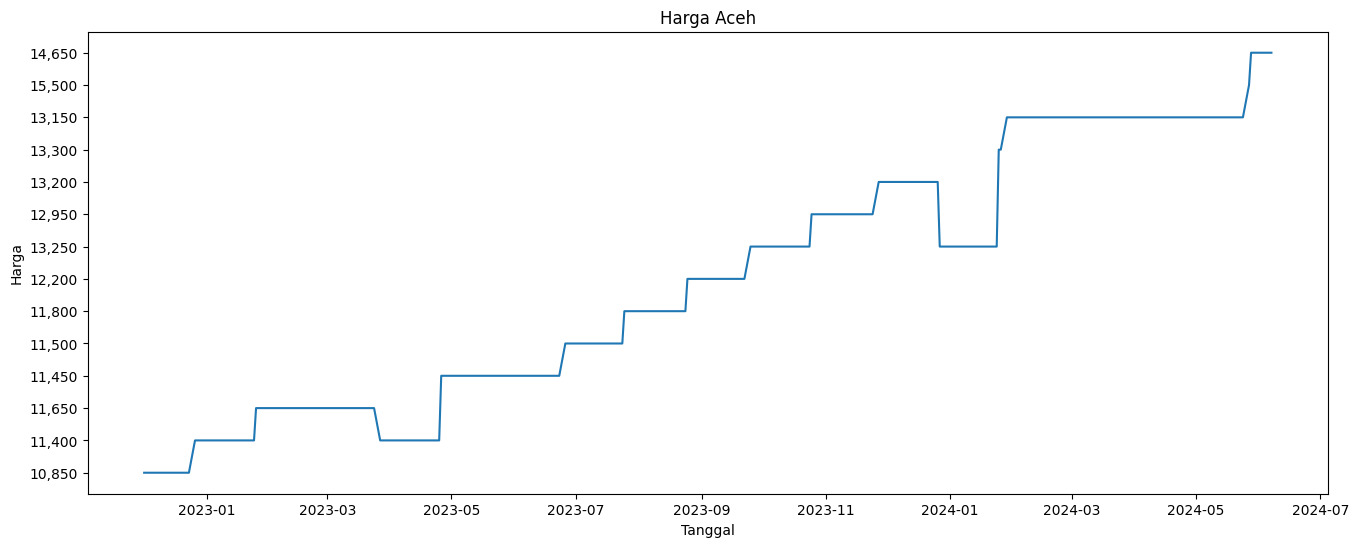

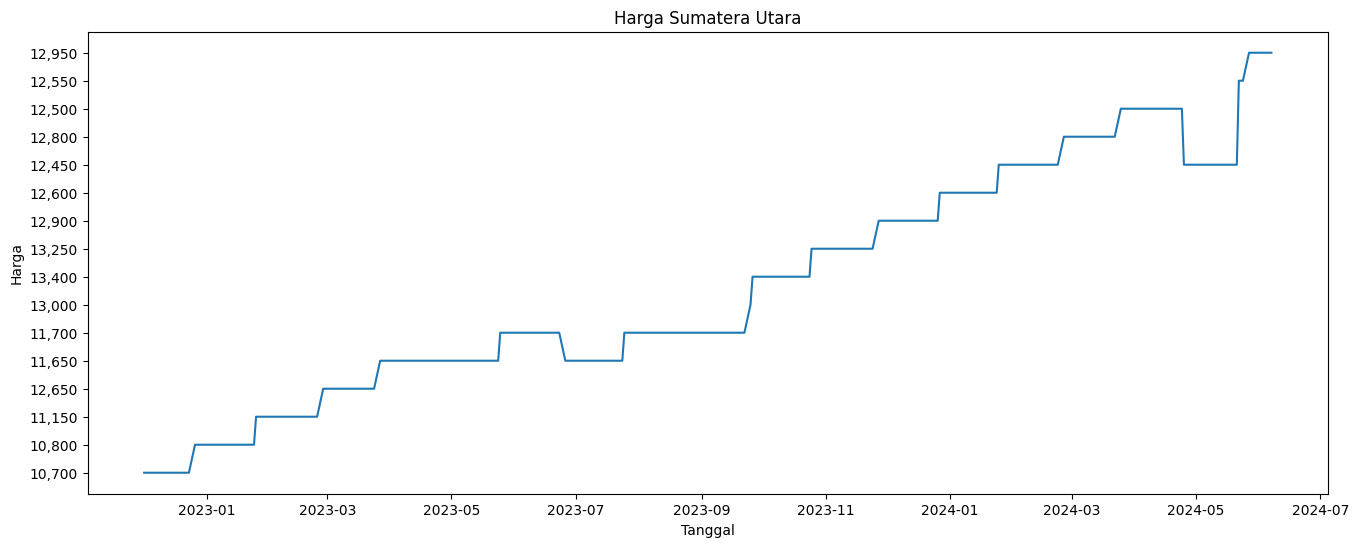

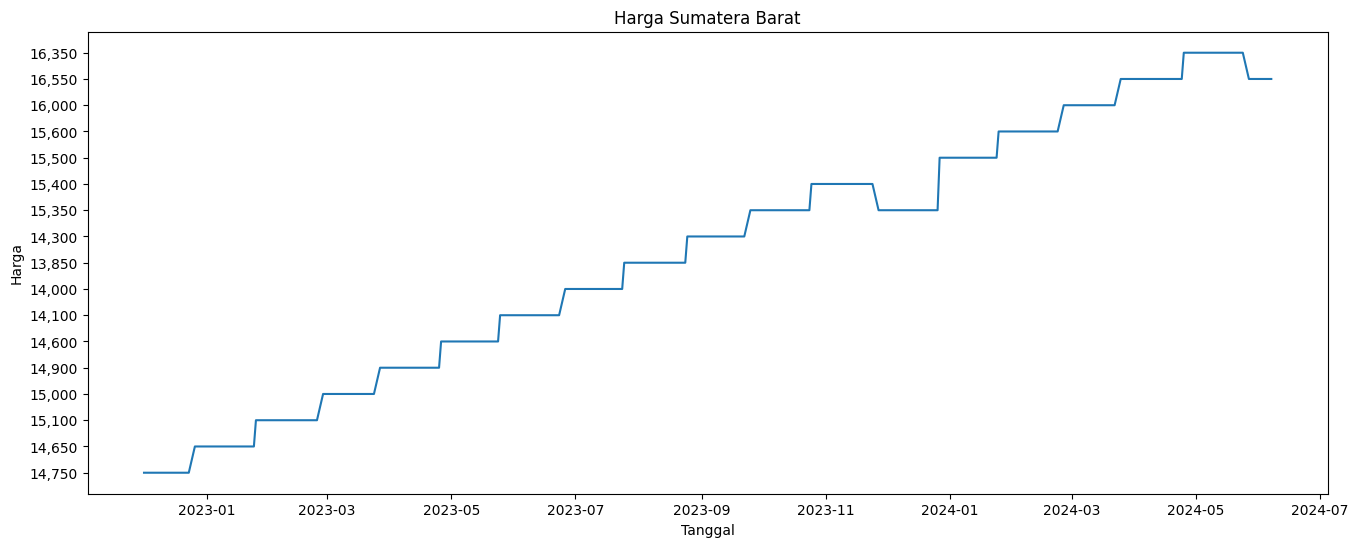

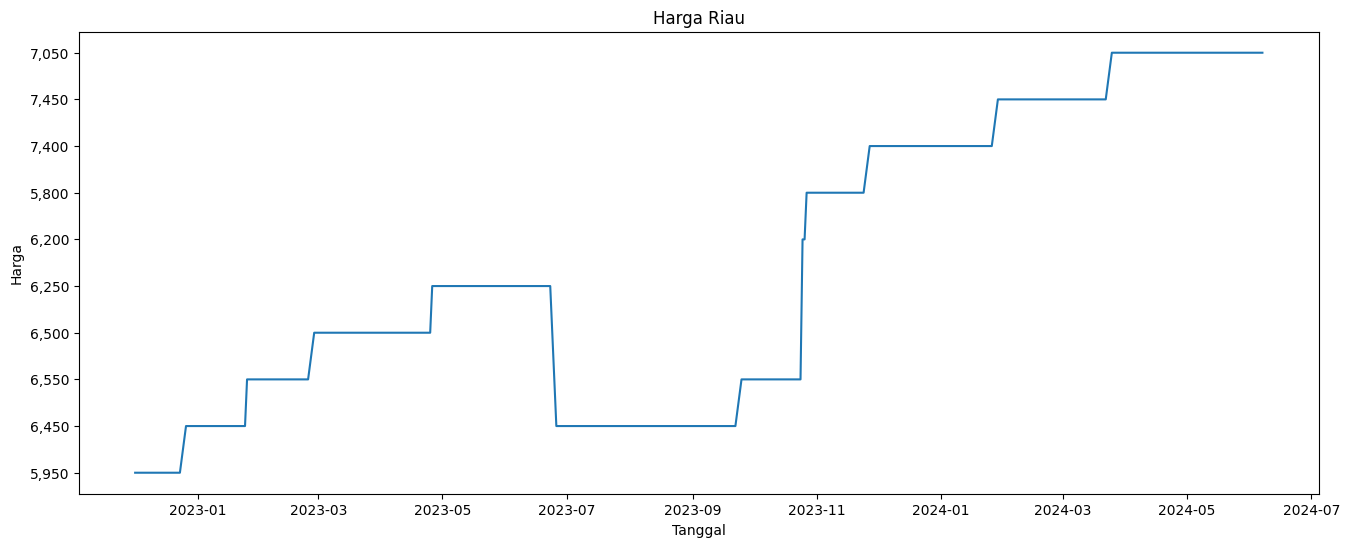

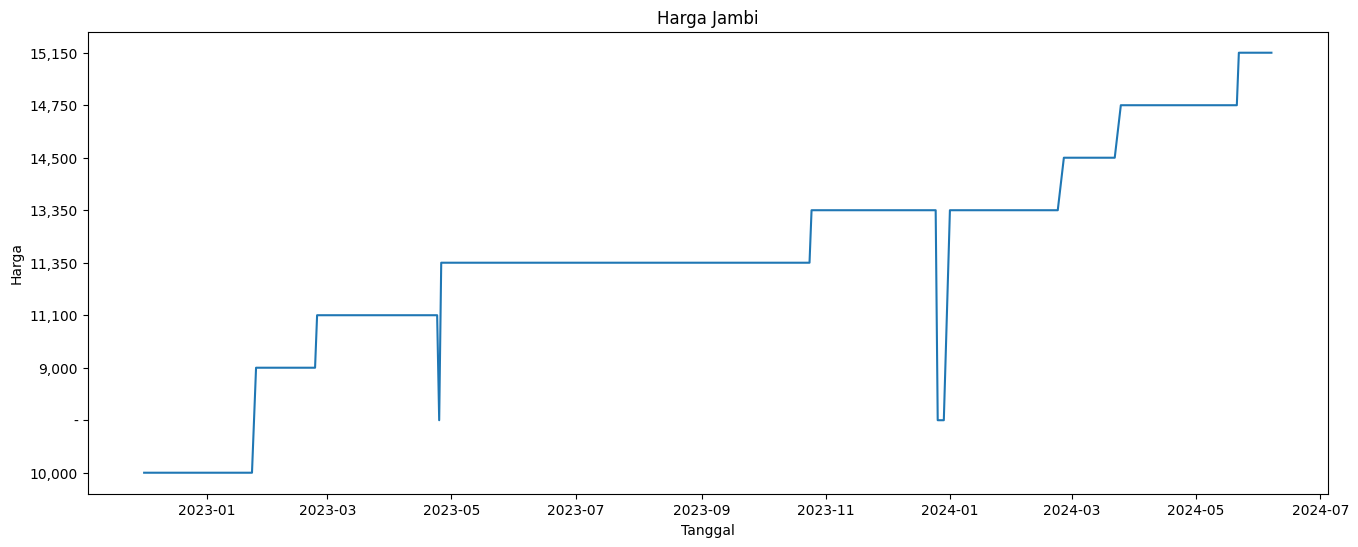

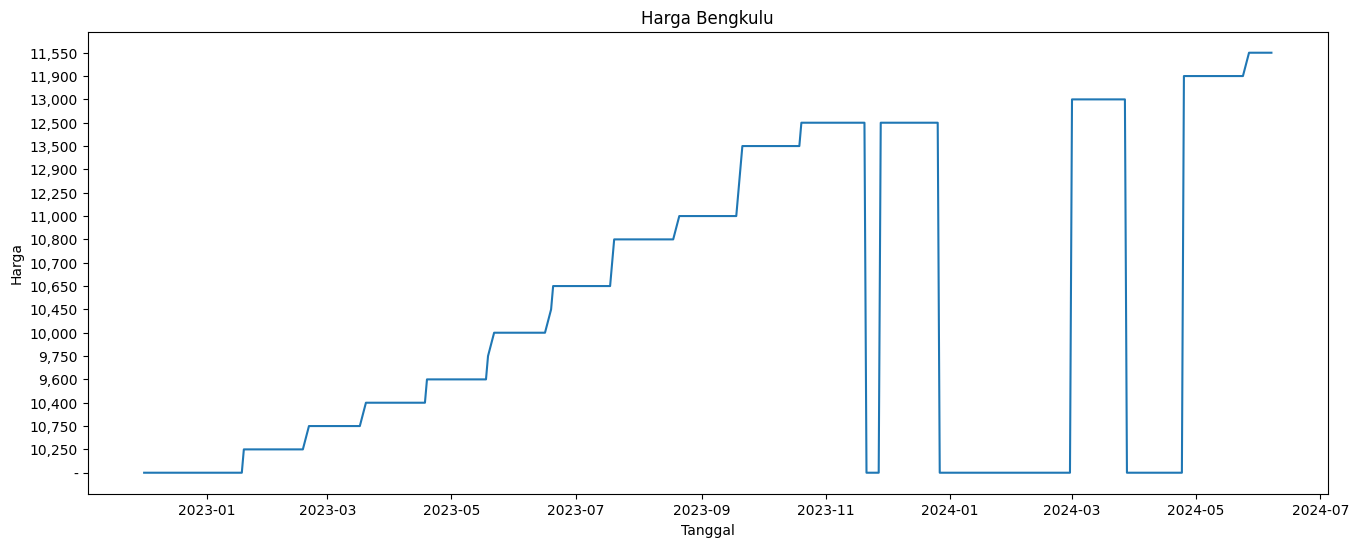

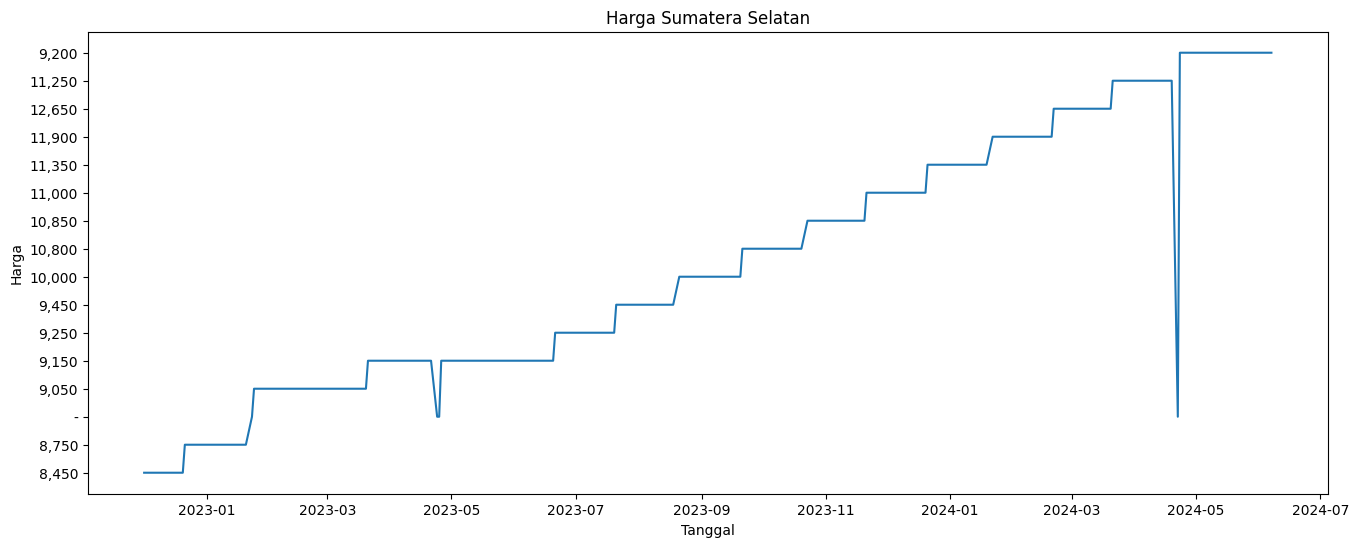

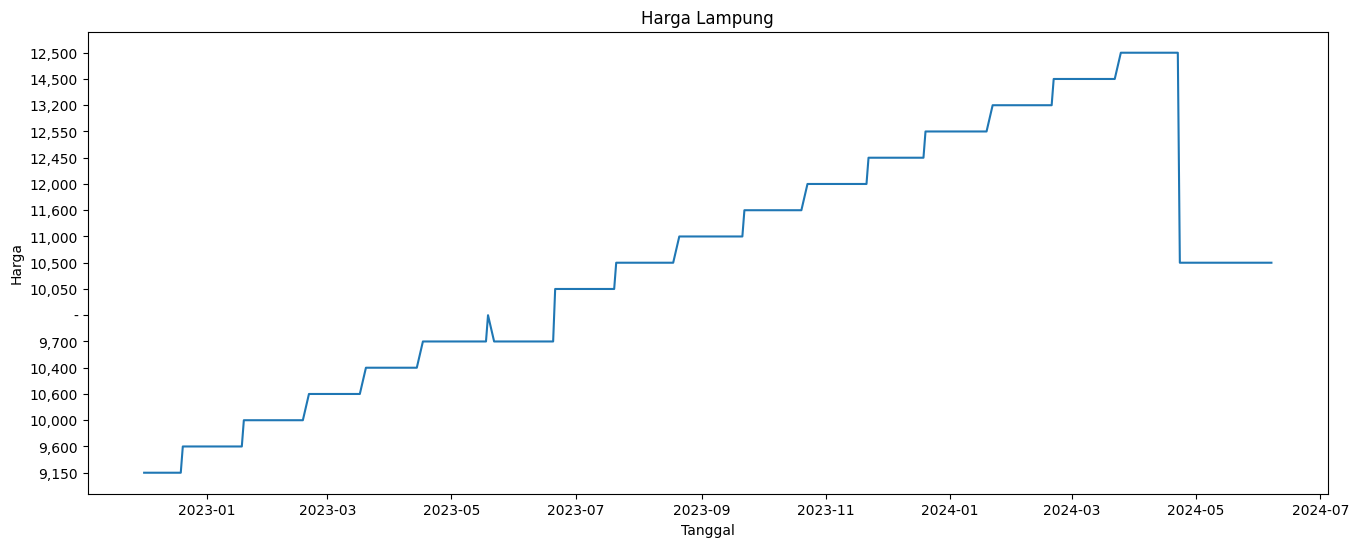

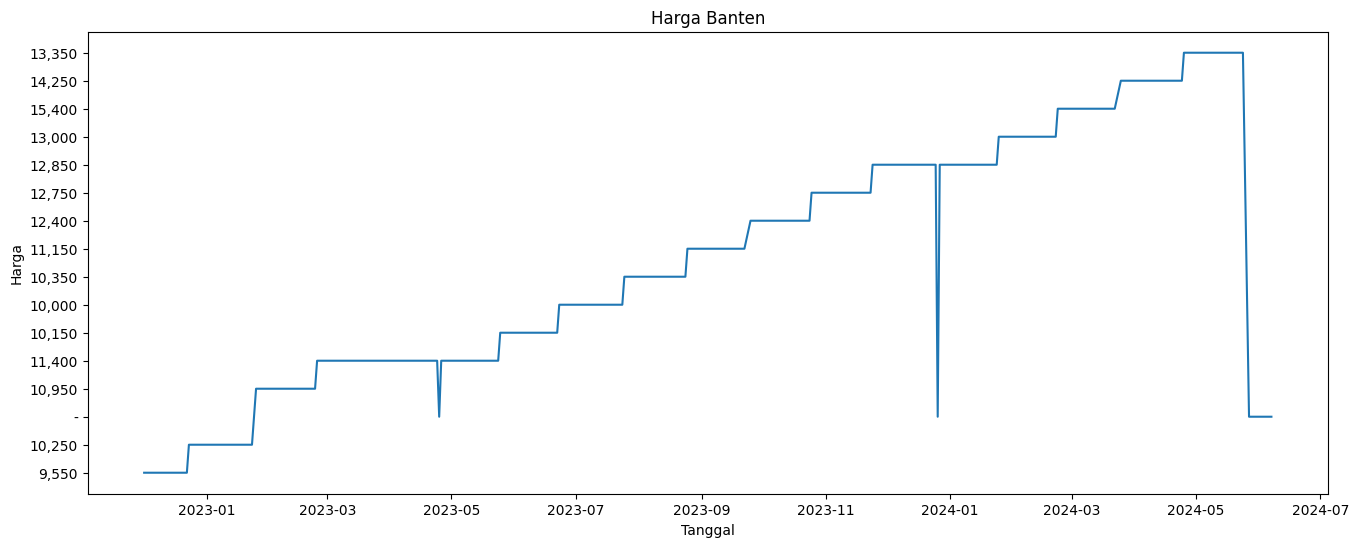

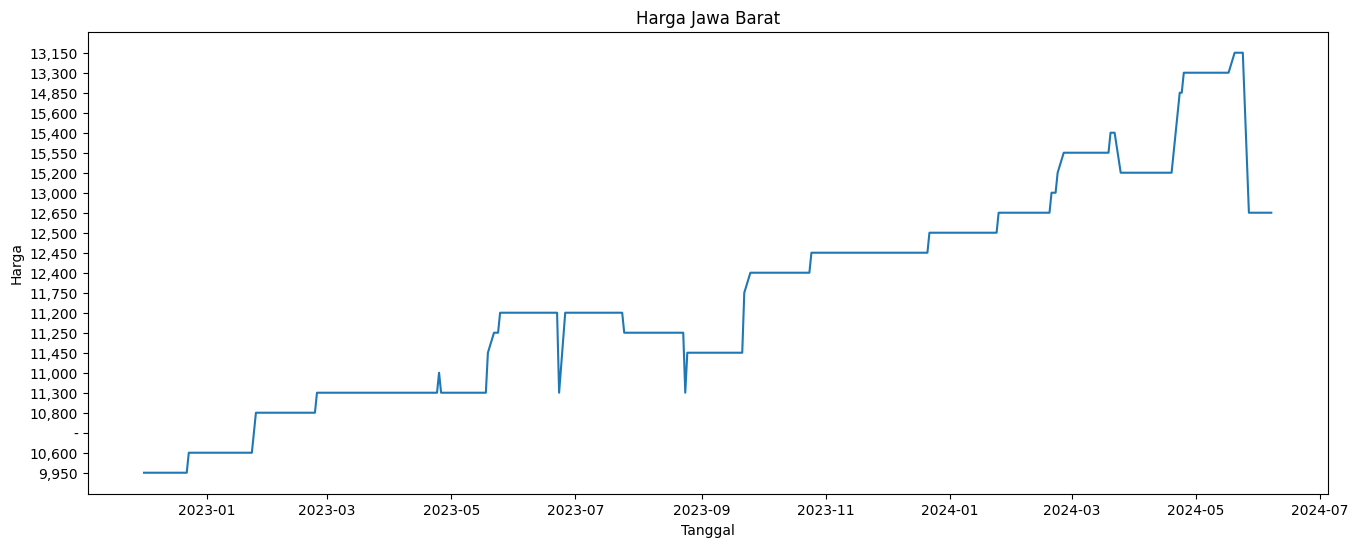

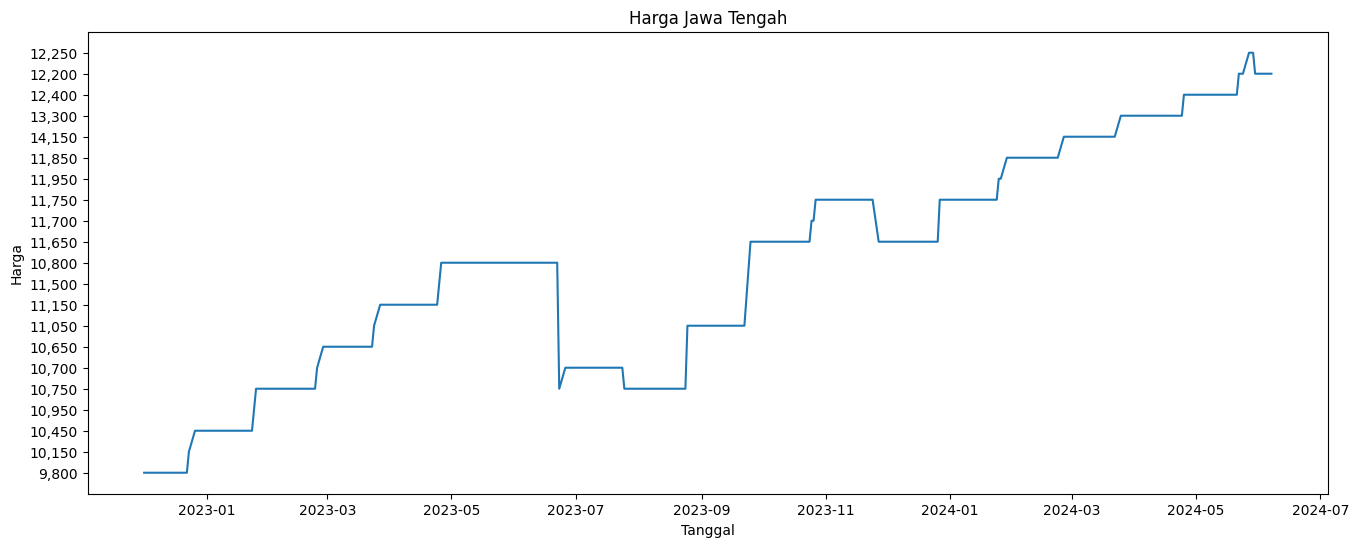

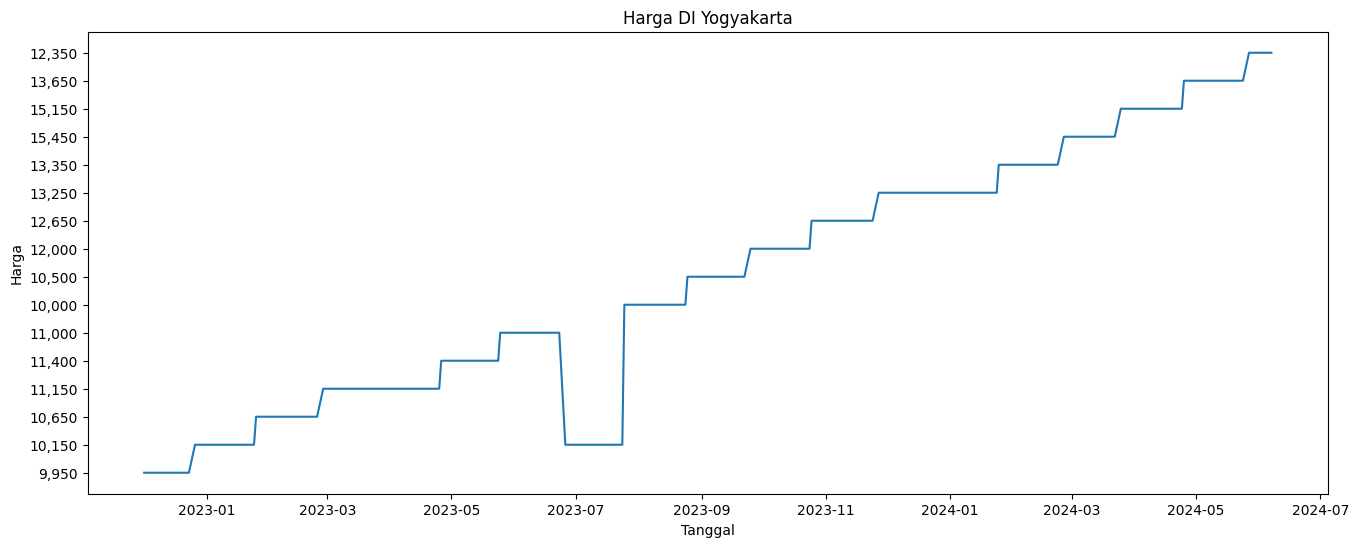

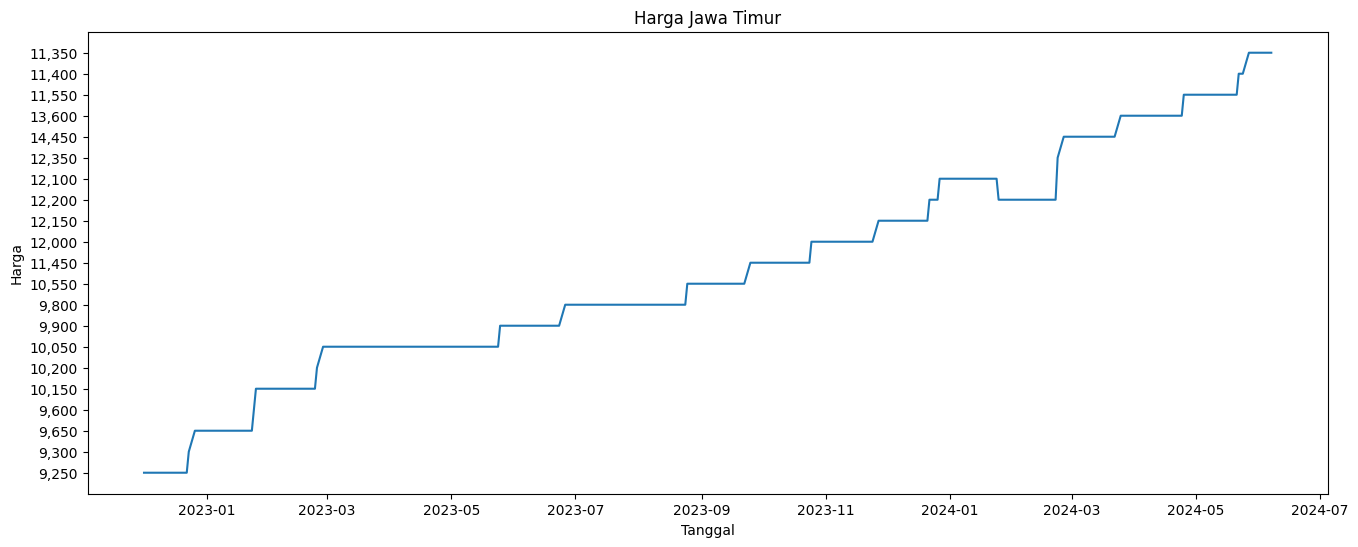

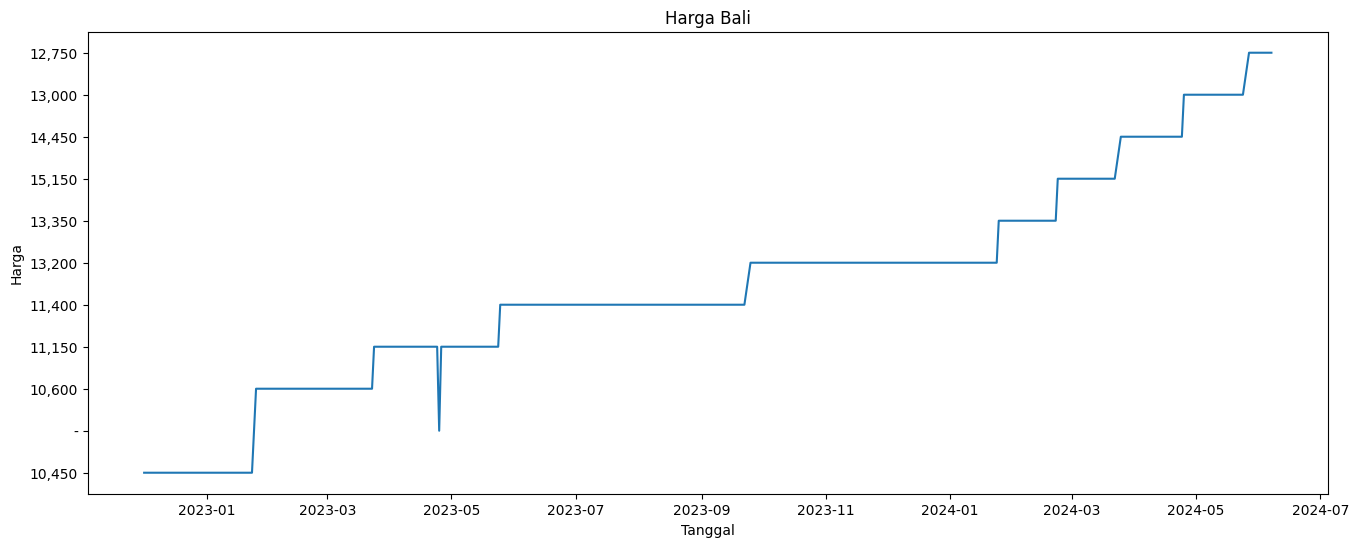

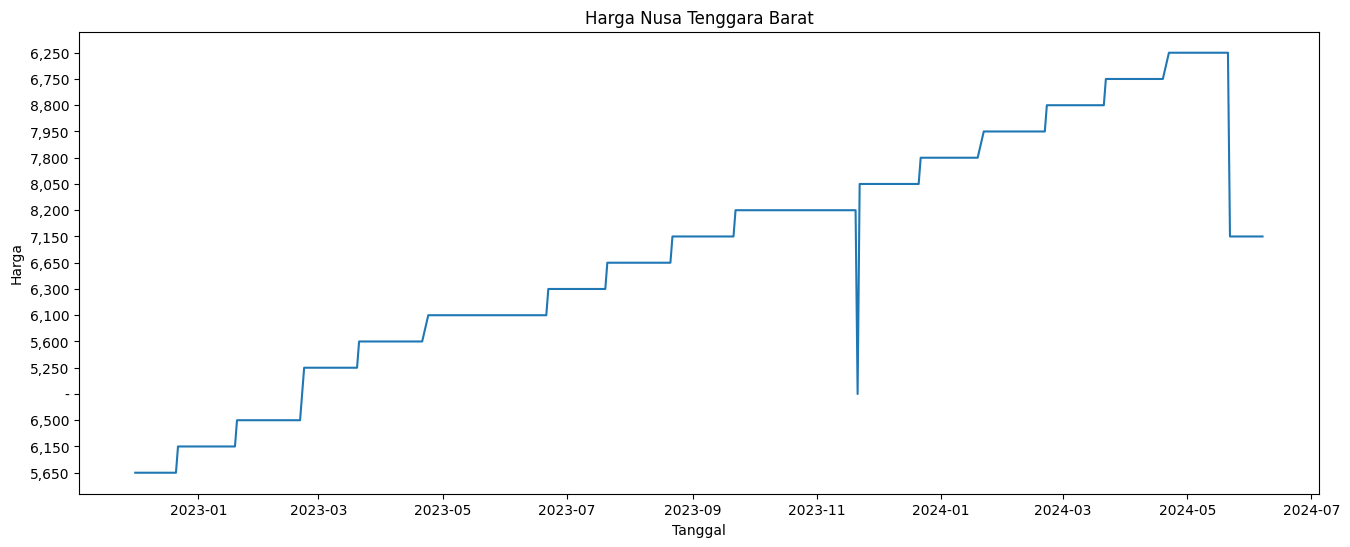

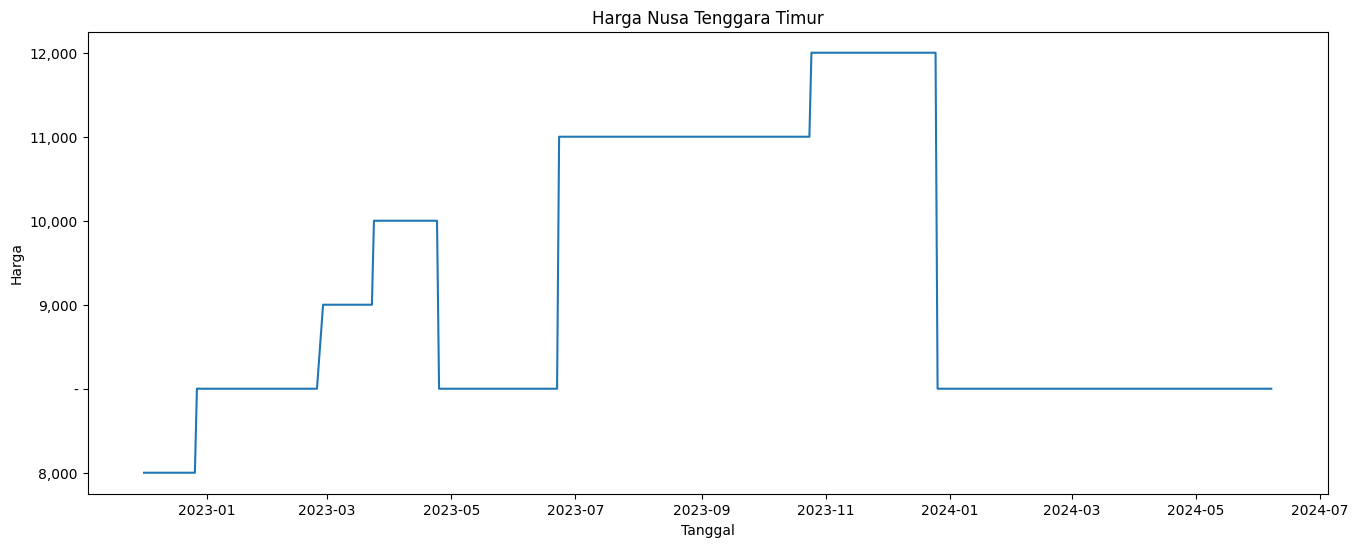

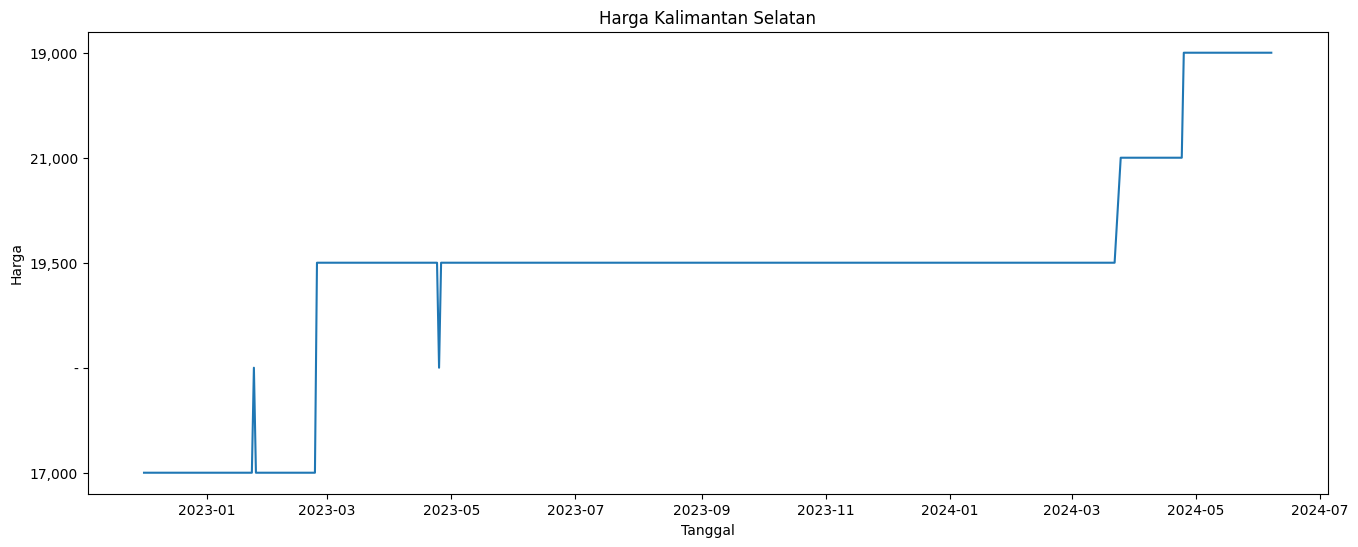

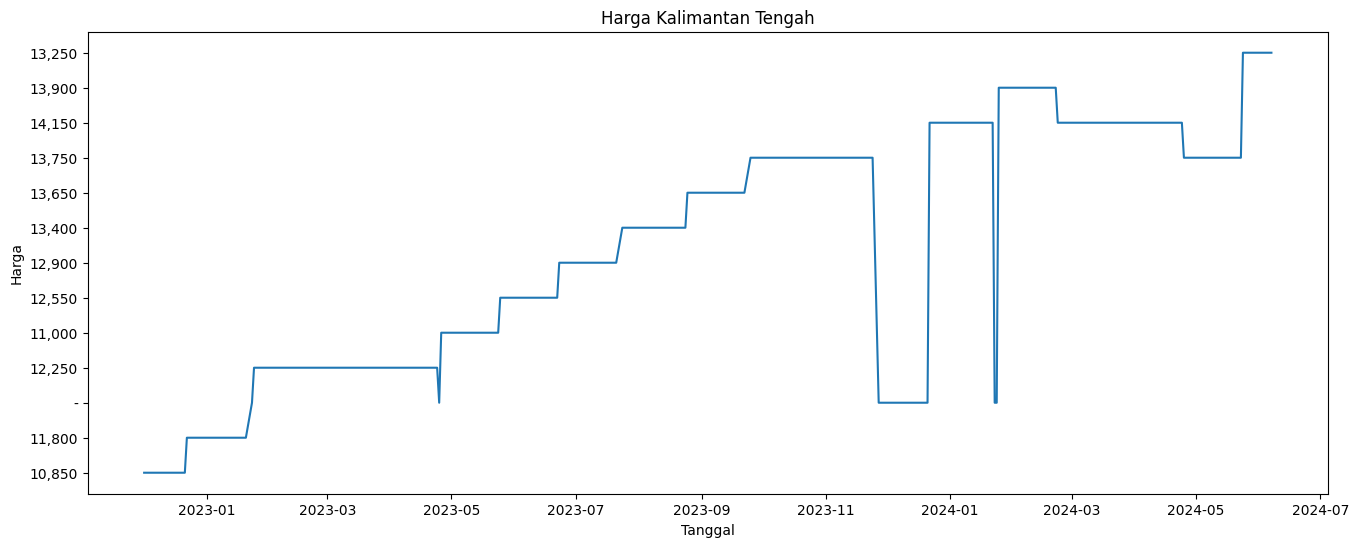

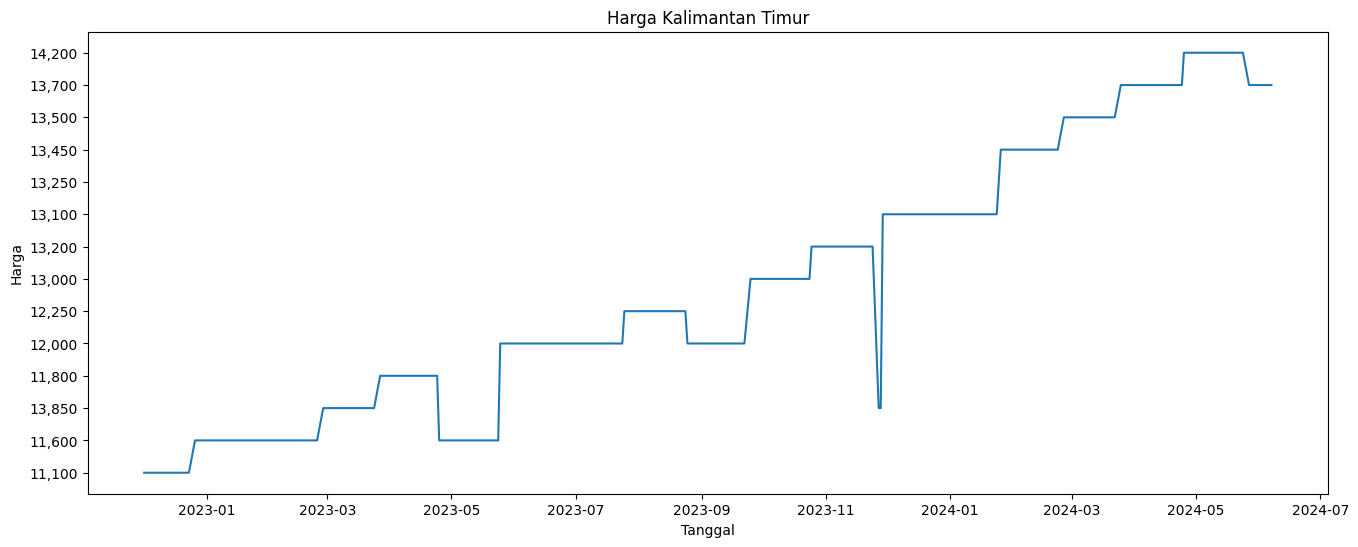

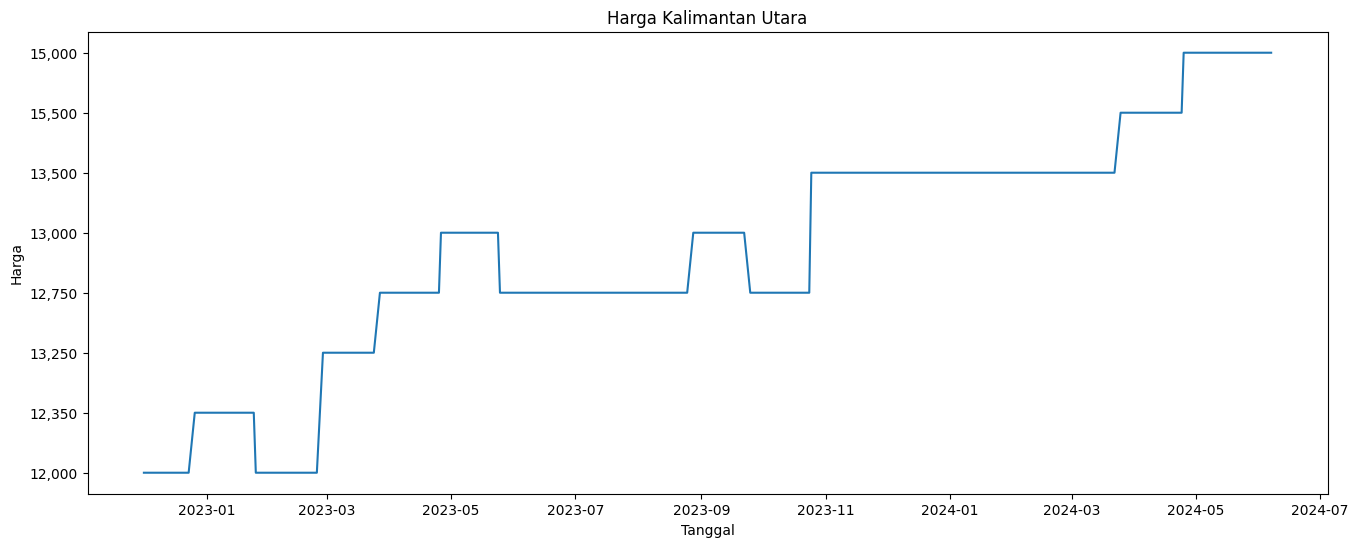

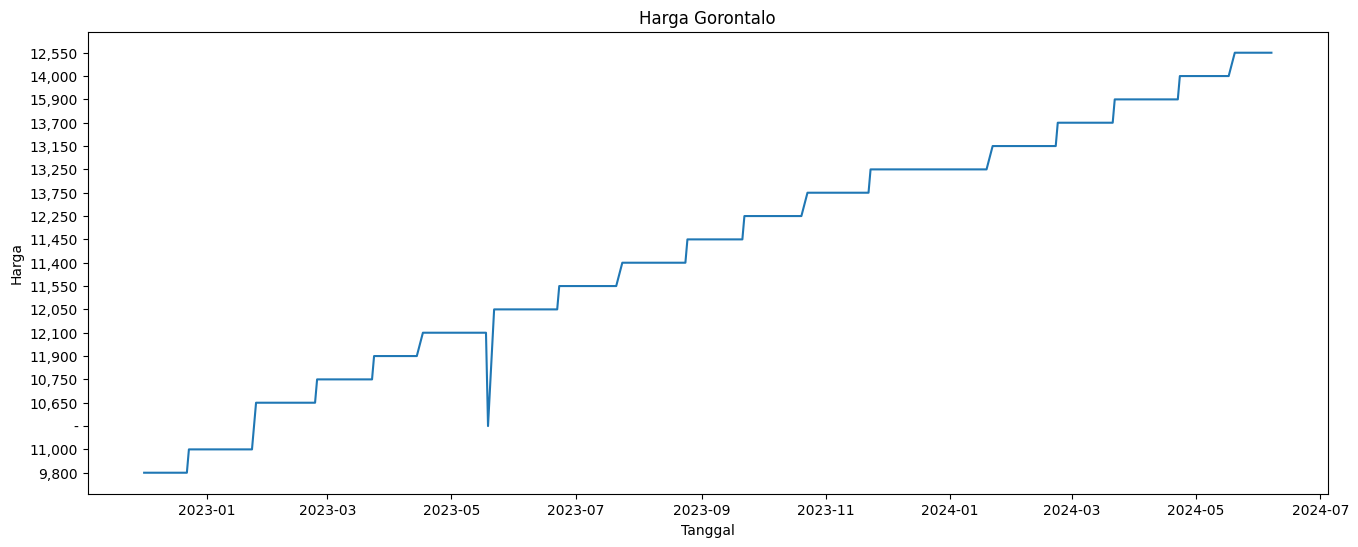

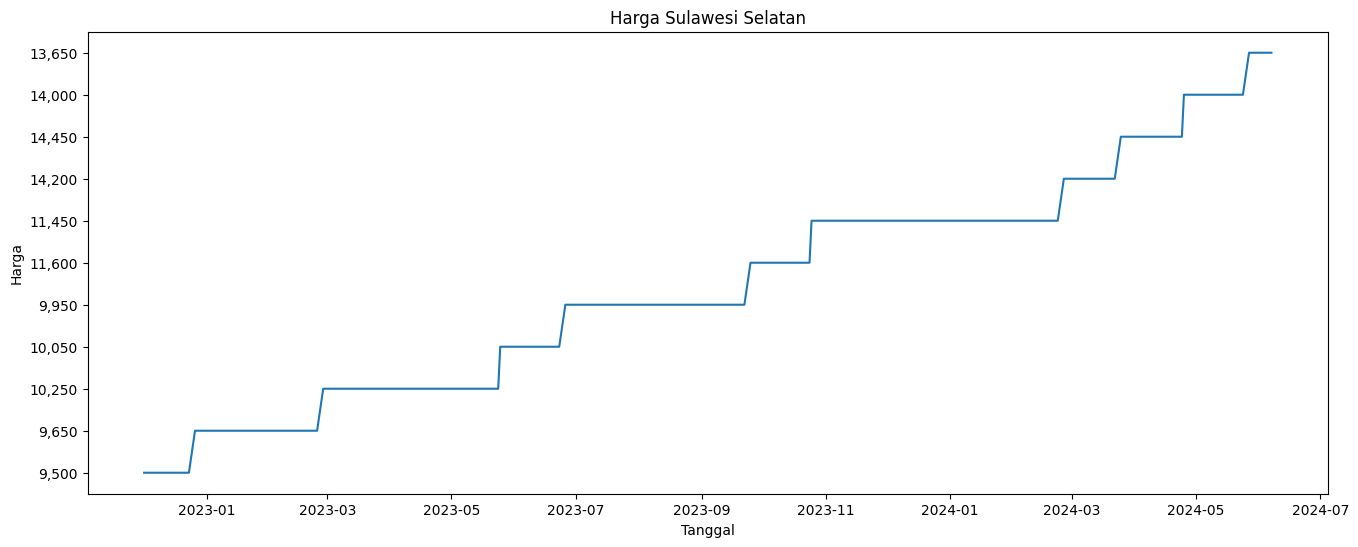

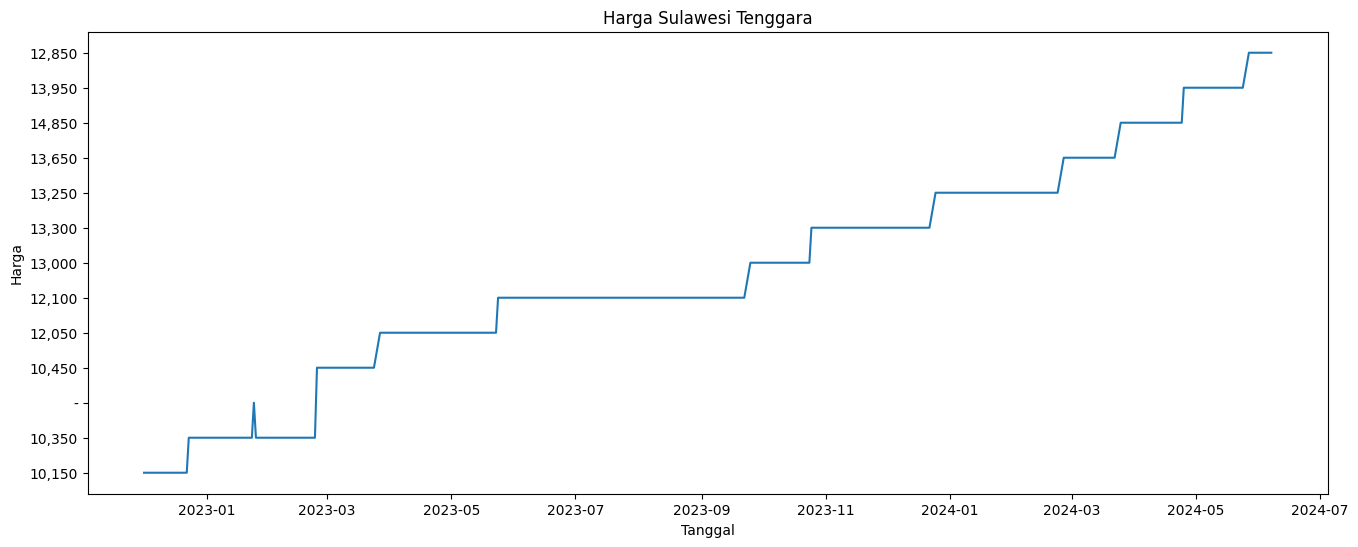

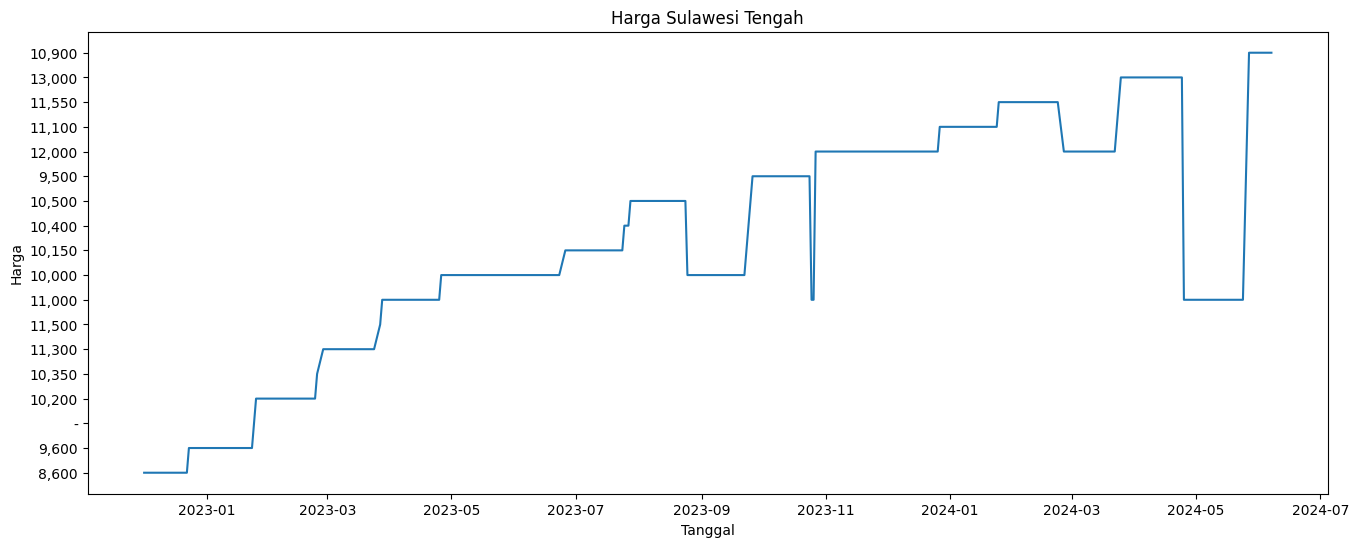

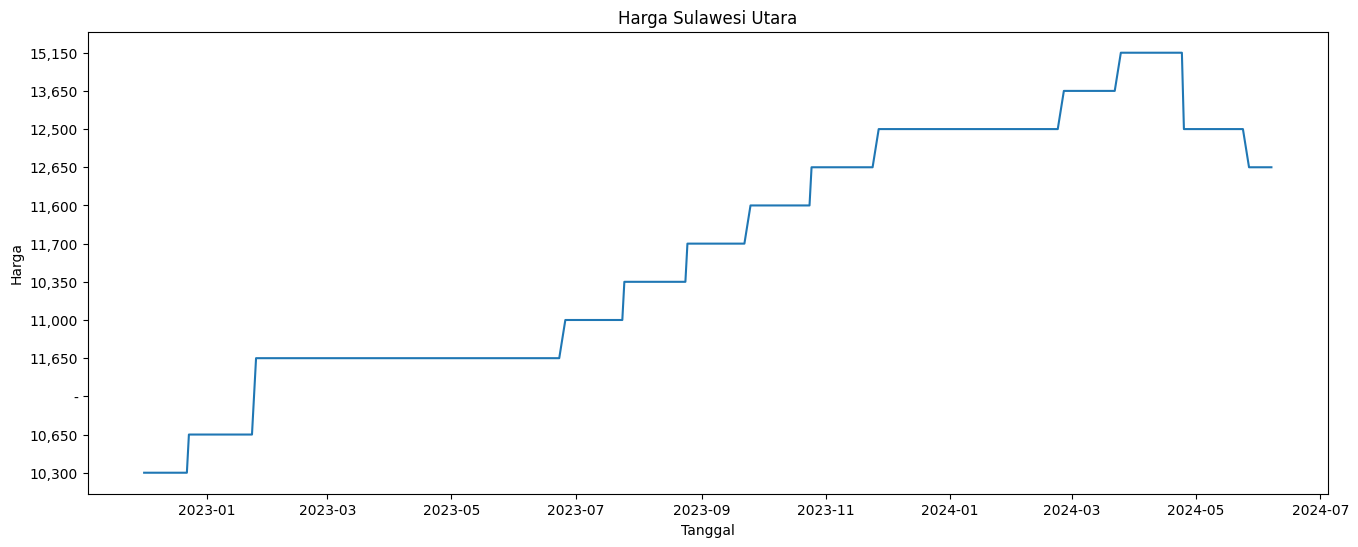

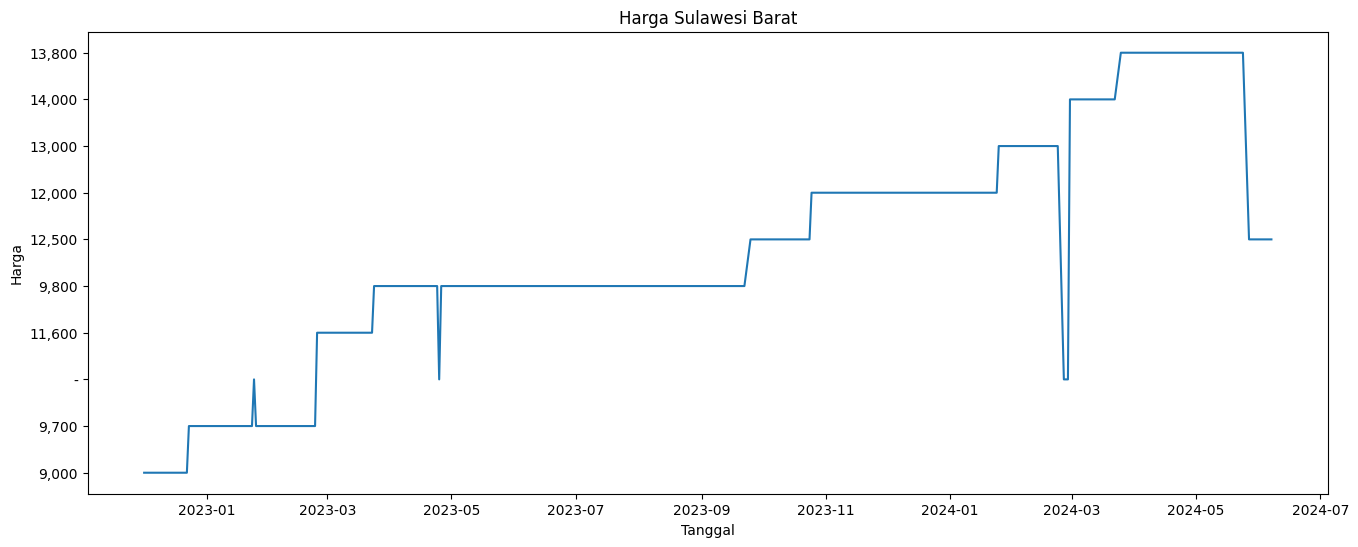

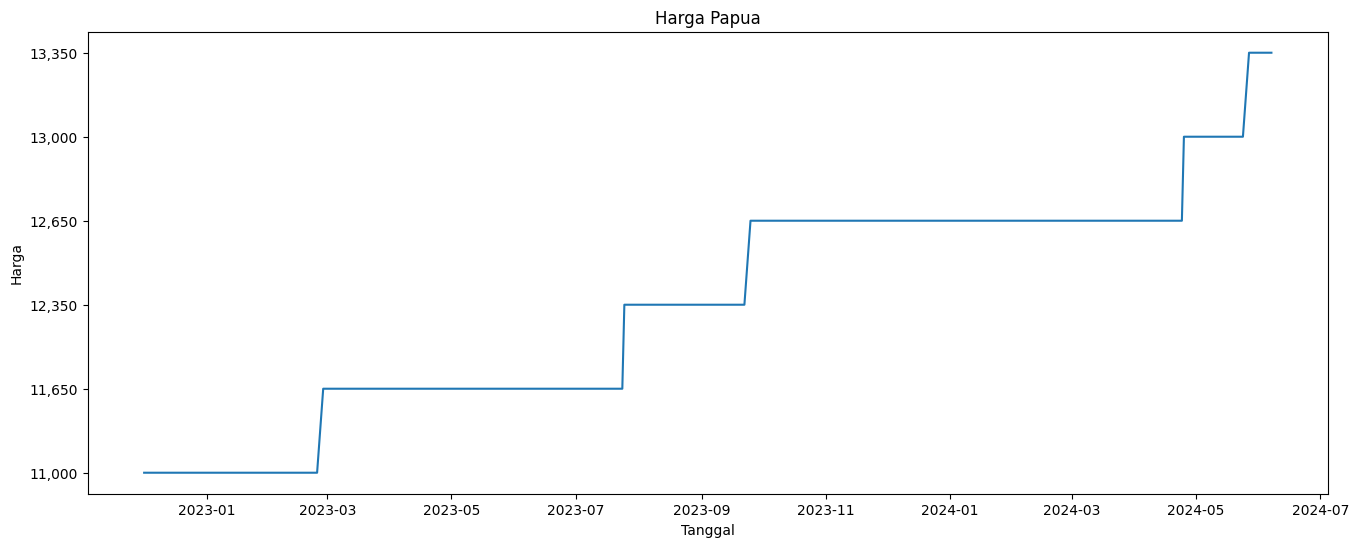

In [ ]:
for column in column_names:
  plt.figure(figsize=(16, 6))
  plt.plot(df[column])
  plt.title(f'Harga {column}')
  plt.xlabel('Tanggal')
  plt.ylabel('Harga')
  plt.show()


In [ ]:
max_prices = {}
for column in column_names:
  max_prices[column] = df[column].max()

for column, max_price in max_prices.items():
  print(f"Max harga {column}: {max_price}")


Max harga Aceh: 15,500
Max harga Sumatera Utara: 13,400
Max harga Sumatera Barat: 16,550
Max harga Riau: 7,450
Max harga Jambi: 9,000
Max harga Bengkulu: 9,750
Max harga Sumatera Selatan: 9,450
Max harga Lampung: 9,700
Max harga Banten: 9,550
Max harga Jawa Barat: 9,950
Max harga Jawa Tengah: 9,800
Max harga DI Yogyakarta: 9,950
Max harga Jawa Timur: 9,900
Max harga Bali: 15,150
Max harga Nusa Tenggara Barat: 8,800
Max harga Nusa Tenggara Timur: 9,000
Max harga Kalimantan Selatan: 21,000
Max harga Kalimantan Tengah: 14,150
Max harga Kalimantan Timur: 14,200
Max harga Kalimantan Utara: 15,500
Max harga Gorontalo: 9,800
Max harga Sulawesi Selatan: 9,950
Max harga Sulawesi Tenggara: 14,850
Max harga Sulawesi Tengah: 9,600
Max harga Sulawesi Utara: 15,150
Max harga Sulawesi Barat: 9,800
Max harga Papua: 13,350


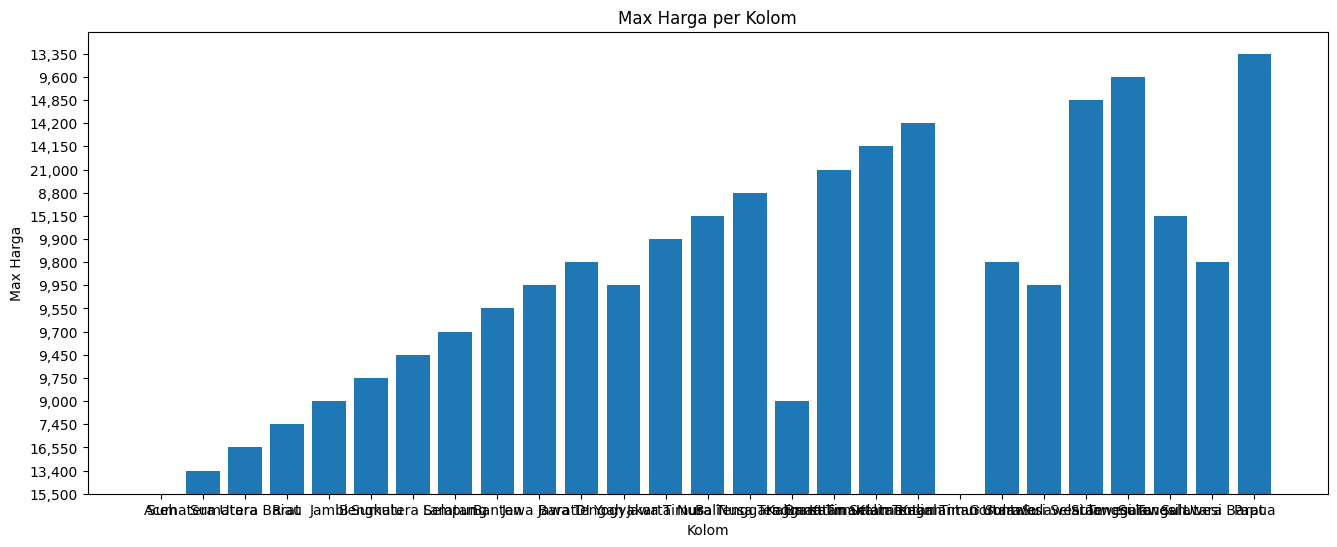

In [ ]:
import matplotlib.pyplot as plt

max_prices = {}
for column in column_names:
  max_prices[column] = df[column].max()

plt.figure(figsize=(16, 6))
plt.bar(max_prices.keys(), max_prices.values())
plt.title('Max Harga per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Max Harga')
plt.show()


In [ ]:
import pandas as pd

# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Count missing values
missing_values = df.isnull().sum()

# Print missing values count for each column
for column, missing_count in missing_values.items():
  print(f"Column '{column}' has {missing_count} missing values.")


Column 'Aceh' has 0 missing values.
Column 'Sumatera Utara' has 0 missing values.
Column 'Sumatera Barat' has 0 missing values.
Column 'Riau' has 0 missing values.
Column 'Jambi' has 6 missing values.
Column 'Bengkulu' has 107 missing values.
Column 'Sumatera Selatan' has 4 missing values.
Column 'Lampung' has 1 missing values.
Column 'Banten' has 13 missing values.
Column 'Jawa Barat' has 1 missing values.
Column 'Jawa Tengah' has 0 missing values.
Column 'DI Yogyakarta' has 0 missing values.
Column 'Jawa Timur' has 0 missing values.
Column 'Bali' has 2 missing values.
Column 'Nusa Tenggara Barat' has 2 missing values.
Column 'Nusa Tenggara Timur' has 206 missing values.
Column 'Kalimantan Selatan' has 2 missing values.
Column 'Kalimantan Tengah' has 23 missing values.
Column 'Kalimantan Timur' has 0 missing values.
Column 'Kalimantan Utara' has 0 missing values.
Column 'Gorontalo' has 2 missing values.
Column 'Sulawesi Selatan' has 0 missing values.
Column 'Sulawesi Tenggara' has 1 m

In [ ]:
df = df.apply(lambda x: x.str.replace(',', '').astype(float))


In [ ]:
df

Aceh  Sumatera Utara  Sumatera Barat    Riau    Jambi  \
Tanggal                                                                
2022-12-01  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-02  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-05  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-06  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-07  10850.0         10700.0         14750.0  5950.0  10000.0   
...             ...             ...             ...     ...      ...   
2024-06-03  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-04  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-05  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-06  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-07  14650.0         12950.0         16550.0  7050.0  15150.0   

            Bengkulu  Sumatera Selatan  Lampung  Banten  Jawa Barat  ...  \
Tanggal                                                              ...   
2022-12-01       NaN            8450.0   9150.0  9550.0      9950.0  ...   
2022-12-02       NaN            8450.0   9150.0  9550.0      9950.0  ...   
2022-12-05       NaN            8450.0   9150.0  9550.0      9950.0  ...   
2022-12-06       NaN            8450.0   9150.0  9550.0      9950.0  ...   
2022-12-07       NaN            8450.0   9150.0  9550.0      9950.0  ...   
...              ...               ...      ...     ...         ...  ...   
2024-06-03   11550.0            9200.0  10500.0     NaN     12650.0  ...   
2024-06-04   11550.0            9200.0  10500.0     NaN     12650.0  ...   
2024-06-05   11550.0            9200.0  10500.0     NaN     12650.0  ...   
2024-06-06   11550.0            9200.0  10500.0     NaN     12650.0  ...   
2024-06-07   11550.0            9200.0  10500.0     NaN     12650.0  ...   

            Kalimantan Tengah  Kalimantan Timur  Kalimantan Utara  Gorontalo  \
Tanggal                                                                        
2022-12-01            10850.0           11100.0           12000.0     9800.0   
2022-12-02            10850.0           11100.0           12000.0     9800.0   
2022-12-05            10850.0           11100.0           12000.0     9800.0   
2022-12-06            10850.0           11100.0           12000.0     9800.0   
2022-12-07            10850.0           11100.0           12000.0     9800.0   
...                       ...               ...               ...        ...   
2024-06-03            13250.0           13700.0           15000.0    12550.0   
2024-06-04            13250.0           13700.0           15000.0    12550.0   
2024-06-05            13250.0           13700.0           15000.0    12550.0   
2024-06-06            13250.0           13700.0           15000.0    12550.0   
2024-06-07            13250.0           13700.0           15000.0    12550.0   

            Sulawesi Selatan  Sulawesi Tenggara  Sulawesi Tengah  \
Tanggal                                                            
2022-12-01            9500.0            10150.0           8600.0   
2022-12-02            9500.0            10150.0           8600.0   
2022-12-05            9500.0            10150.0           8600.0   
2022-12-06            9500.0            10150.0           8600.0   
2022-12-07            9500.0            10150.0           8600.0   
...                      ...                ...              ...   
2024-06-03           13650.0            12850.0          10900.0   
2024-06-04           13650.0            12850.0          10900.0   
2024-06-05           13650.0            12850.0          10900.0   
2024-06-06           13650.0            12850.0          10900.0   
2024-06-07           13650.0            12850.0          10900.0   

            Sulawesi Utara  Sulawesi Barat    Papua  
Tanggal                                              
2022-12-01         10300.0          9000.0  11000.0  
2

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df

Aceh  Sumatera Utara  Sumatera Barat    Riau    Jambi  \
Tanggal                                                                
2022-12-01  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-02  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-05  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-06  10850.0         10700.0         14750.0  5950.0  10000.0   
2022-12-07  10850.0         10700.0         14750.0  5950.0  10000.0   
...             ...             ...             ...     ...      ...   
2024-06-03  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-04  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-05  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-06  14650.0         12950.0         16550.0  7050.0  15150.0   
2024-06-07  14650.0         12950.0         16550.0  7050.0  15150.0   

            Bengkulu  Sumatera Selatan  Lampung        Banten  Jawa Barat  \
Tanggal                                                                     
2022-12-01   11290.0            8450.0   9150.0   9550.000000      9950.0   
2022-12-02   11290.0            8450.0   9150.0   9550.000000      9950.0   
2022-12-05   11290.0            8450.0   9150.0   9550.000000      9950.0   
2022-12-06   11290.0            8450.0   9150.0   9550.000000      9950.0   
2022-12-07   11290.0            8450.0   9150.0   9550.000000      9950.0   
...              ...               ...      ...           ...         ...   
2024-06-03   11550.0            9200.0  10500.0  11891.796875     12650.0   
2024-06-04   11550.0            9200.0  10500.0  11891.796875     12650.0   
2024-06-05   11550.0            9200.0  10500.0  11891.796875     12650.0   
2024-06-06   11550.0            9200.0  10500.0  11891.796875     12650.0   
2024-06-07   11550.0            9200.0  10500.0  11891.796875     12650.0   

            ...  Kalimantan Tengah  Kalimantan Timur  Kalimantan Utara  \
Tanggal     ...                                                          
2022-12-01  ...            10850.0           11100.0           12000.0   
2022-12-02  ...            10850.0           11100.0           12000.0   
2022-12-05  ...            10850.0           11100.0           12000.0   
2022-12-06  ...            10850.0           11100.0           12000.0   
2022-12-07  ...            10850.0           11100.0           12000.0   
...         ...                ...               ...               ...   
2024-06-03  ...            13250.0           13700.0           15000.0   
2024-06-04  ...            13250.0           13700.0           15000.0   
2024-06-05  ...            13250.0           13700.0           15000.0   
2024-06-06  ...            13250.0           13700.0           15000.0   
2024-06-07  ...            13250.0           13700.0           15000.0   

            Gorontalo  Sulawesi Selatan  Sulawesi Tenggara  Sulawesi Tengah  \
Tanggal                                                                       
2022-12-01     9800.0            9500.0            10150.0           8600.0   
2022-12-02     9800.0            9500.0            10150.0           8600.0   
2022-12-05     9800.0            9500.0            10150.0           8600.0   
2022-12-06     9800.0            9500.0            10150.0           8600.0   
2022-12-07     9800.0            9500.0            10150.0           8600.0   
...               ...               ...                ...              ...   
2024-06-03    12550.0           13650.0            12850.0          10900.0   
2024-06-04    12550.0           13650.0            12850.0          10900.0   
2024-06-05    12550.0           13650.0            12850.0          10900.0   
2024-06-06    12550.0           13650.0            12850.0          10900.0   
2024-06-07    12550.0           13650.0            12850.0          10900.0   

            Sulawesi Utara  Sulawesi Barat    Papua  
Tanggal                        

In [ ]:
# prompt: make a model RNN-LSTM per column name

for column in column_names:
  # Normalize the data
  scaler = MinMaxScaler(feature_range=(0, 1))
  df_normalized = scaler.fit_transform(df[[column]].values)

  # Split data into train and test sets
  train_size = int(len(df_normalized) * 0.8)
  train_data, test_data = df_normalized[0:train_size], df_normalized[train_size:]

  # Create sequences for training data
  X_train, y_train = [], []
  for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

  # Reshape the data
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model.add(LSTM(50))
  model.add(Dense(1))

  # Compile the model
  model.compile(loss='mean_squared_error', optimizer='adam')

  # Train the model
  model.fit(X_train, y_train, epochs=10, batch_size=32)

  # Make predictions on test data
  inputs = df_normalized[len(df_normalized) - len(test_data) - 60:]
  X_test = []
  for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  predictions = model.predict(X_test)
  predictions = scaler.inverse_transform(predictions)

Epoch 1/10
9/9 [==============================] - 4s 48ms/step - loss: 0.0298
Epoch 2/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0056
Epoch 3/10
9/9 [==============================] - 0s 55ms/step - loss: 0.0046
Epoch 4/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0025
Epoch 5/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0022
Epoch 6/10
9/9 [==============================] - 1s 66ms/step - loss: 0.0017
Epoch 7/10
9/9 [==============================] - 1s 85ms/step - loss: 0.0016
Epoch 8/10
9/9 [==============================] - 1s 84ms/step - loss: 0.0026
Epoch 9/10
9/9 [==============================] - 1s 86ms/step - loss: 0.0018
Epoch 10/10
3/3 [==============================] - 2s 23ms/step
Epoch 1/10
9/9 [==============================] - 4s 49ms/step - loss: 0.1909
Epoch 2/10
9/9 [==============================] - 0s 48ms/step - loss: 0.0352
Epoch 3/10
9/9 [==============================] - 0s 50ms/step - loss: 0.0286


3/3 [==============================] - 1s 20ms/step
Epoch 1/10
9/9 [==============================] - 7s 89ms/step - loss: 0.0573
Epoch 2/10
9/9 [==============================] - 1s 84ms/step - loss: 0.0263
Epoch 3/10
9/9 [==============================] - 1s 52ms/step - loss: 0.0250
Epoch 4/10
9/9 [==============================] - 0s 50ms/step - loss: 0.0180
Epoch 5/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0160
Epoch 6/10
9/9 [==============================] - 0s 49ms/step - loss: 0.0152
Epoch 7/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0133
Epoch 8/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0129
Epoch 9/10
9/9 [==============================] - 0s 54ms/step - loss: 0.0122
Epoch 10/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0115


3/3 [==============================] - 1s 17ms/step
Epoch 1/10
9/9 [==============================] - 6s 48ms/step - loss: 0.0680
Epoch 2/10
9/9 [==============================] - 0s 53ms/step - loss: 0.0156
Epoch 3/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0080
Epoch 4/10
9/9 [==============================] - 0s 54ms/step - loss: 0.0037
Epoch 5/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0025
Epoch 6/10
9/9 [==============================] - 0s 54ms/step - loss: 0.0019
Epoch 7/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0018
Epoch 8/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0019
Epoch 9/10
9/9 [==============================] - 0s 51ms/step - loss: 0.0021
Epoch 10/10
3/3 [==============================] - 1s 20ms/step
Epoch 1/10
9/9 [==============================] - 5s 52ms/step - loss: 0.0966
Epoch 2/10
9/9 [==============================] - 0s 52ms/step - loss: 0.0140
Epoch 3/10
9/9 [==========

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_values = {}
for column in column_names:
  # Get actual and predicted values
  actual_values = df[column][train_size:]
  predicted_values = predictions[:, 0]

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

  # Store RMSE in dictionary
  rmse_values[column] = rmse

# Print RMSE for each column
for column, rmse in rmse_values.items():
  print(f"RMSE for {column}: {rmse}")


RMSE for Aceh: 725.6860267616485
RMSE for Sumatera Utara: 252.27084272553535
RMSE for Sumatera Barat: 3543.578367407802
RMSE for Riau: 5597.685643412325
RMSE for Jambi: 1929.4734172652397
RMSE for Bengkulu: 1119.8404924274157
RMSE for Sumatera Selatan: 2552.0533521475013
RMSE for Lampung: 1864.765748254426
RMSE for Banten: 1720.7300779445895
RMSE for Jawa Barat: 2017.8667268692097
RMSE for Jawa Tengah: 940.715849388445
RMSE for DI Yogyakarta: 2003.5069904311888
RMSE for Jawa Timur: 1393.2209165029244
RMSE for Bali: 1614.6313175051318
RMSE for Nusa Tenggara Barat: 5605.243910731501
RMSE for Nusa Tenggara Timur: 2137.403701715623
RMSE for Kalimantan Selatan: 7029.274064162321
RMSE for Kalimantan Tengah: 1234.7404124733753
RMSE for Kalimantan Timur: 1037.5636579038094
RMSE for Kalimantan Utara: 2067.0262000003504
RMSE for Gorontalo: 1888.2299859775876
RMSE for Sulawesi Selatan: 1419.4015899313372
RMSE for Sulawesi Tenggara: 1411.0078737168742
RMSE for Sulawesi Tengah: 1329.7055391195574
R

In [ ]:
# prompt: tampilkan hasil predicitions vs actual dari data test dibuat dalam bentuk tabel per column name

for column in column_names:
  # Get actual and predicted values
  actual_values = df[column][train_size:]
  predicted_values = predictions[:, 0]

  # Create a DataFrame
  results_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

  # Display the DataFrame
  print(f"Results for {column}:")
  display(results_df)


Results for Aceh:


Actual     Predicted
Tanggal                          
2024-02-19  13150.0  12655.041016
2024-02-20  13150.0  12655.041016
2024-02-21  13150.0  12655.041016
2024-02-22  13150.0  12655.041016
2024-02-23  13150.0  12655.041016
...             ...           ...
2024-06-03  14650.0  13094.334961
2024-06-04  14650.0  13121.972656
2024-06-05  14650.0  13147.487305
2024-06-06  14650.0  13170.442383
2024-06-07  14650.0  13190.670898

[80 rows x 2 columns]

Results for Sumatera Utara:


Actual     Predicted
Tanggal                          
2024-02-19  12450.0  12655.041016
2024-02-20  12450.0  12655.041016
2024-02-21  12450.0  12655.041016
2024-02-22  12450.0  12655.041016
2024-02-23  12450.0  12655.041016
...             ...           ...
2024-06-03  12950.0  13094.334961
2024-06-04  12950.0  13121.972656
2024-06-05  12950.0  13147.487305
2024-06-06  12950.0  13170.442383
2024-06-07  12950.0  13190.670898

[80 rows x 2 columns]

Results for Sumatera Barat:


Actual     Predicted
Tanggal                          
2024-02-19  15600.0  12655.041016
2024-02-20  15600.0  12655.041016
2024-02-21  15600.0  12655.041016
2024-02-22  15600.0  12655.041016
2024-02-23  15600.0  12655.041016
...             ...           ...
2024-06-03  16550.0  13094.334961
2024-06-04  16550.0  13121.972656
2024-06-05  16550.0  13147.487305
2024-06-06  16550.0  13170.442383
2024-06-07  16550.0  13190.670898

[80 rows x 2 columns]

Results for Riau:


Actual     Predicted
Tanggal                         
2024-02-19  7450.0  12655.041016
2024-02-20  7450.0  12655.041016
2024-02-21  7450.0  12655.041016
2024-02-22  7450.0  12655.041016
2024-02-23  7450.0  12655.041016
...            ...           ...
2024-06-03  7050.0  13094.334961
2024-06-04  7050.0  13121.972656
2024-06-05  7050.0  13147.487305
2024-06-06  7050.0  13170.442383
2024-06-07  7050.0  13190.670898

[80 rows x 2 columns]

Results for Jambi:


Actual     Predicted
Tanggal                          
2024-02-19  13350.0  12655.041016
2024-02-20  13350.0  12655.041016
2024-02-21  13350.0  12655.041016
2024-02-22  13350.0  12655.041016
2024-02-23  13350.0  12655.041016
...             ...           ...
2024-06-03  15150.0  13094.334961
2024-06-04  15150.0  13121.972656
2024-06-05  15150.0  13147.487305
2024-06-06  15150.0  13170.442383
2024-06-07  15150.0  13190.670898

[80 rows x 2 columns]

Results for Bengkulu:


Actual     Predicted
Tanggal                          
2024-02-19  11290.0  12655.041016
2024-02-20  11290.0  12655.041016
2024-02-21  11290.0  12655.041016
2024-02-22  11290.0  12655.041016
2024-02-23  11290.0  12655.041016
...             ...           ...
2024-06-03  11550.0  13094.334961
2024-06-04  11550.0  13121.972656
2024-06-05  11550.0  13147.487305
2024-06-06  11550.0  13170.442383
2024-06-07  11550.0  13190.670898

[80 rows x 2 columns]

Results for Sumatera Selatan:


Actual     Predicted
Tanggal                          
2024-02-19  11900.0  12655.041016
2024-02-20  11900.0  12655.041016
2024-02-21  12650.0  12655.041016
2024-02-22  12650.0  12655.041016
2024-02-23  12650.0  12655.041016
...             ...           ...
2024-06-03   9200.0  13094.334961
2024-06-04   9200.0  13121.972656
2024-06-05   9200.0  13147.487305
2024-06-06   9200.0  13170.442383
2024-06-07   9200.0  13190.670898

[80 rows x 2 columns]

Results for Lampung:


Actual     Predicted
Tanggal                          
2024-02-19  13200.0  12655.041016
2024-02-20  13200.0  12655.041016
2024-02-21  14500.0  12655.041016
2024-02-22  14500.0  12655.041016
2024-02-23  14500.0  12655.041016
...             ...           ...
2024-06-03  10500.0  13094.334961
2024-06-04  10500.0  13121.972656
2024-06-05  10500.0  13147.487305
2024-06-06  10500.0  13170.442383
2024-06-07  10500.0  13190.670898

[80 rows x 2 columns]

Results for Banten:


Actual     Predicted
Tanggal                               
2024-02-19  13000.000000  12655.041016
2024-02-20  13000.000000  12655.041016
2024-02-21  13000.000000  12655.041016
2024-02-22  13000.000000  12655.041016
2024-02-23  15400.000000  12655.041016
...                  ...           ...
2024-06-03  11891.796875  13094.334961
2024-06-04  11891.796875  13121.972656
2024-06-05  11891.796875  13147.487305
2024-06-06  11891.796875  13170.442383
2024-06-07  11891.796875  13190.670898

[80 rows x 2 columns]

Results for Jawa Barat:


Actual     Predicted
Tanggal                          
2024-02-19  12650.0  12655.041016
2024-02-20  13000.0  12655.041016
2024-02-21  13000.0  12655.041016
2024-02-22  13000.0  12655.041016
2024-02-23  15200.0  12655.041016
...             ...           ...
2024-06-03  12650.0  13094.334961
2024-06-04  12650.0  13121.972656
2024-06-05  12650.0  13147.487305
2024-06-06  12650.0  13170.442383
2024-06-07  12650.0  13190.670898

[80 rows x 2 columns]

Results for Jawa Tengah:


Actual     Predicted
Tanggal                          
2024-02-19  11850.0  12655.041016
2024-02-20  11850.0  12655.041016
2024-02-21  11850.0  12655.041016
2024-02-22  11850.0  12655.041016
2024-02-23  11850.0  12655.041016
...             ...           ...
2024-06-03  12200.0  13094.334961
2024-06-04  12200.0  13121.972656
2024-06-05  12200.0  13147.487305
2024-06-06  12200.0  13170.442383
2024-06-07  12200.0  13190.670898

[80 rows x 2 columns]

Results for DI Yogyakarta:


Actual     Predicted
Tanggal                          
2024-02-19  13350.0  12655.041016
2024-02-20  13350.0  12655.041016
2024-02-21  13350.0  12655.041016
2024-02-22  13350.0  12655.041016
2024-02-23  13350.0  12655.041016
...             ...           ...
2024-06-03  12350.0  13094.334961
2024-06-04  12350.0  13121.972656
2024-06-05  12350.0  13147.487305
2024-06-06  12350.0  13170.442383
2024-06-07  12350.0  13190.670898

[80 rows x 2 columns]

Results for Jawa Timur:


Actual     Predicted
Tanggal                          
2024-02-19  12200.0  12655.041016
2024-02-20  12200.0  12655.041016
2024-02-21  12200.0  12655.041016
2024-02-22  12200.0  12655.041016
2024-02-23  12350.0  12655.041016
...             ...           ...
2024-06-03  11350.0  13094.334961
2024-06-04  11350.0  13121.972656
2024-06-05  11350.0  13147.487305
2024-06-06  11350.0  13170.442383
2024-06-07  11350.0  13190.670898

[80 rows x 2 columns]

Results for Bali:


Actual     Predicted
Tanggal                          
2024-02-19  13350.0  12655.041016
2024-02-20  13350.0  12655.041016
2024-02-21  13350.0  12655.041016
2024-02-22  13350.0  12655.041016
2024-02-23  15150.0  12655.041016
...             ...           ...
2024-06-03  12750.0  13094.334961
2024-06-04  12750.0  13121.972656
2024-06-05  12750.0  13147.487305
2024-06-06  12750.0  13170.442383
2024-06-07  12750.0  13190.670898

[80 rows x 2 columns]

Results for Nusa Tenggara Barat:


Actual     Predicted
Tanggal                         
2024-02-19  7950.0  12655.041016
2024-02-20  7950.0  12655.041016
2024-02-21  7950.0  12655.041016
2024-02-22  8800.0  12655.041016
2024-02-23  8800.0  12655.041016
...            ...           ...
2024-06-03  7150.0  13094.334961
2024-06-04  7150.0  13121.972656
2024-06-05  7150.0  13147.487305
2024-06-06  7150.0  13170.442383
2024-06-07  7150.0  13190.670898

[80 rows x 2 columns]

Results for Nusa Tenggara Timur:


Actual     Predicted
Tanggal                               
2024-02-19  10633.507853  12655.041016
2024-02-20  10633.507853  12655.041016
2024-02-21  10633.507853  12655.041016
2024-02-22  10633.507853  12655.041016
2024-02-23  10633.507853  12655.041016
...                  ...           ...
2024-06-03  10633.507853  13094.334961
2024-06-04  10633.507853  13121.972656
2024-06-05  10633.507853  13147.487305
2024-06-06  10633.507853  13170.442383
2024-06-07  10633.507853  13190.670898

[80 rows x 2 columns]

Results for Kalimantan Selatan:


Actual     Predicted
Tanggal                          
2024-02-19  19500.0  12655.041016
2024-02-20  19500.0  12655.041016
2024-02-21  19500.0  12655.041016
2024-02-22  19500.0  12655.041016
2024-02-23  19500.0  12655.041016
...             ...           ...
2024-06-03  19000.0  13094.334961
2024-06-04  19000.0  13121.972656
2024-06-05  19000.0  13147.487305
2024-06-06  19000.0  13170.442383
2024-06-07  19000.0  13190.670898

[80 rows x 2 columns]

Results for Kalimantan Tengah:


Actual     Predicted
Tanggal                          
2024-02-19  13900.0  12655.041016
2024-02-20  13900.0  12655.041016
2024-02-21  13900.0  12655.041016
2024-02-22  13900.0  12655.041016
2024-02-23  14150.0  12655.041016
...             ...           ...
2024-06-03  13250.0  13094.334961
2024-06-04  13250.0  13121.972656
2024-06-05  13250.0  13147.487305
2024-06-06  13250.0  13170.442383
2024-06-07  13250.0  13190.670898

[80 rows x 2 columns]

Results for Kalimantan Timur:


Actual     Predicted
Tanggal                          
2024-02-19  13450.0  12655.041016
2024-02-20  13450.0  12655.041016
2024-02-21  13450.0  12655.041016
2024-02-22  13450.0  12655.041016
2024-02-23  13450.0  12655.041016
...             ...           ...
2024-06-03  13700.0  13094.334961
2024-06-04  13700.0  13121.972656
2024-06-05  13700.0  13147.487305
2024-06-06  13700.0  13170.442383
2024-06-07  13700.0  13190.670898

[80 rows x 2 columns]

Results for Kalimantan Utara:


Actual     Predicted
Tanggal                          
2024-02-19  13500.0  12655.041016
2024-02-20  13500.0  12655.041016
2024-02-21  13500.0  12655.041016
2024-02-22  13500.0  12655.041016
2024-02-23  13500.0  12655.041016
...             ...           ...
2024-06-03  15000.0  13094.334961
2024-06-04  15000.0  13121.972656
2024-06-05  15000.0  13147.487305
2024-06-06  15000.0  13170.442383
2024-06-07  15000.0  13190.670898

[80 rows x 2 columns]

Results for Gorontalo:


Actual     Predicted
Tanggal                          
2024-02-19  13150.0  12655.041016
2024-02-20  13150.0  12655.041016
2024-02-21  13150.0  12655.041016
2024-02-22  13150.0  12655.041016
2024-02-23  13700.0  12655.041016
...             ...           ...
2024-06-03  12550.0  13094.334961
2024-06-04  12550.0  13121.972656
2024-06-05  12550.0  13147.487305
2024-06-06  12550.0  13170.442383
2024-06-07  12550.0  13190.670898

[80 rows x 2 columns]

Results for Sulawesi Selatan:


Actual     Predicted
Tanggal                          
2024-02-19  11450.0  12655.041016
2024-02-20  11450.0  12655.041016
2024-02-21  11450.0  12655.041016
2024-02-22  11450.0  12655.041016
2024-02-23  11450.0  12655.041016
...             ...           ...
2024-06-03  13650.0  13094.334961
2024-06-04  13650.0  13121.972656
2024-06-05  13650.0  13147.487305
2024-06-06  13650.0  13170.442383
2024-06-07  13650.0  13190.670898

[80 rows x 2 columns]

Results for Sulawesi Tenggara:


Actual     Predicted
Tanggal                          
2024-02-19  13250.0  12655.041016
2024-02-20  13250.0  12655.041016
2024-02-21  13250.0  12655.041016
2024-02-22  13250.0  12655.041016
2024-02-23  13250.0  12655.041016
...             ...           ...
2024-06-03  12850.0  13094.334961
2024-06-04  12850.0  13121.972656
2024-06-05  12850.0  13147.487305
2024-06-06  12850.0  13170.442383
2024-06-07  12850.0  13190.670898

[80 rows x 2 columns]

Results for Sulawesi Tengah:


Actual     Predicted
Tanggal                          
2024-02-19  11550.0  12655.041016
2024-02-20  11550.0  12655.041016
2024-02-21  11550.0  12655.041016
2024-02-22  11550.0  12655.041016
2024-02-23  11550.0  12655.041016
...             ...           ...
2024-06-03  10900.0  13094.334961
2024-06-04  10900.0  13121.972656
2024-06-05  10900.0  13147.487305
2024-06-06  10900.0  13170.442383
2024-06-07  10900.0  13190.670898

[80 rows x 2 columns]

Results for Sulawesi Utara:


Actual     Predicted
Tanggal                          
2024-02-19  12500.0  12655.041016
2024-02-20  12500.0  12655.041016
2024-02-21  12500.0  12655.041016
2024-02-22  12500.0  12655.041016
2024-02-23  12500.0  12655.041016
...             ...           ...
2024-06-03  12650.0  13094.334961
2024-06-04  12650.0  13121.972656
2024-06-05  12650.0  13147.487305
2024-06-06  12650.0  13170.442383
2024-06-07  12650.0  13190.670898

[80 rows x 2 columns]

Results for Sulawesi Barat:


Actual     Predicted
Tanggal                          
2024-02-19  13000.0  12655.041016
2024-02-20  13000.0  12655.041016
2024-02-21  13000.0  12655.041016
2024-02-22  13000.0  12655.041016
2024-02-23  13000.0  12655.041016
...             ...           ...
2024-06-03  12500.0  13094.334961
2024-06-04  12500.0  13121.972656
2024-06-05  12500.0  13147.487305
2024-06-06  12500.0  13170.442383
2024-06-07  12500.0  13190.670898

[80 rows x 2 columns]

Results for Papua:


Actual     Predicted
Tanggal                          
2024-02-19  12650.0  12655.041016
2024-02-20  12650.0  12655.041016
2024-02-21  12650.0  12655.041016
2024-02-22  12650.0  12655.041016
2024-02-23  12650.0  12655.041016
...             ...           ...
2024-06-03  13350.0  13094.334961
2024-06-04  13350.0  13121.972656
2024-06-05  13350.0  13147.487305
2024-06-06  13350.0  13170.442383
2024-06-07  13350.0  13190.670898

[80 rows x 2 columns]

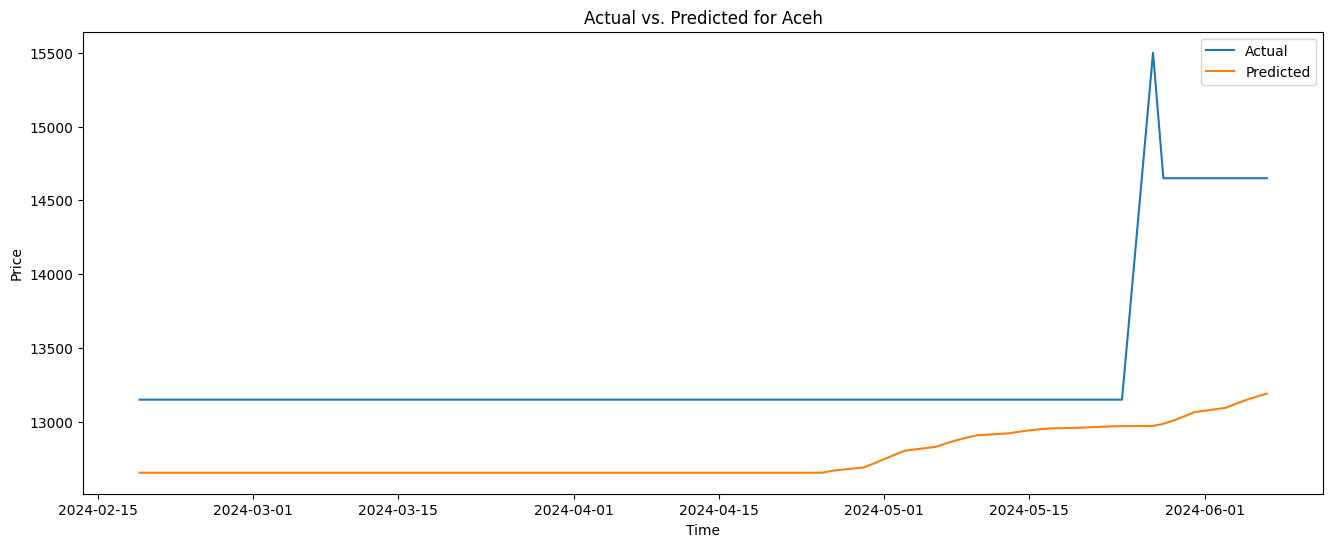

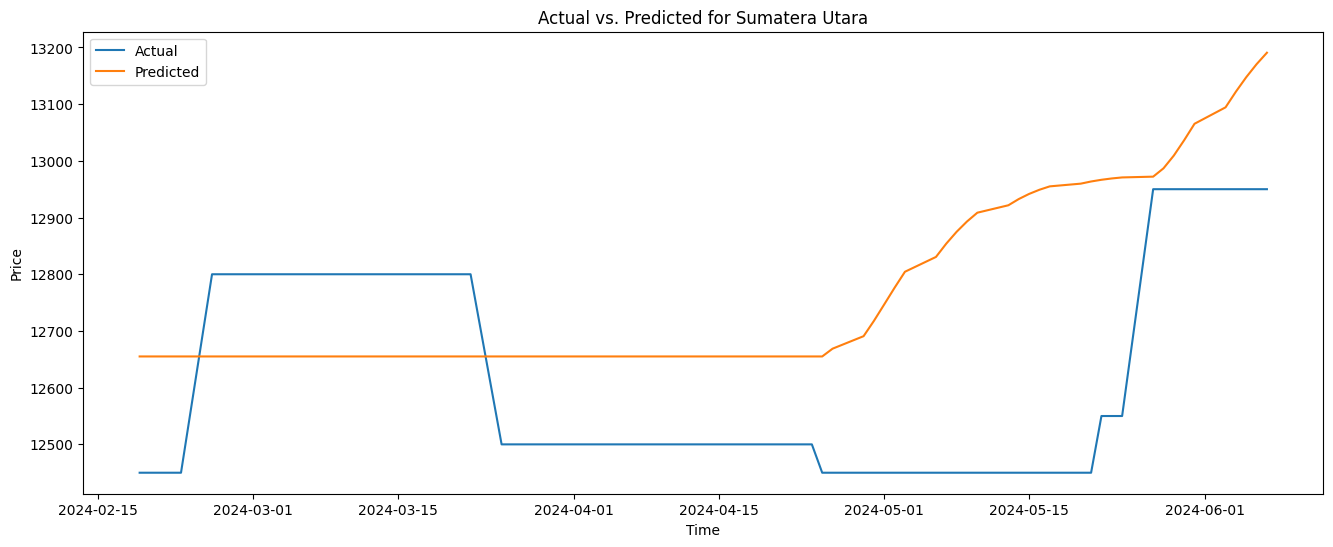

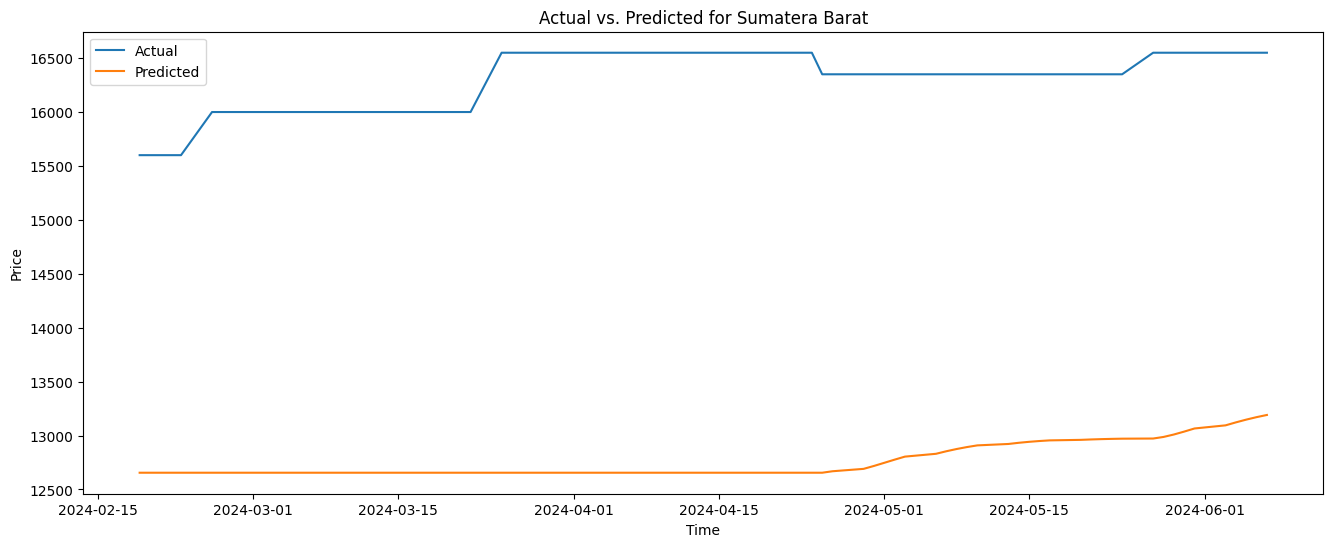

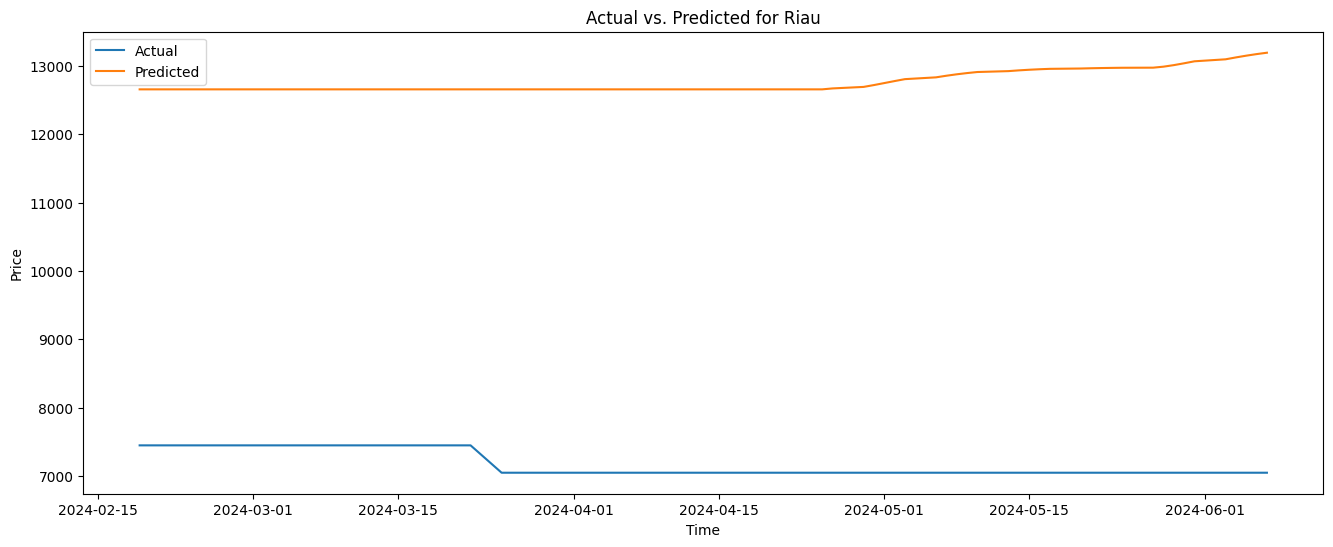

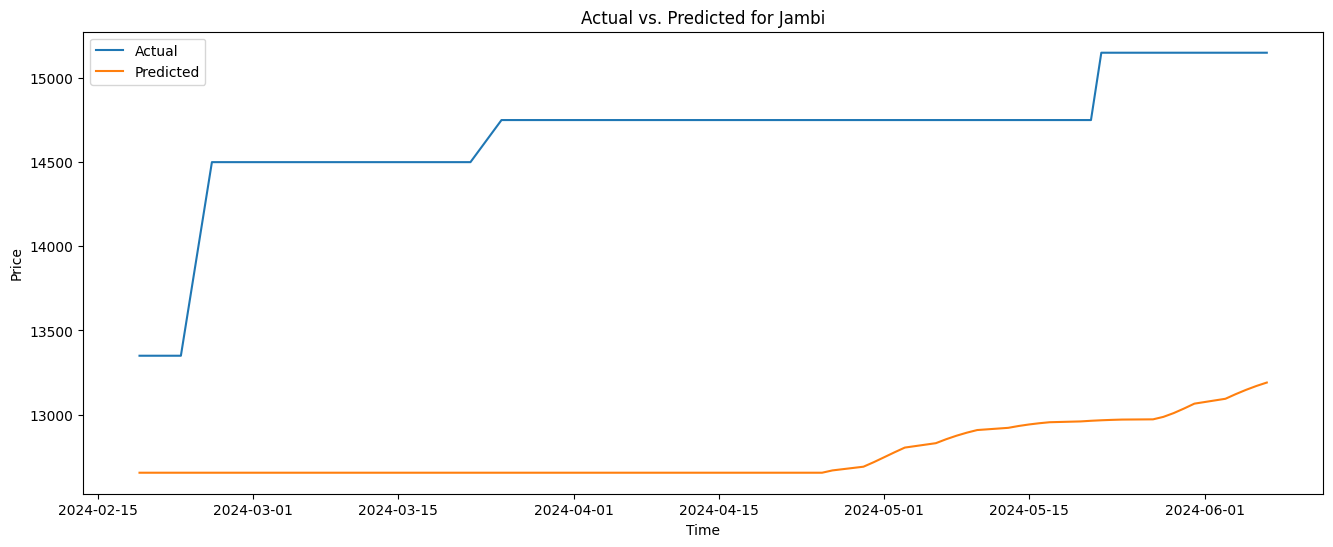

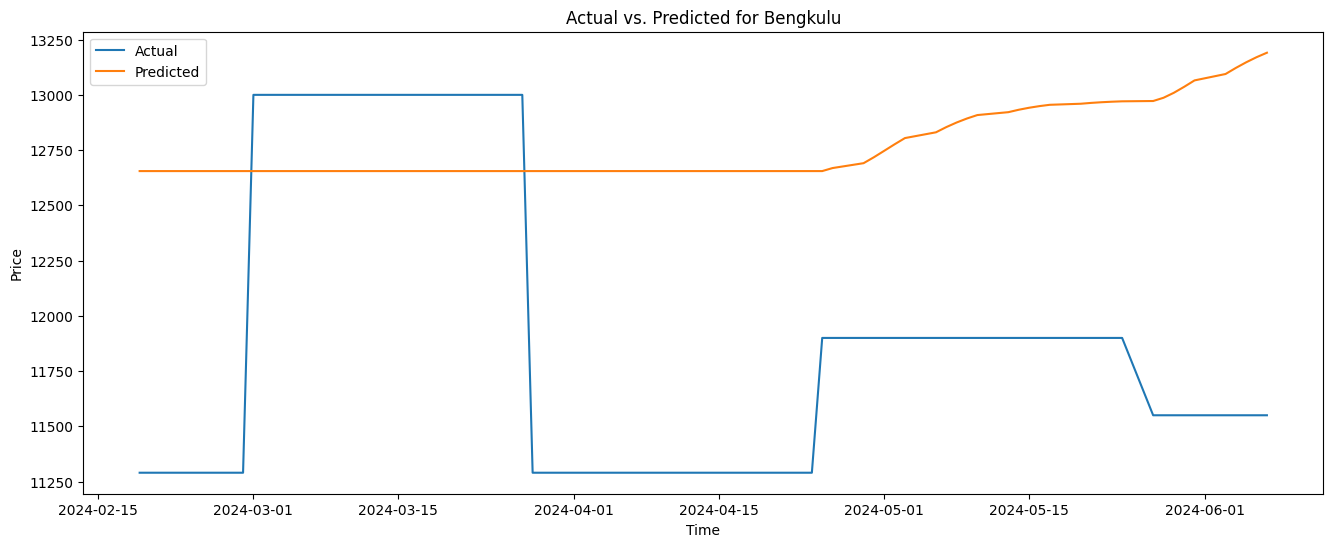

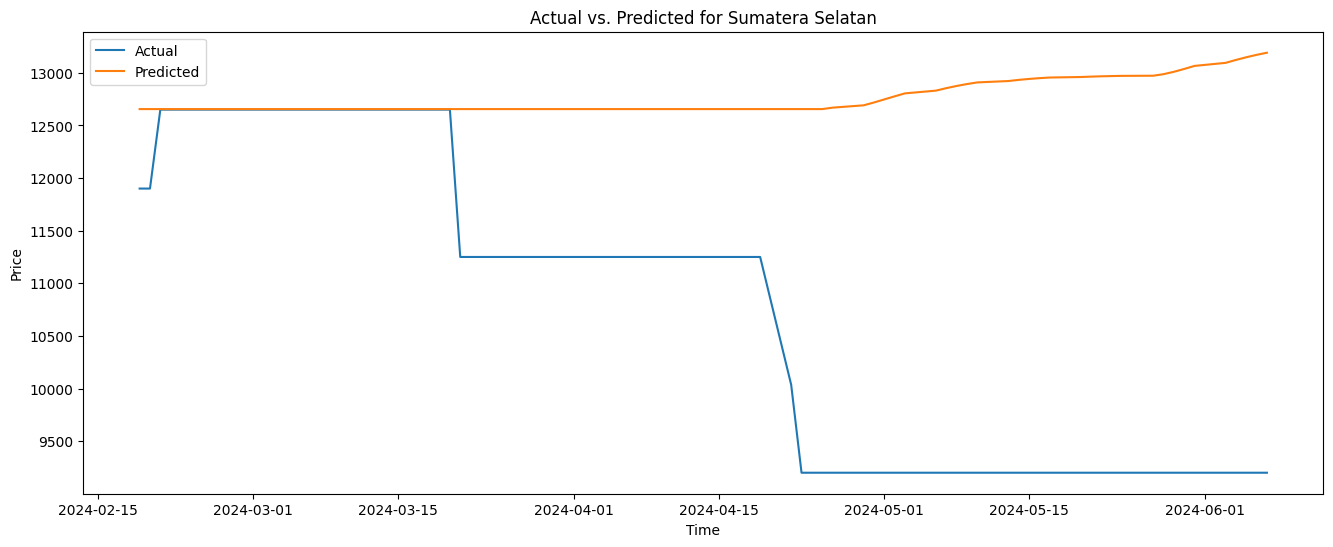

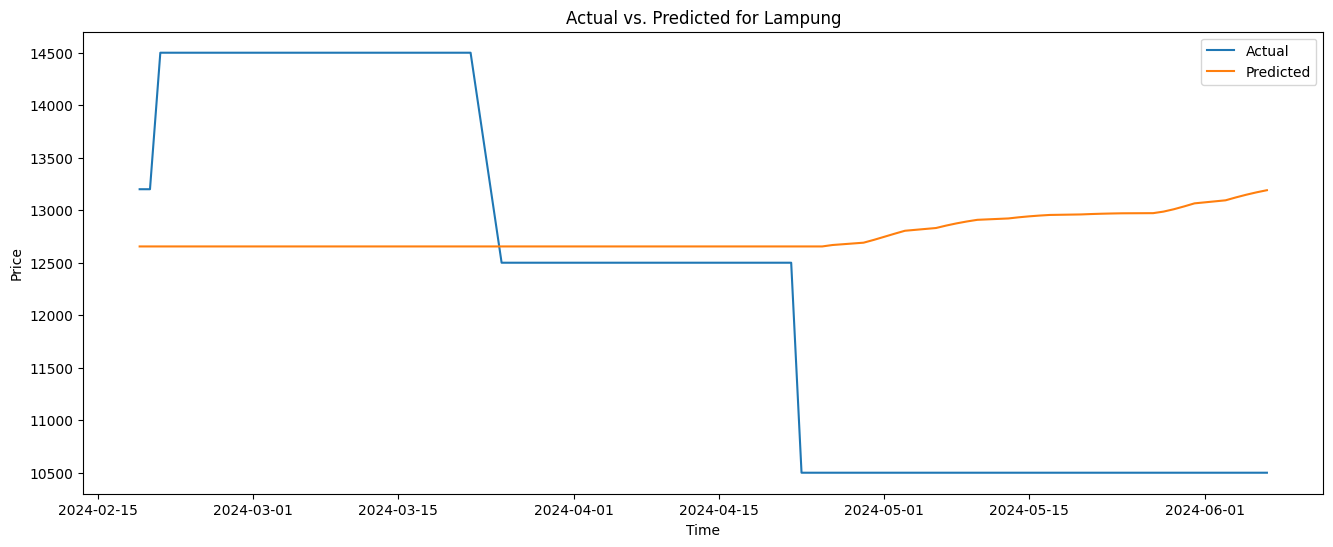

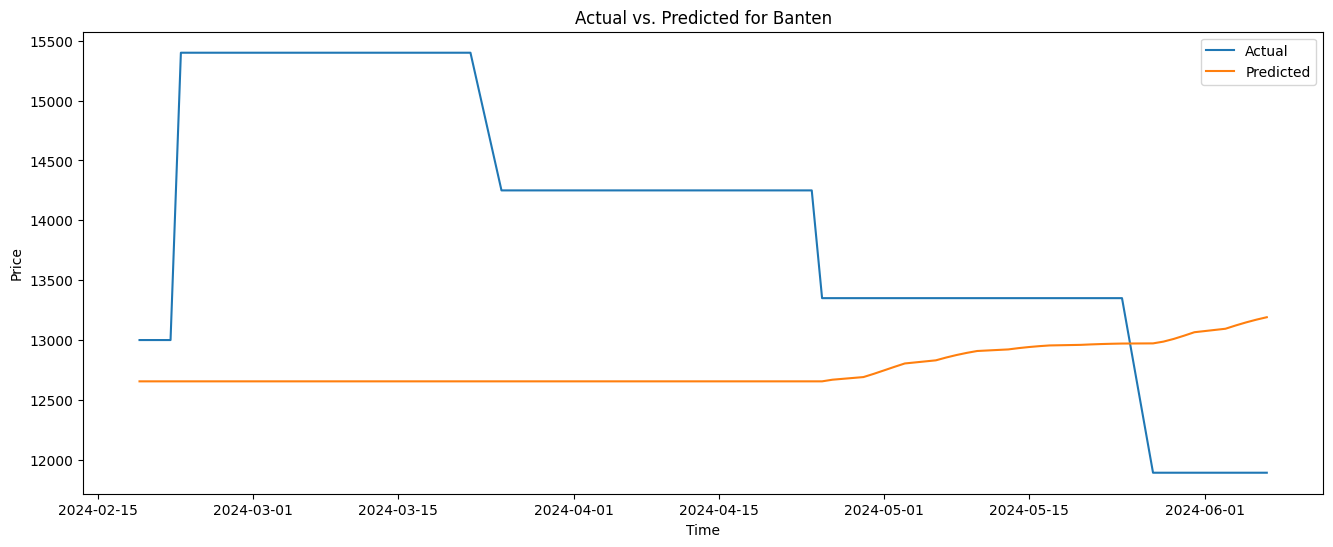

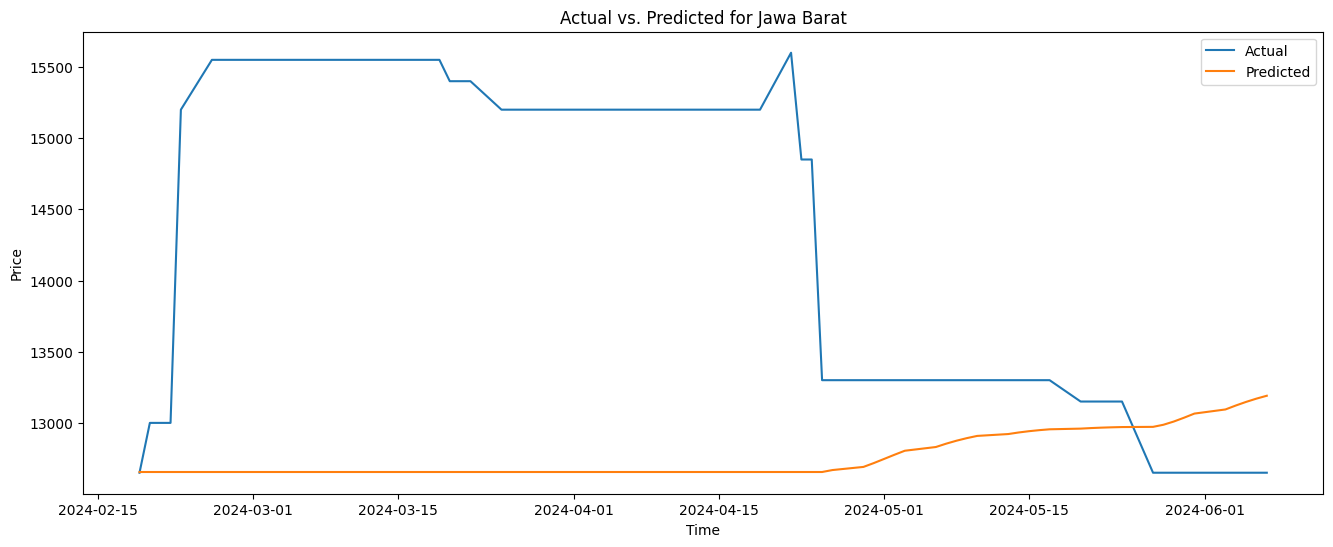

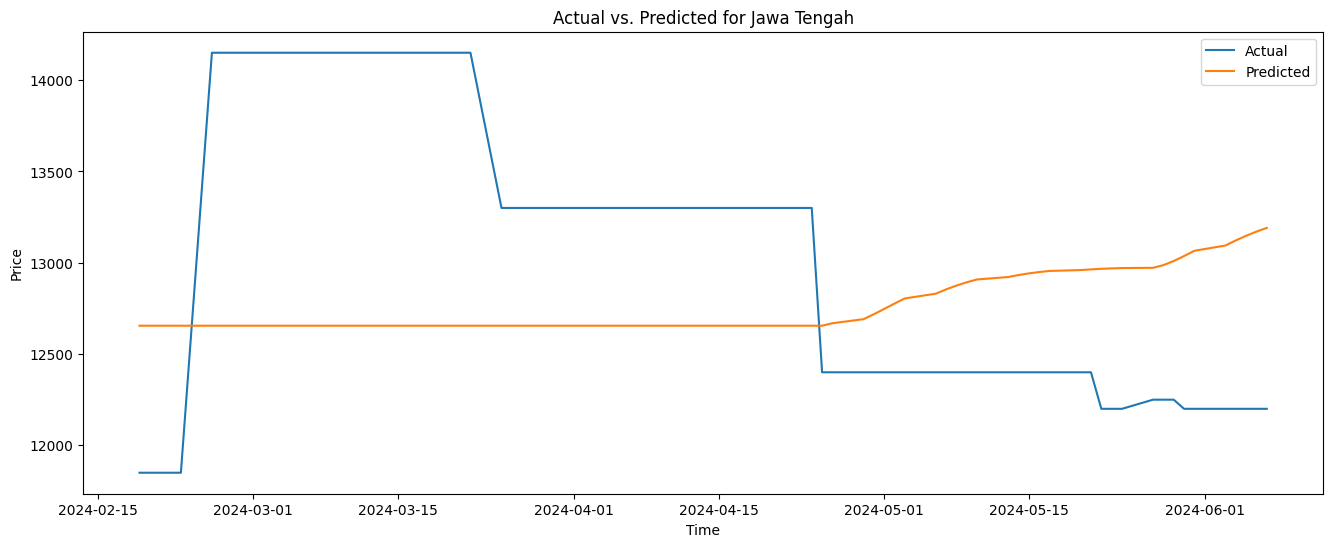

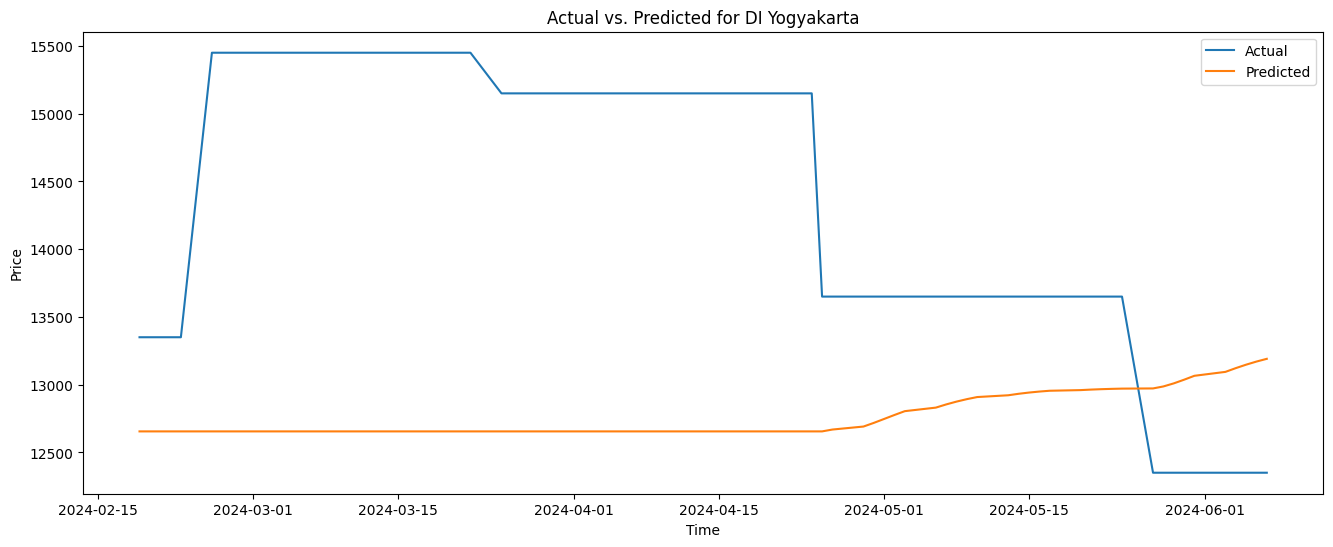

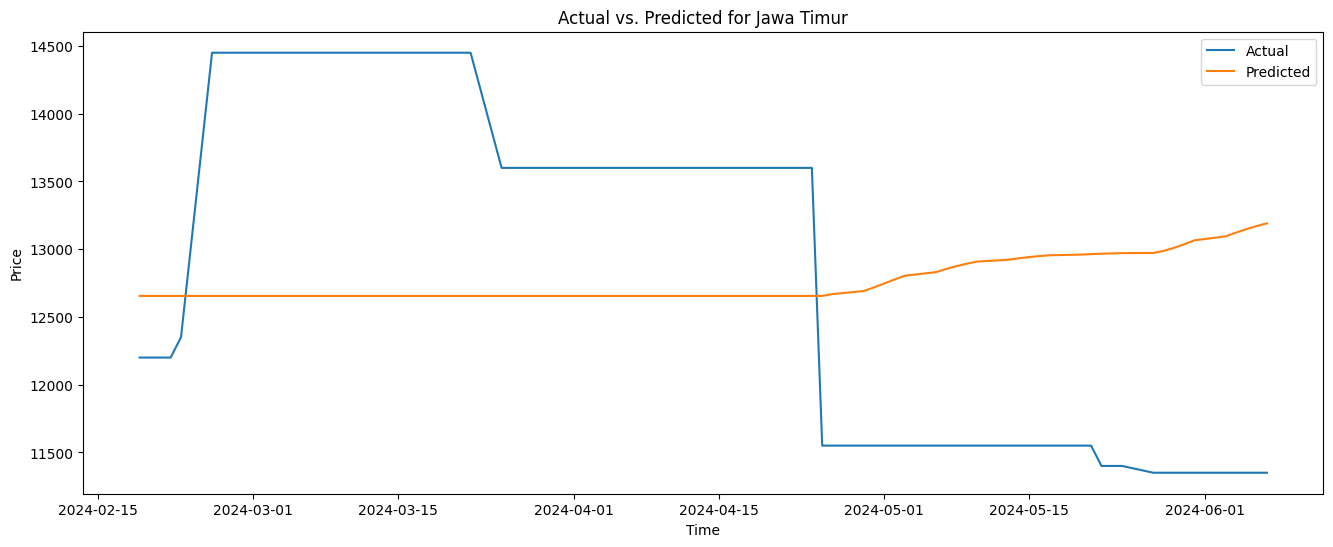

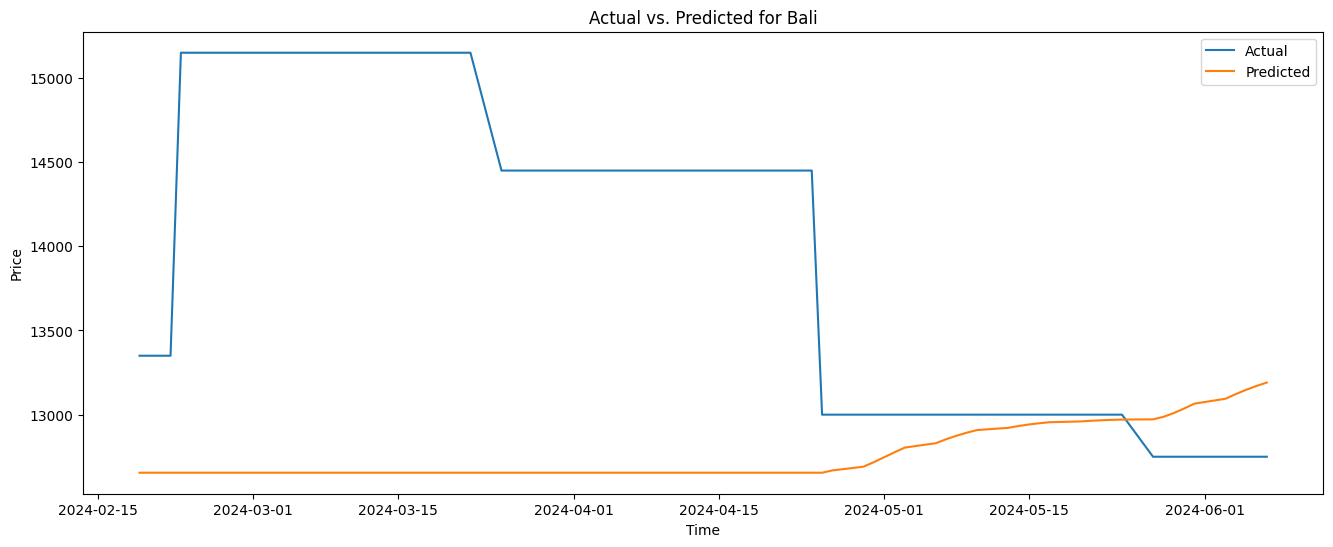

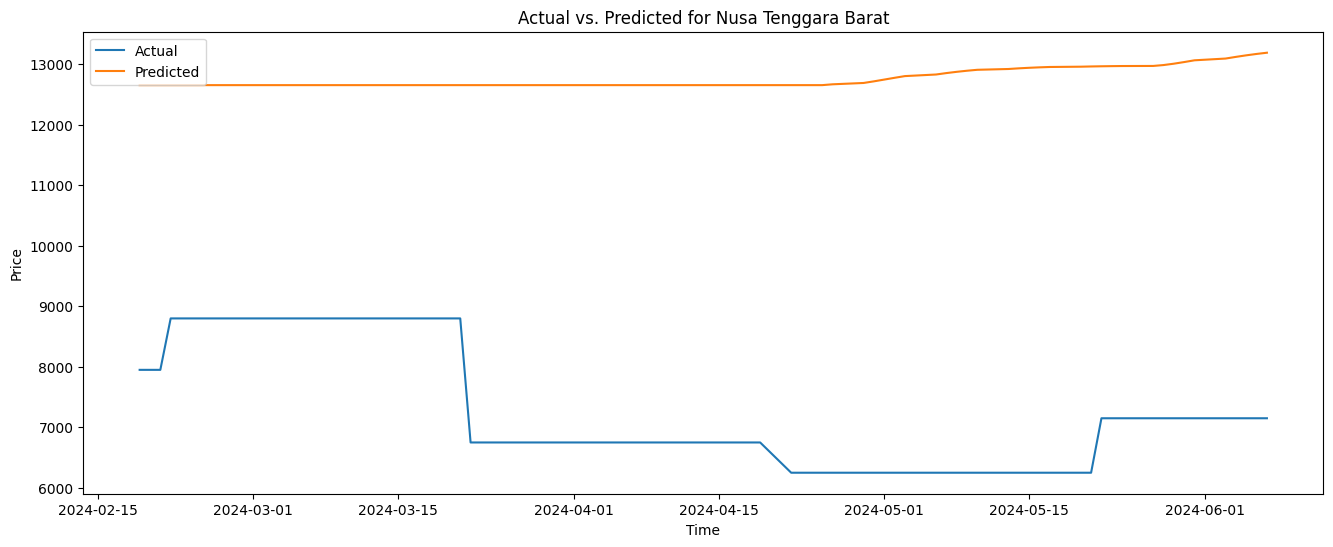

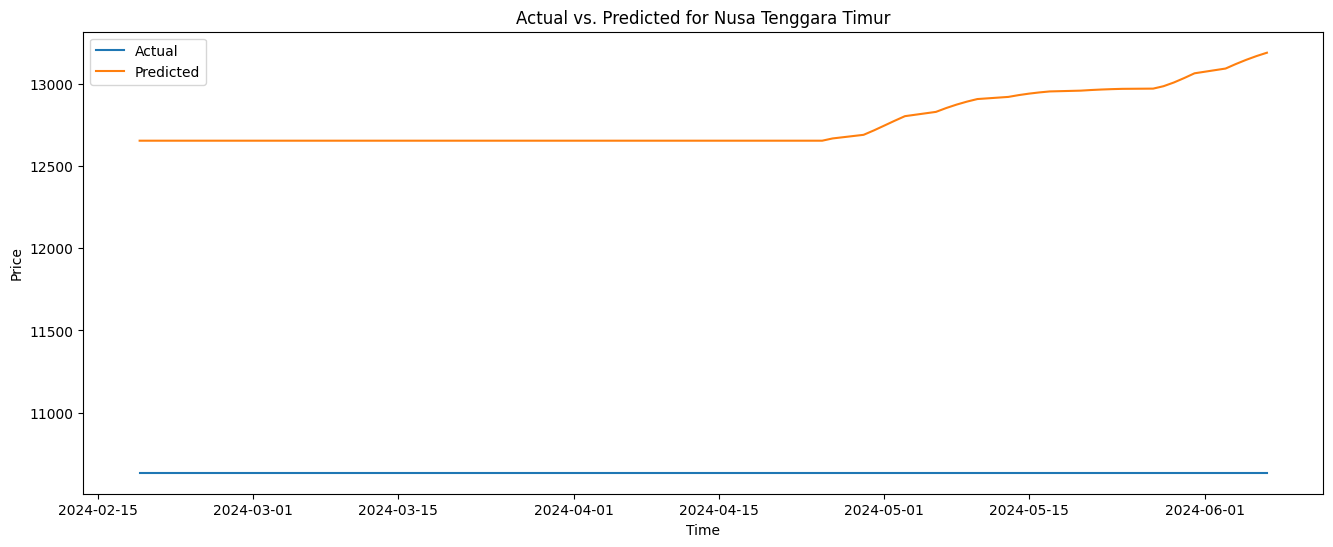

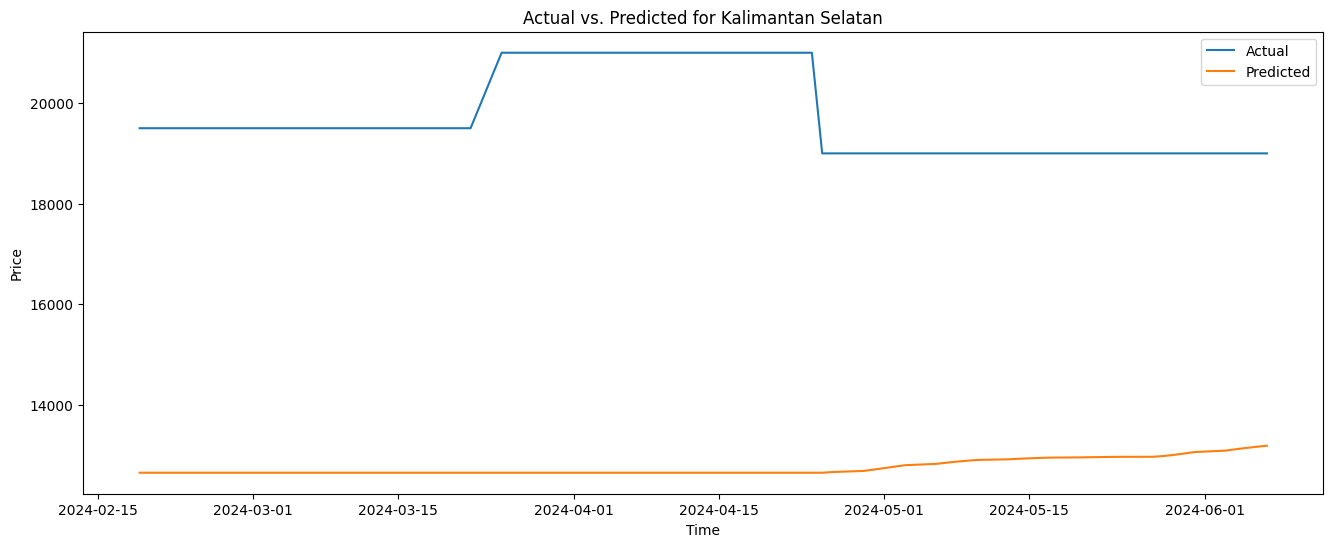

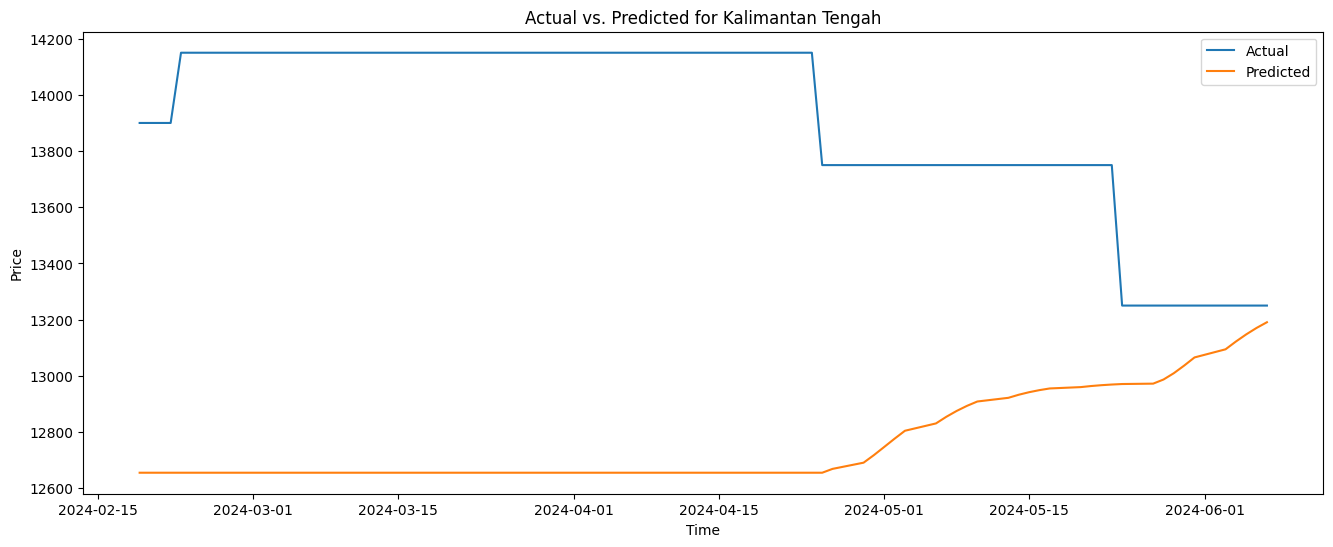

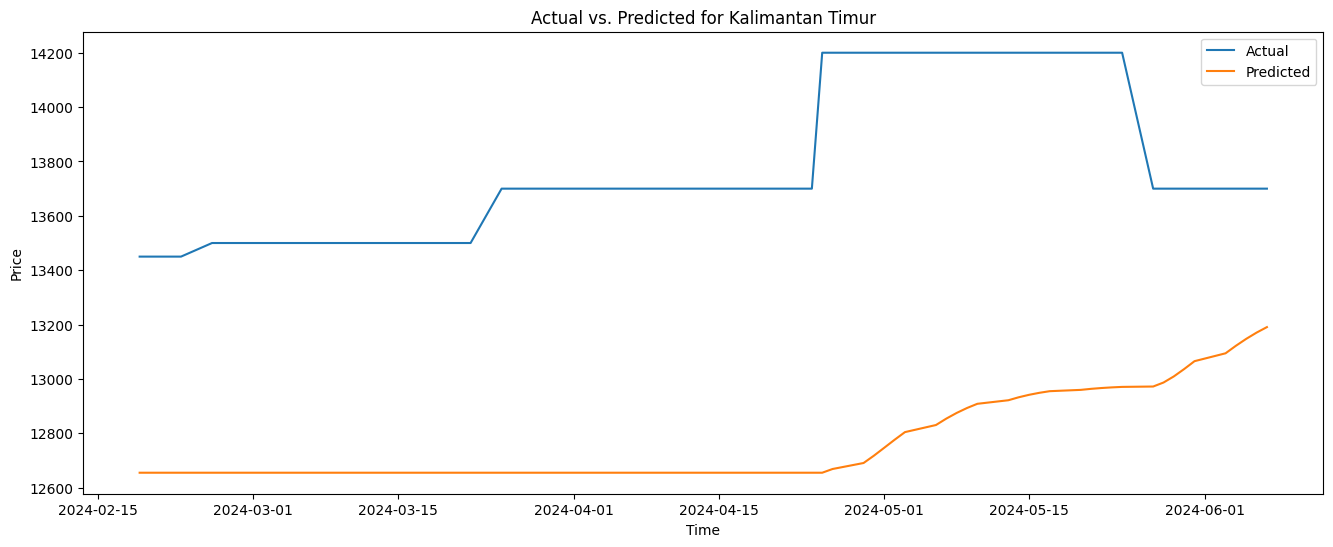

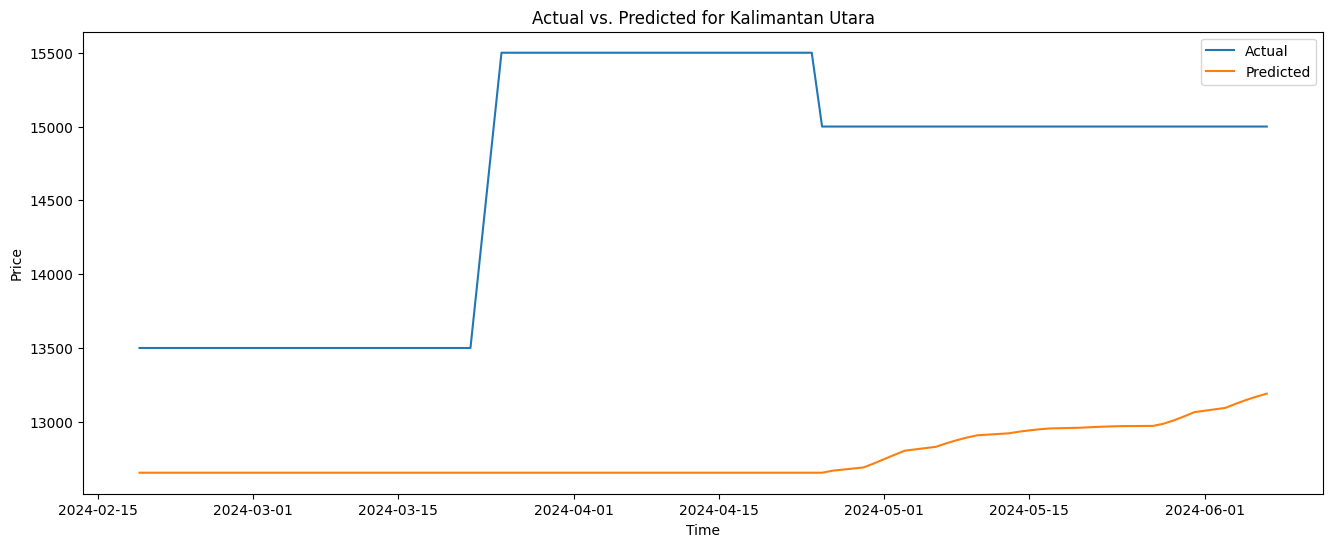

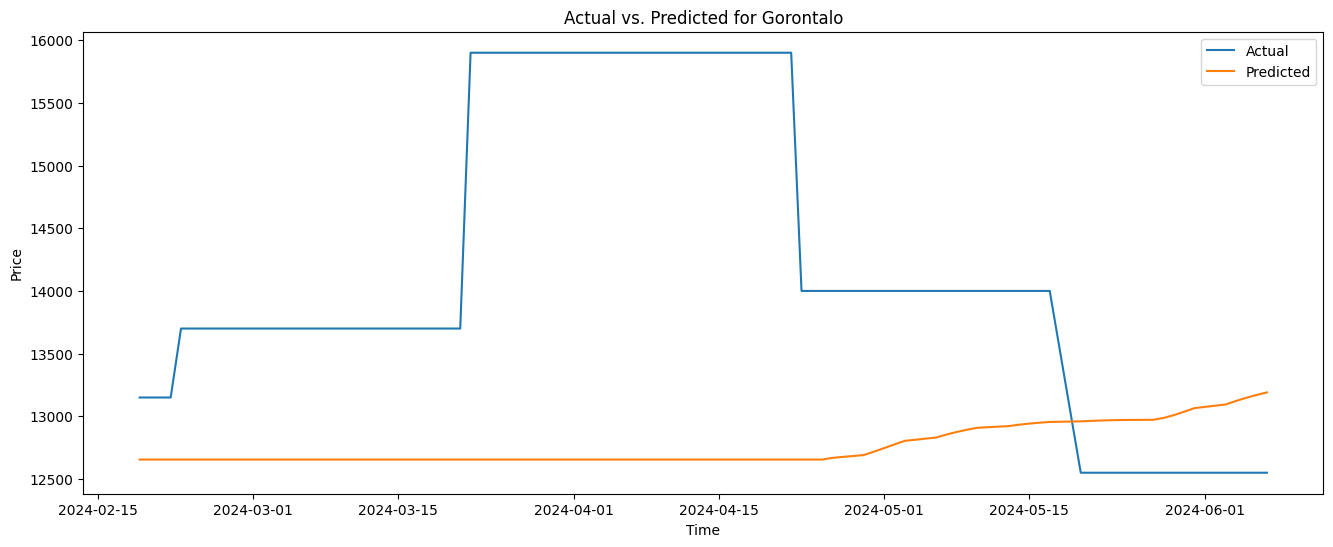

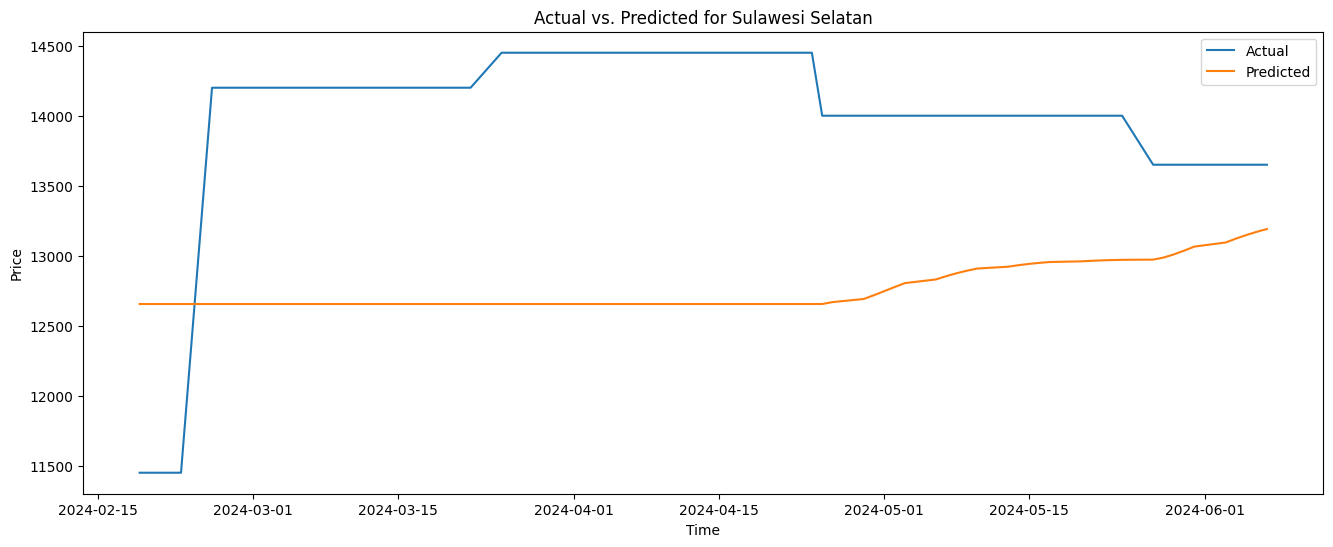

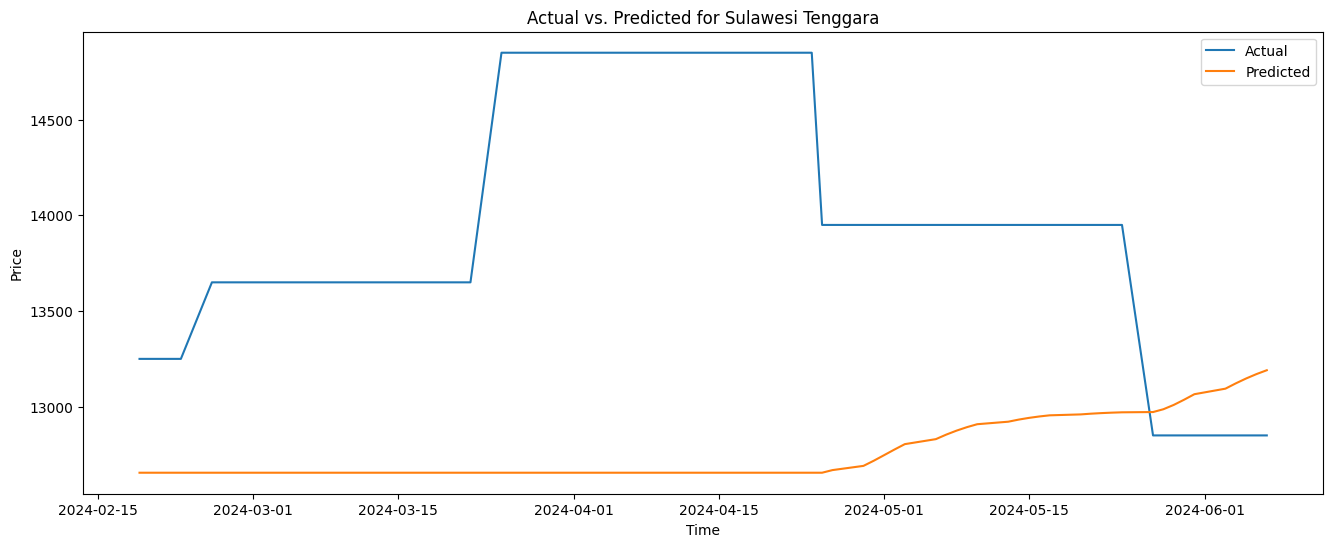

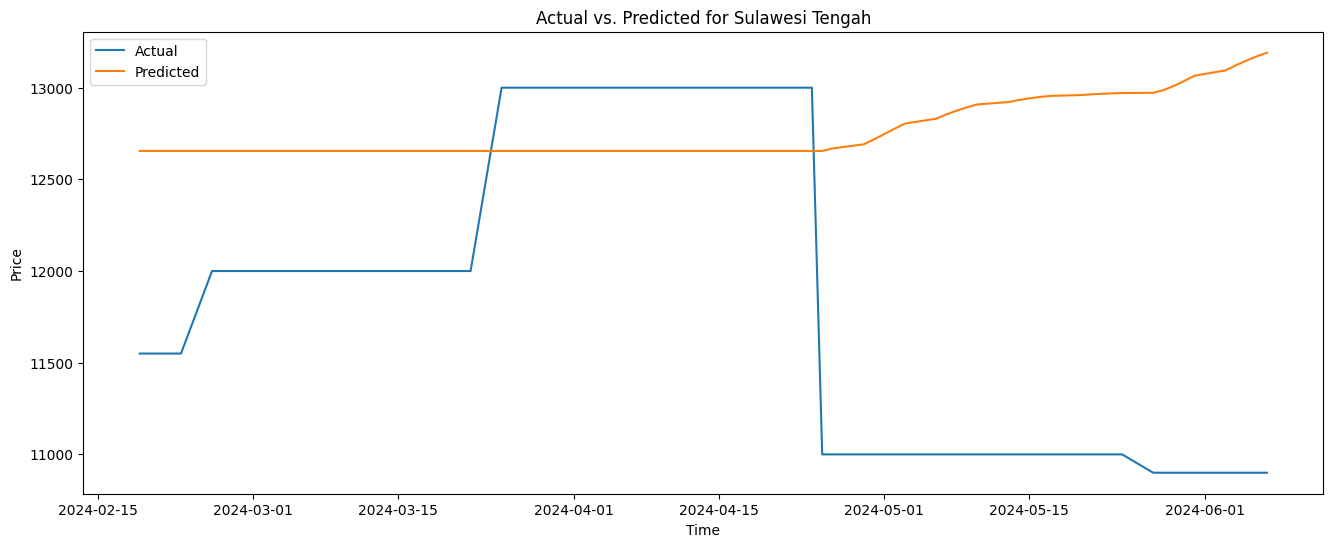

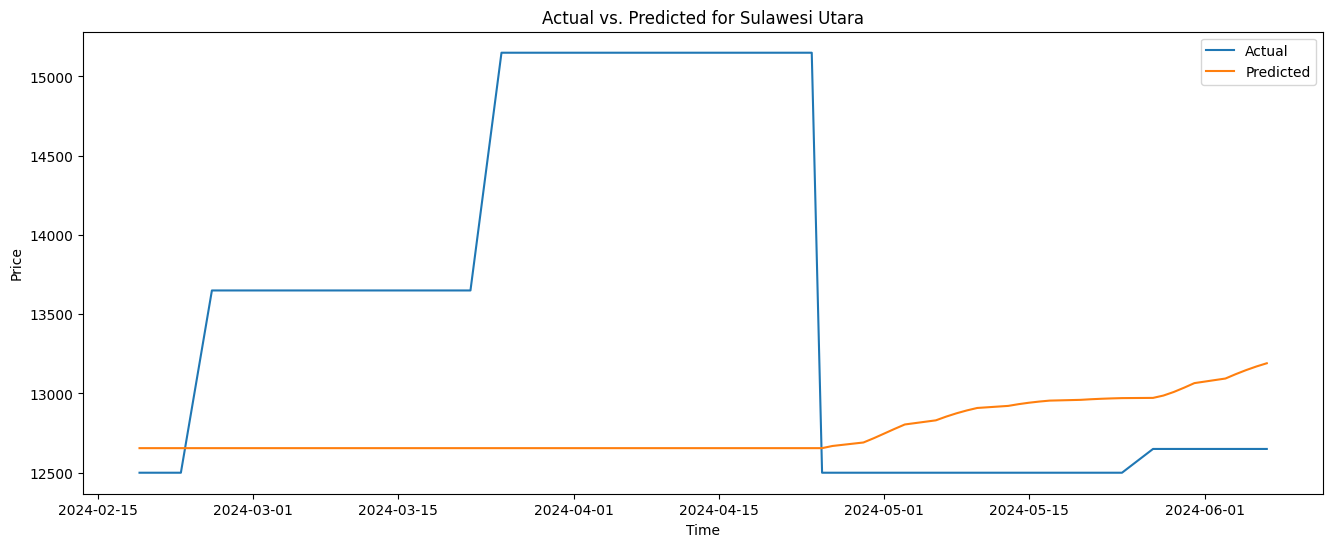

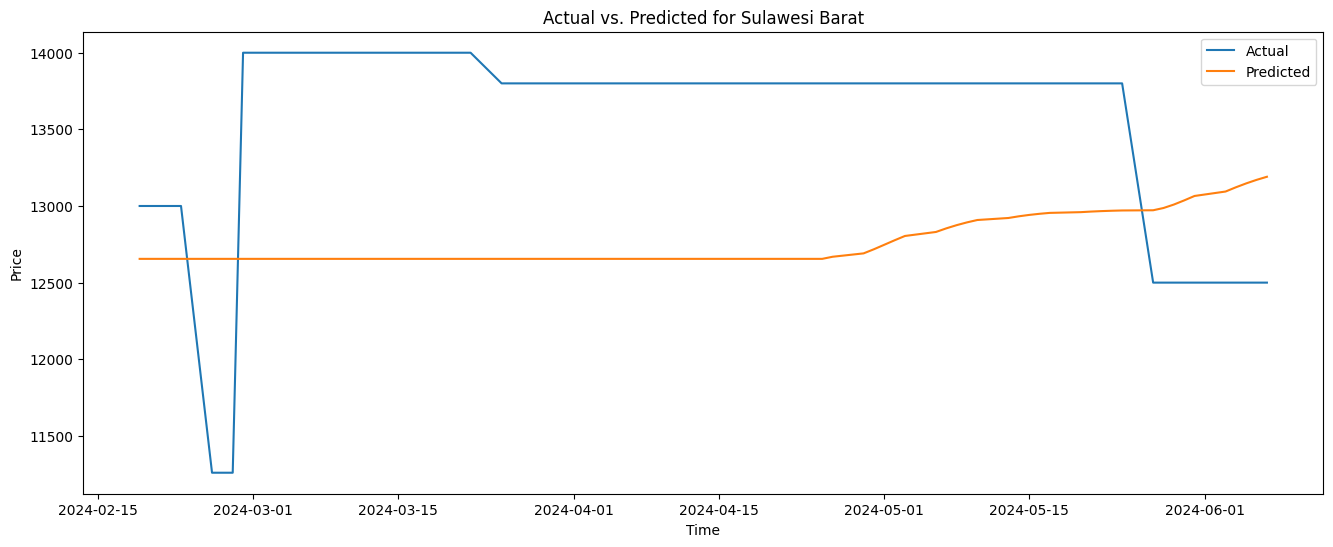

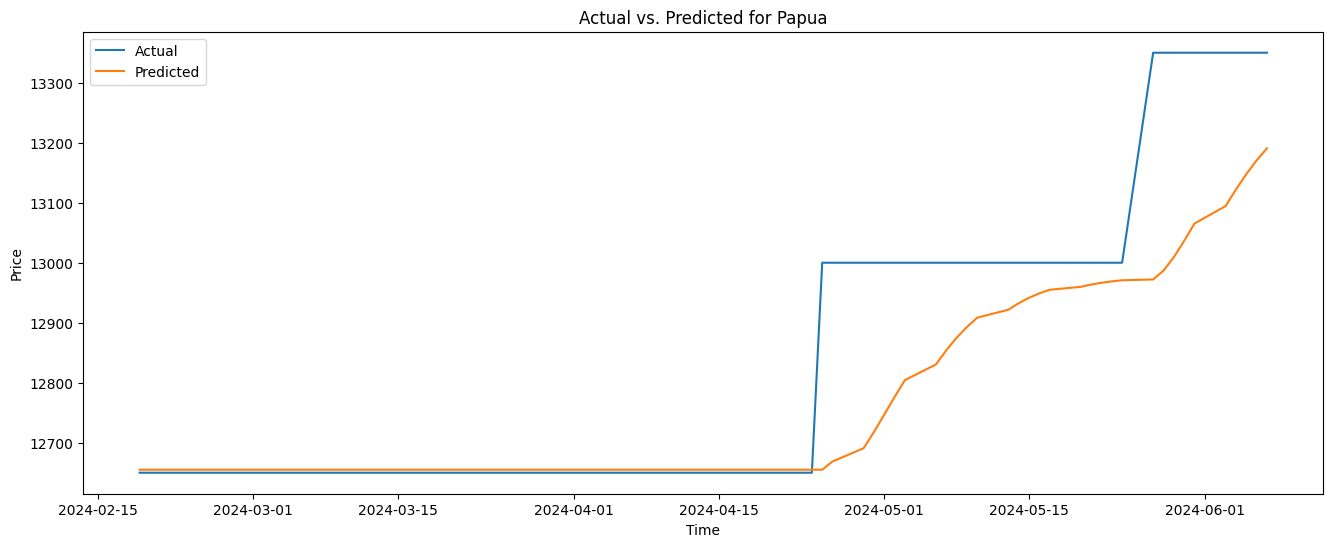

In [ ]:
for column in column_names:
  # Get actual and predicted values
  actual_values = df[column][train_size:]
  predicted_values = predictions[:, 0]

  # Create a DataFrame
  results_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

  # Plot the actual and predicted values
  plt.figure(figsize=(16, 6))
  plt.plot(results_df['Actual'], label='Actual')
  plt.plot(results_df['Predicted'], label='Predicted')
  plt.title(f'Actual vs. Predicted for {column}')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.show()



1/1 [==============================] - 0s 26ms/step
Predicted values for Aceh:


Aceh
2024-06-08  14233.299805
2024-06-09  14289.052734
2024-06-10  14325.966797
2024-06-11  14349.857422
2024-06-12  14364.943359
...                  ...
2025-06-04  14243.632812
2025-06-05  14243.597656
2025-06-06  14243.559570
2025-06-07  14243.524414
2025-06-08  14243.487305

[366 rows x 1 columns]

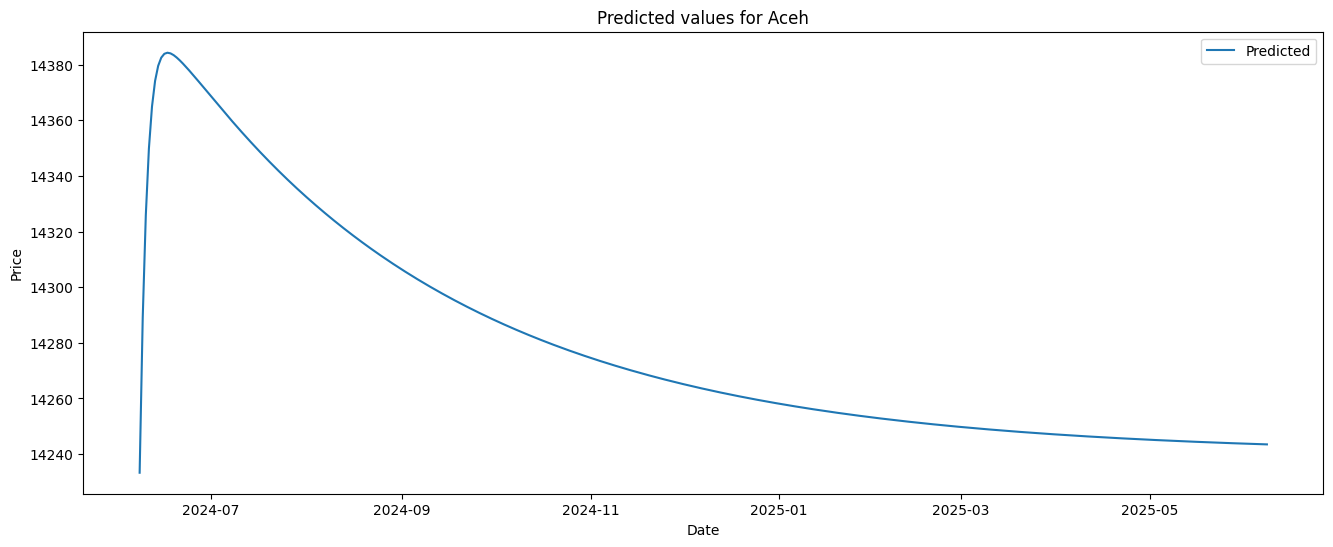

1/1 [==============================] - 0s 44ms/step
Predicted values for Sumatera Utara:


Sumatera Utara
2024-06-08    12795.643555
2024-06-09    12813.555664
2024-06-10    12824.970703
2024-06-11    12831.886719
2024-06-12    12835.761719
...                    ...
2025-06-04    12672.336914
2025-06-05    12672.295898
2025-06-06    12672.255859
2025-06-07    12672.215820
2025-06-08    12672.175781

[366 rows x 1 columns]

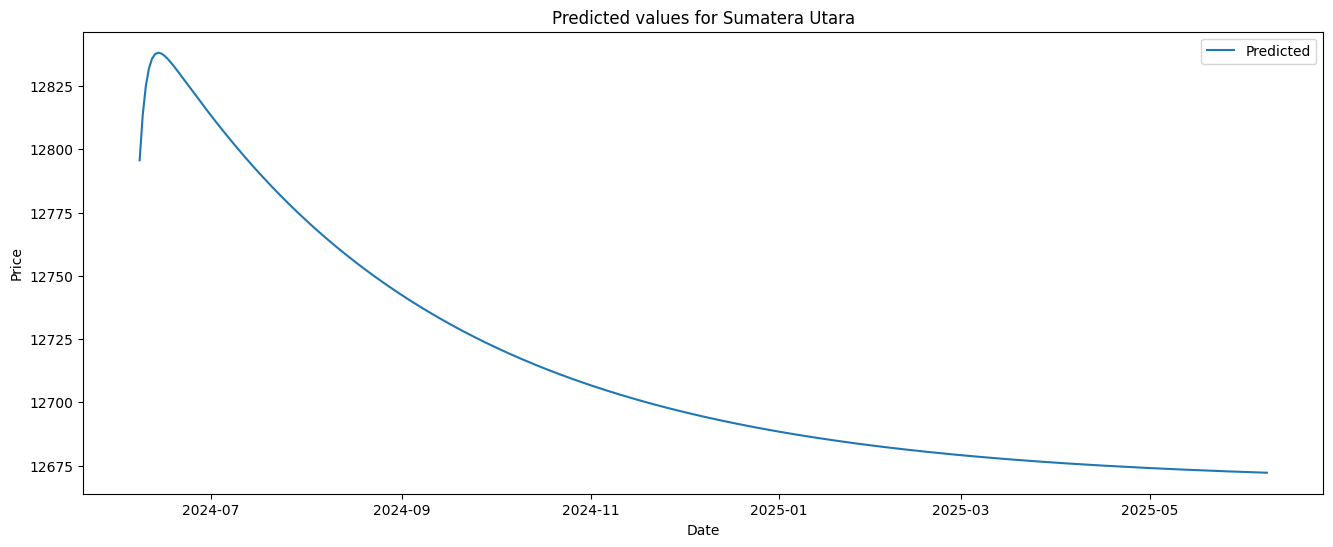

1/1 [==============================] - 0s 27ms/step
Predicted values for Sumatera Barat:


Sumatera Barat
2024-06-08    16421.810547
2024-06-09    16426.798828
2024-06-10    16427.640625
2024-06-11    16425.626953
2024-06-12    16421.705078
...                    ...
2025-06-04    15830.246094
2025-06-05    15830.122070
2025-06-06    15829.998047
2025-06-07    15829.875977
2025-06-08    15829.755859

[366 rows x 1 columns]

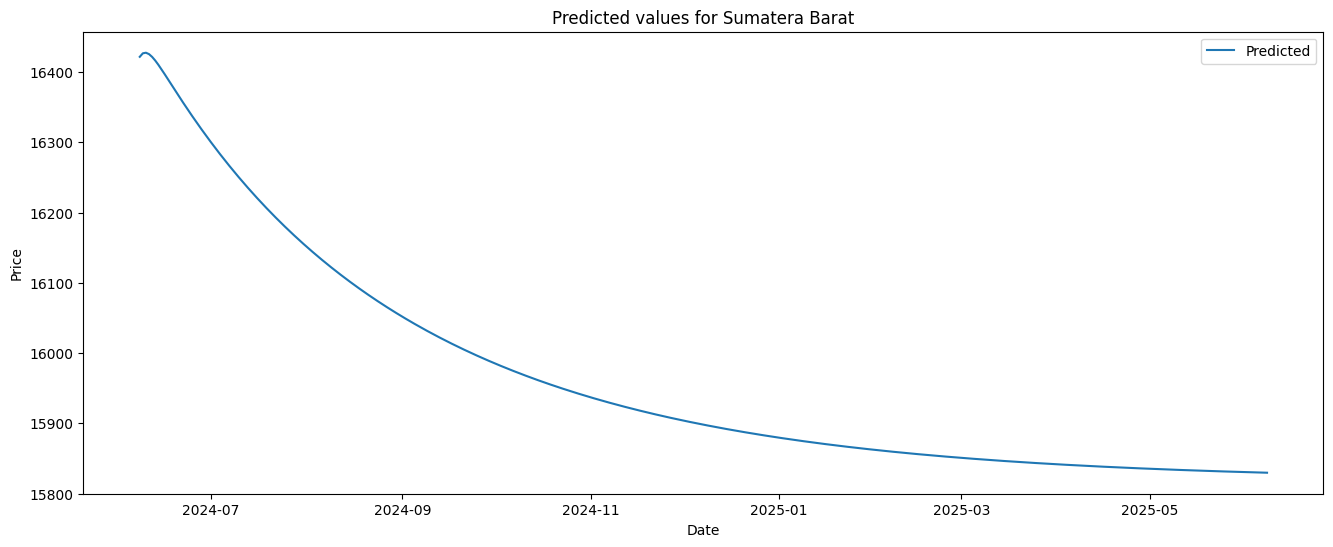

1/1 [==============================] - 0s 33ms/step
Predicted values for Riau:


Riau
2024-06-08  7046.110352
2024-06-09  7045.962402
2024-06-10  7045.714844
2024-06-11  7045.399414
2024-06-12  7045.039062
...                 ...
2025-06-04  7003.889648
2025-06-05  7003.879883
2025-06-06  7003.869629
2025-06-07  7003.860352
2025-06-08  7003.851074

[366 rows x 1 columns]

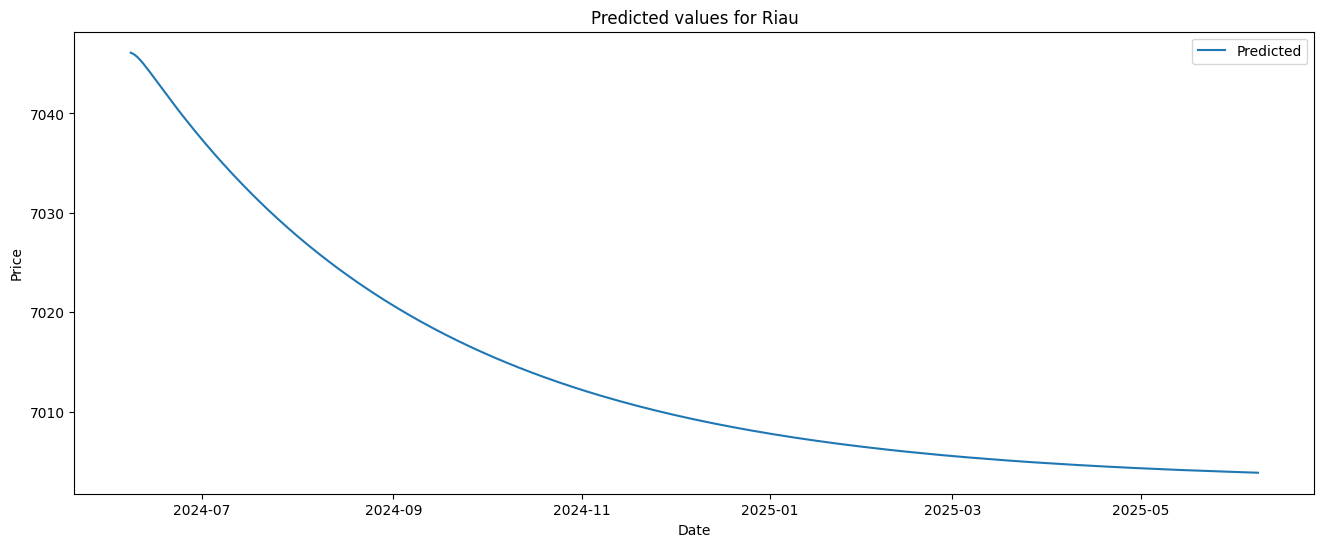

1/1 [==============================] - 0s 37ms/step
Predicted values for Jambi:


Jambi
2024-06-08  14925.286133
2024-06-09  14928.583984
2024-06-10  14924.833008
2024-06-11  14916.264648
2024-06-12  14904.502930
...                  ...
2025-06-04  13511.244141
2025-06-05  13510.952148
2025-06-06  13510.663086
2025-06-07  13510.378906
2025-06-08  13510.095703

[366 rows x 1 columns]

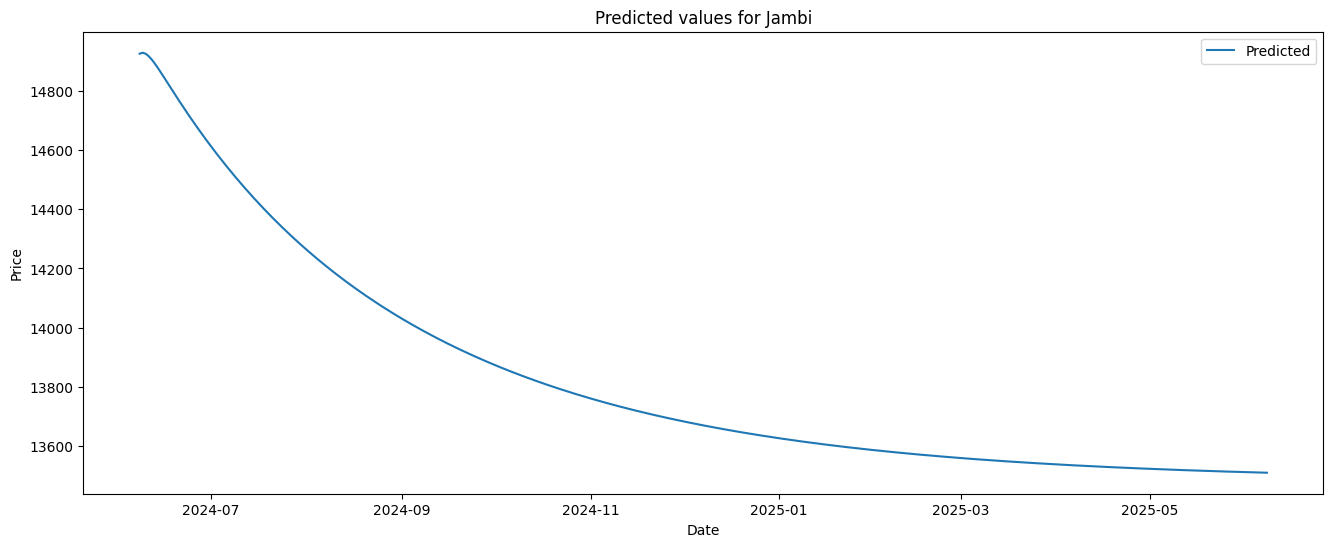

1/1 [==============================] - 0s 32ms/step
Predicted values for Bengkulu:


Bengkulu
2024-06-08  11720.263672
2024-06-09  11708.392578
2024-06-10  11702.781250
2024-06-11  11701.500977
2024-06-12  11703.148438
...                  ...
2025-06-04  12424.466797
2025-06-05  12424.665039
2025-06-06  12424.862305
2025-06-07  12425.056641
2025-06-08  12425.249023

[366 rows x 1 columns]

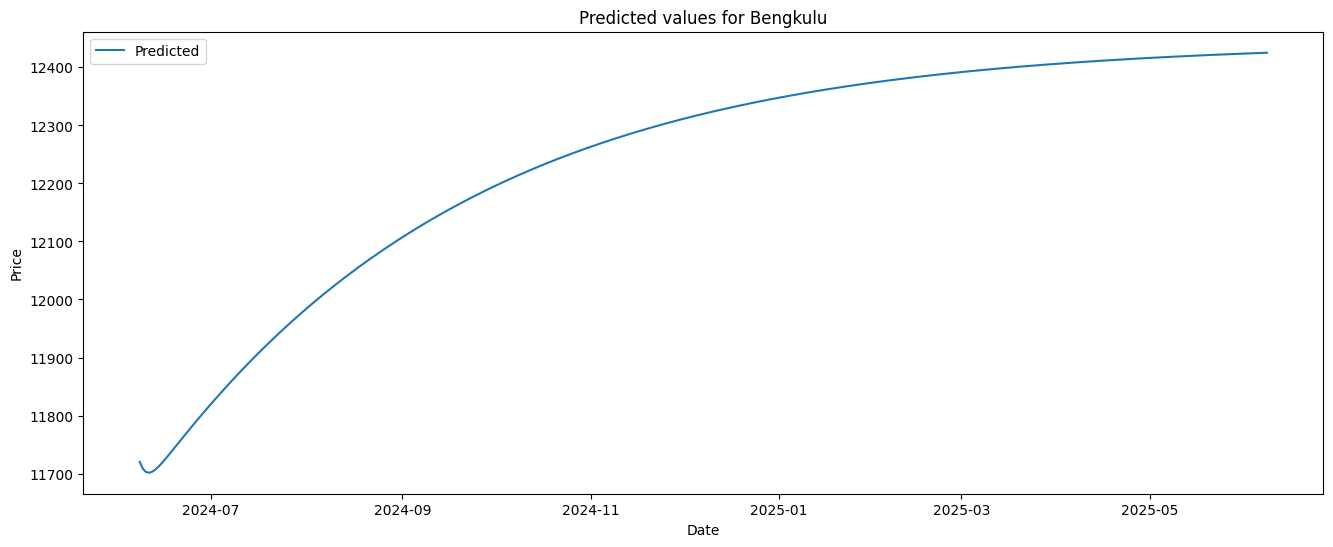

1/1 [==============================] - 0s 29ms/step
Predicted values for Sumatera Selatan:


Sumatera Selatan
2024-06-08       9386.829102
2024-06-09       9393.848633
2024-06-10       9405.581055
2024-06-11       9420.530273
2024-06-12       9437.599609
...                      ...
2025-06-04      11455.845703
2025-06-05      11456.434570
2025-06-06      11457.016602
2025-06-07      11457.594727
2025-06-08      11458.163086

[366 rows x 1 columns]

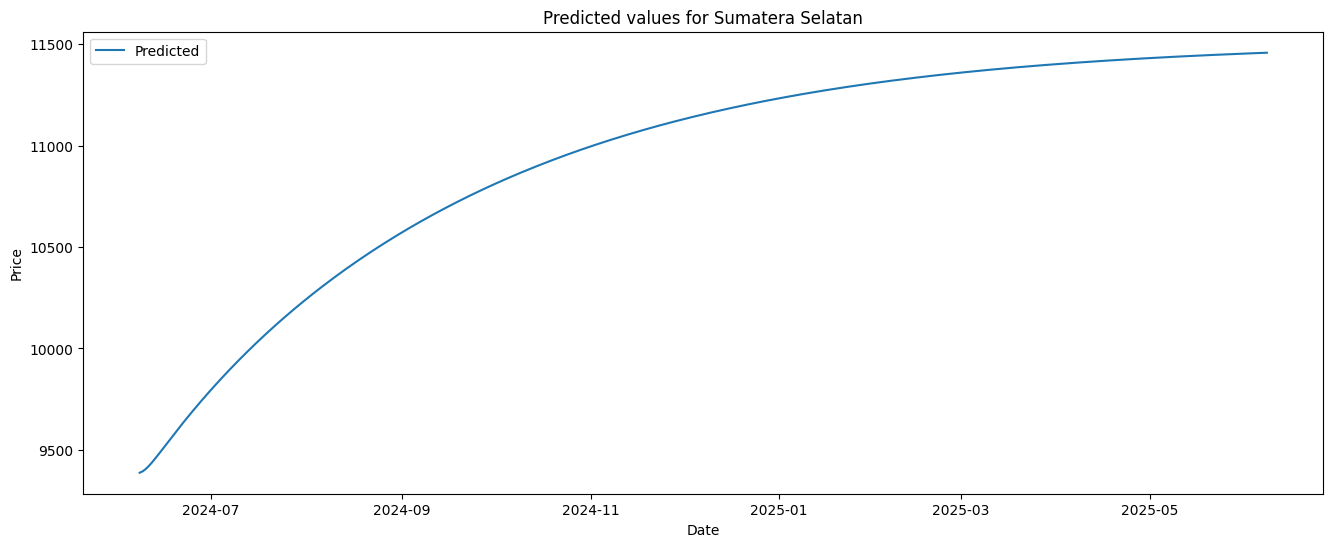

1/1 [==============================] - 0s 30ms/step
Predicted values for Lampung:


Lampung
2024-06-08  10697.342773
2024-06-09  10704.875977
2024-06-10  10717.452148
2024-06-11  10733.479492
2024-06-12  10751.789062
...                  ...
2025-06-04  12988.477539
2025-06-05  12989.127930
2025-06-06  12989.770508
2025-06-07  12990.407227
2025-06-08  12991.036133

[366 rows x 1 columns]

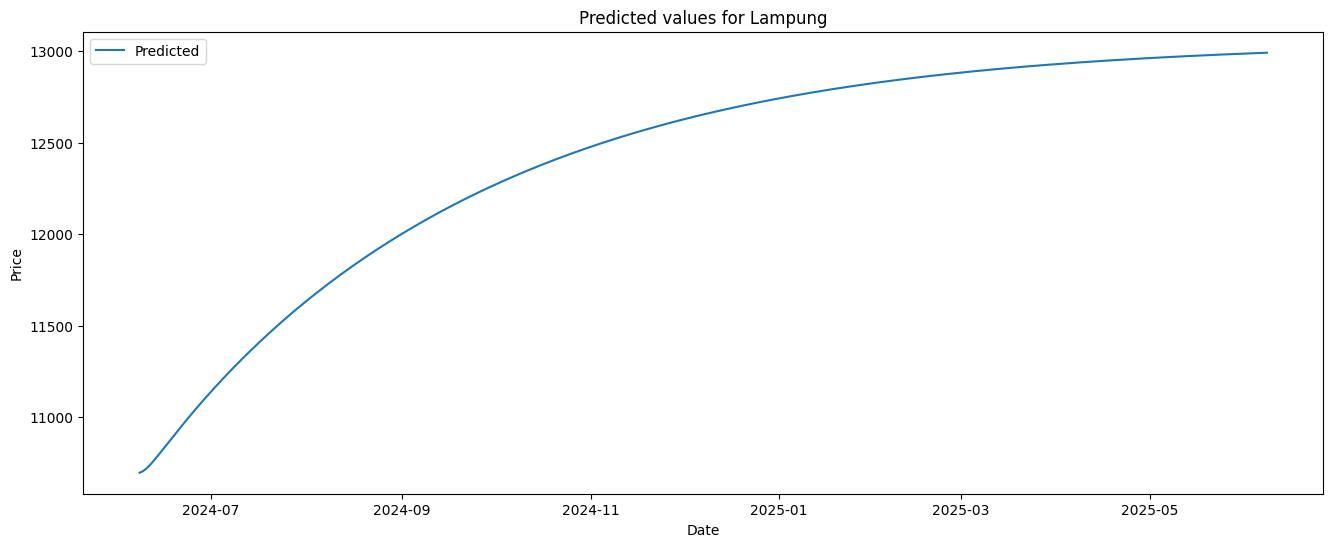

1/1 [==============================] - 0s 28ms/step
Predicted values for Banten:


Banten
2024-06-08  12461.527344
2024-06-09  12406.737305
2024-06-10  12374.547852
2024-06-11  12358.020508
2024-06-12  12352.102539
...                  ...
2025-06-04  13776.270508
2025-06-05  13776.677734
2025-06-06  13777.081055
2025-06-07  13777.479492
2025-06-08  13777.874023

[366 rows x 1 columns]

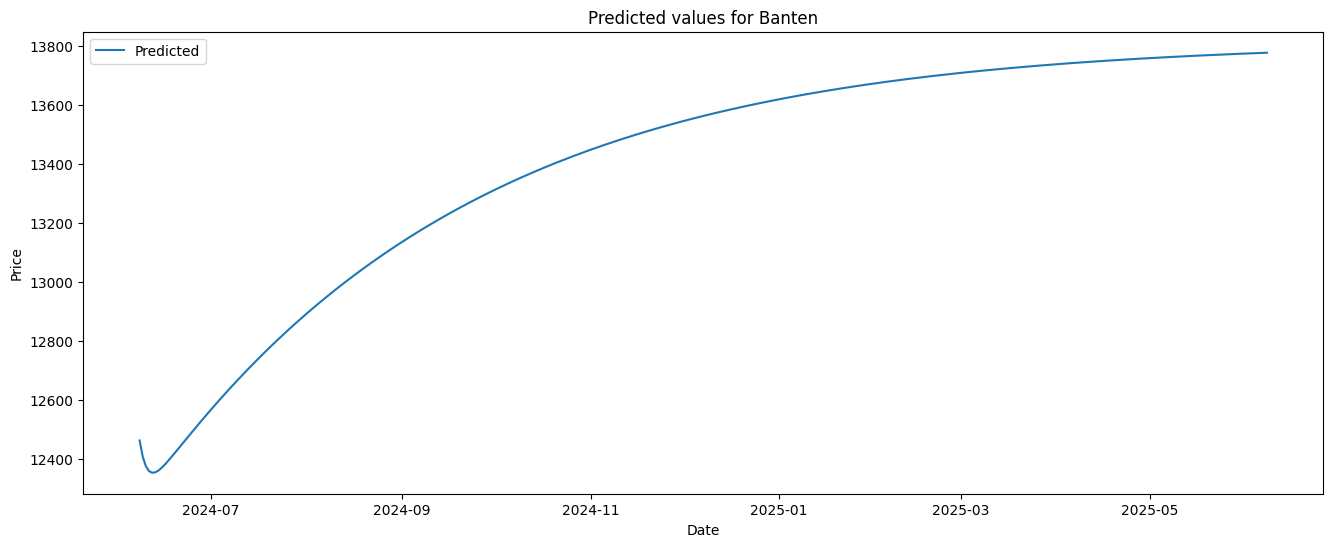

1/1 [==============================] - 0s 28ms/step
Predicted values for Jawa Barat:


Jawa Barat
2024-06-08  12913.771484
2024-06-09  12894.410156
2024-06-10  12885.149414
2024-06-11  12882.871094
2024-06-12  12885.309570
...                  ...
2025-06-04  14038.728516
2025-06-05  14039.048828
2025-06-06  14039.367188
2025-06-07  14039.680664
2025-06-08  14039.991211

[366 rows x 1 columns]

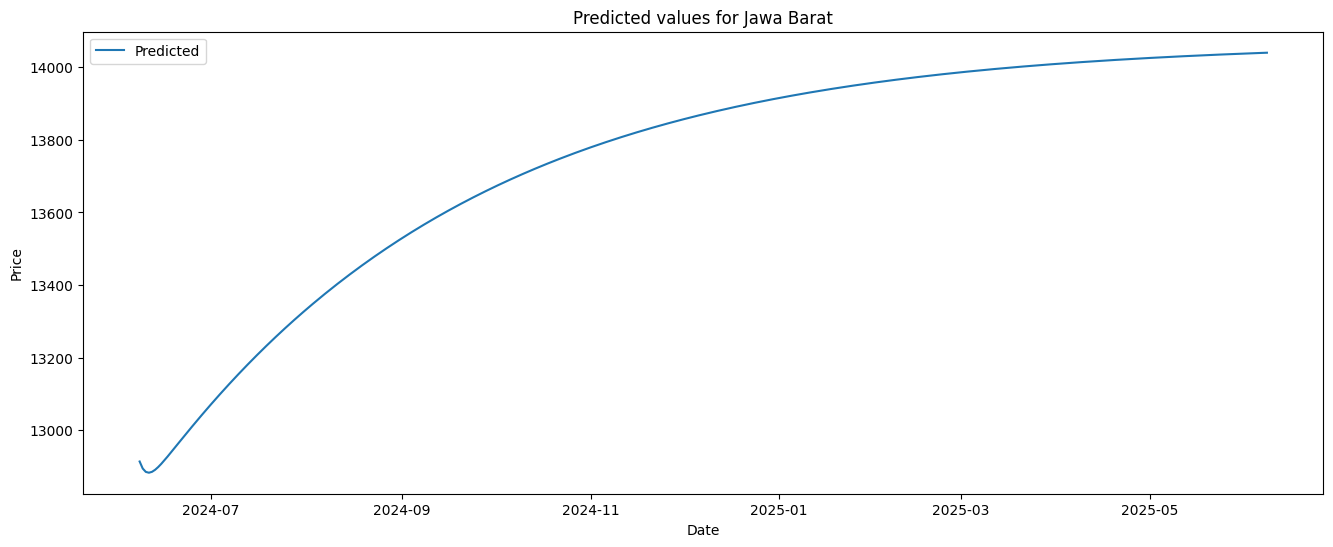

1/1 [==============================] - 0s 28ms/step
Predicted values for Jawa Tengah:


Jawa Tengah
2024-06-08  12297.910156
2024-06-09  12294.205078
2024-06-10  12293.861328
2024-06-11  12295.838867
2024-06-12  12299.378906
...                  ...
2025-06-04  12954.660156
2025-06-05  12954.836914
2025-06-06  12955.011719
2025-06-07  12955.184570
2025-06-08  12955.356445

[366 rows x 1 columns]

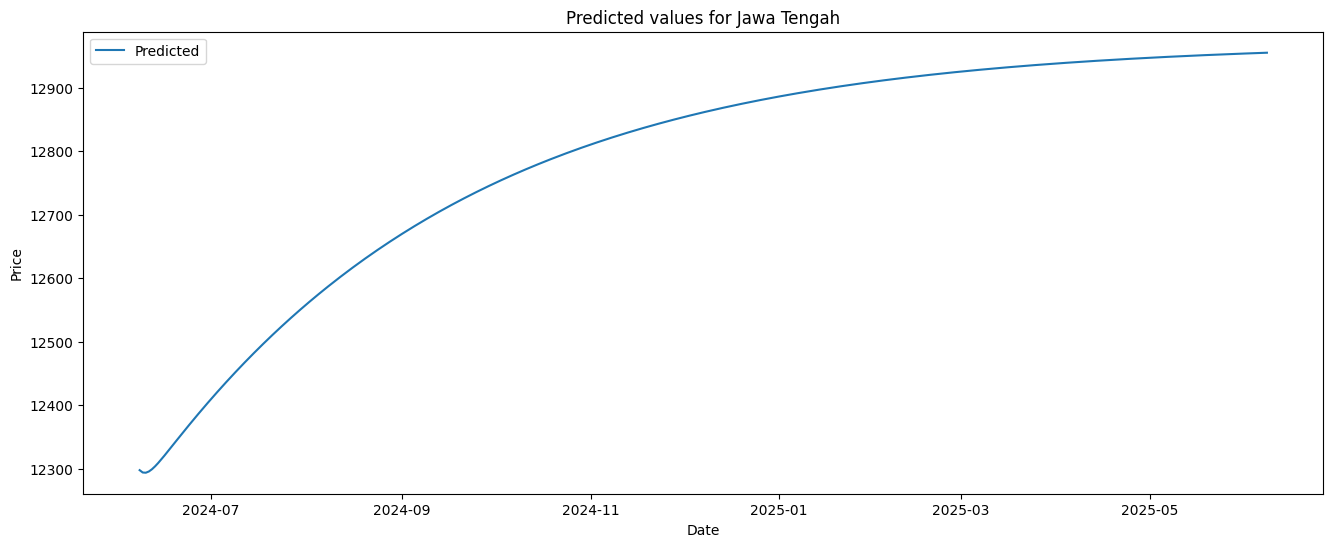

1/1 [==============================] - 0s 27ms/step
Predicted values for DI Yogyakarta:


DI Yogyakarta
2024-06-08   12848.753906
2024-06-09   12799.604492
2024-06-10   12770.407227
2024-06-11   12755.036133
2024-06-12   12749.034180
...                   ...
2025-06-04   13928.077148
2025-06-05   13928.410156
2025-06-06   13928.742188
2025-06-07   13929.068359
2025-06-08   13929.392578

[366 rows x 1 columns]

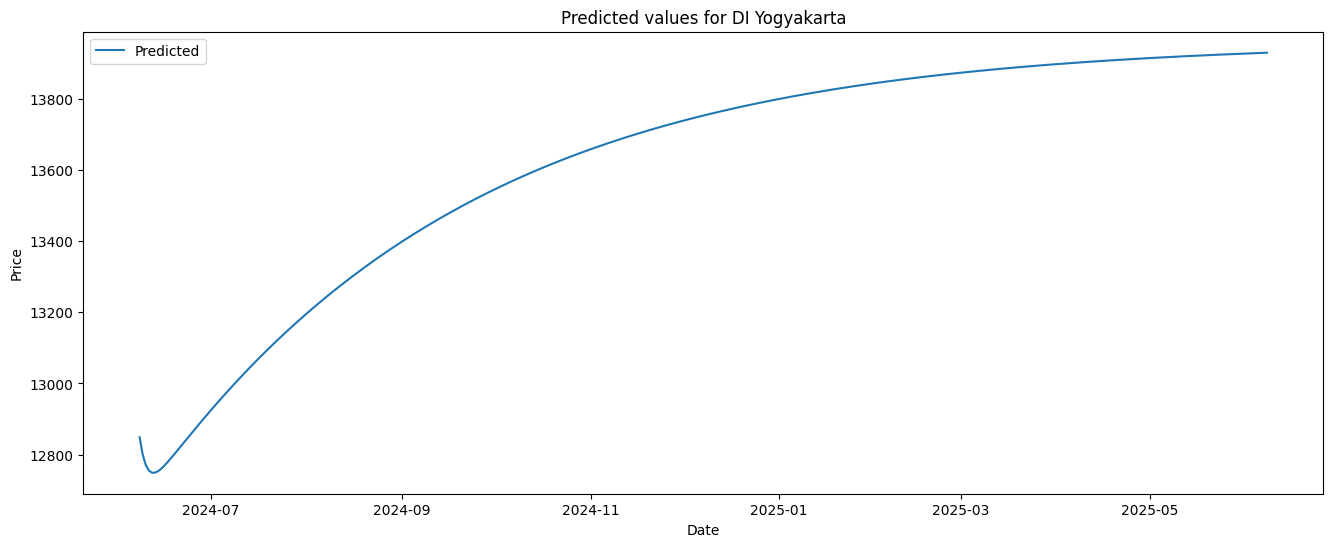

1/1 [==============================] - 0s 40ms/step
Predicted values for Jawa Timur:


Jawa Timur
2024-06-08  11510.833984
2024-06-09  11509.626953
2024-06-10  11513.578125
2024-06-11  11521.078125
2024-06-12  11530.954102
...                  ...
2025-06-04  13001.472656
2025-06-05  13001.890625
2025-06-06  13002.302734
2025-06-07  13002.709961
2025-06-08  13003.114258

[366 rows x 1 columns]

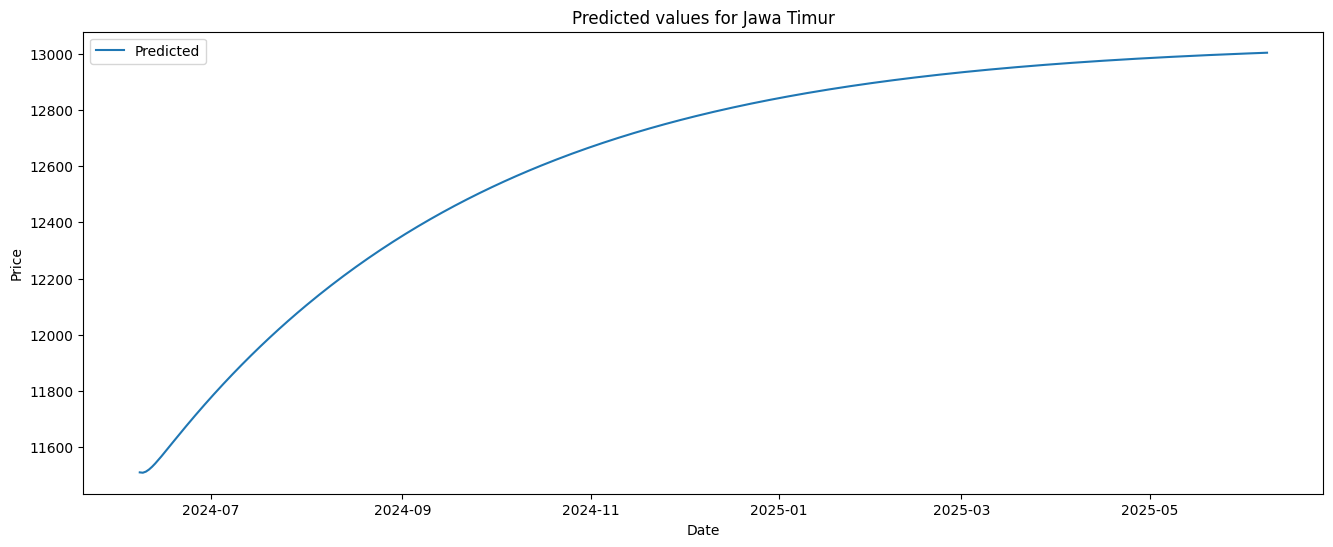

1/1 [==============================] - 0s 32ms/step
Predicted values for Bali:


Bali
2024-06-08  12904.632812
2024-06-09  12897.469727
2024-06-10  12895.733398
2024-06-11  12897.748047
2024-06-12  12902.292969
...                  ...
2025-06-04  13851.681641
2025-06-05  13851.943359
2025-06-06  13852.201172
2025-06-07  13852.458984
2025-06-08  13852.712891

[366 rows x 1 columns]

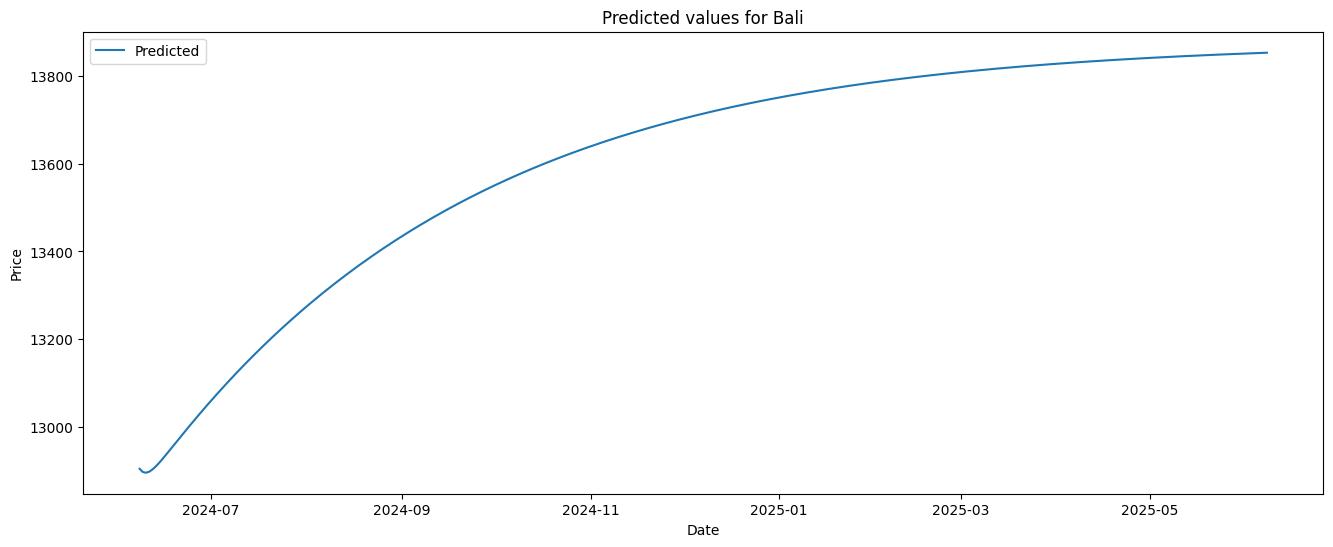

1/1 [==============================] - 0s 31ms/step
Predicted values for Nusa Tenggara Barat:


Nusa Tenggara Barat
2024-06-08          7059.622070
2024-06-09          7085.045410
2024-06-10          7104.270996
2024-06-11          7119.241699
2024-06-12          7131.339355
...                         ...
2025-06-04          7820.654297
2025-06-05          7820.839844
2025-06-06          7821.021973
2025-06-07          7821.202148
2025-06-08          7821.381348

[366 rows x 1 columns]

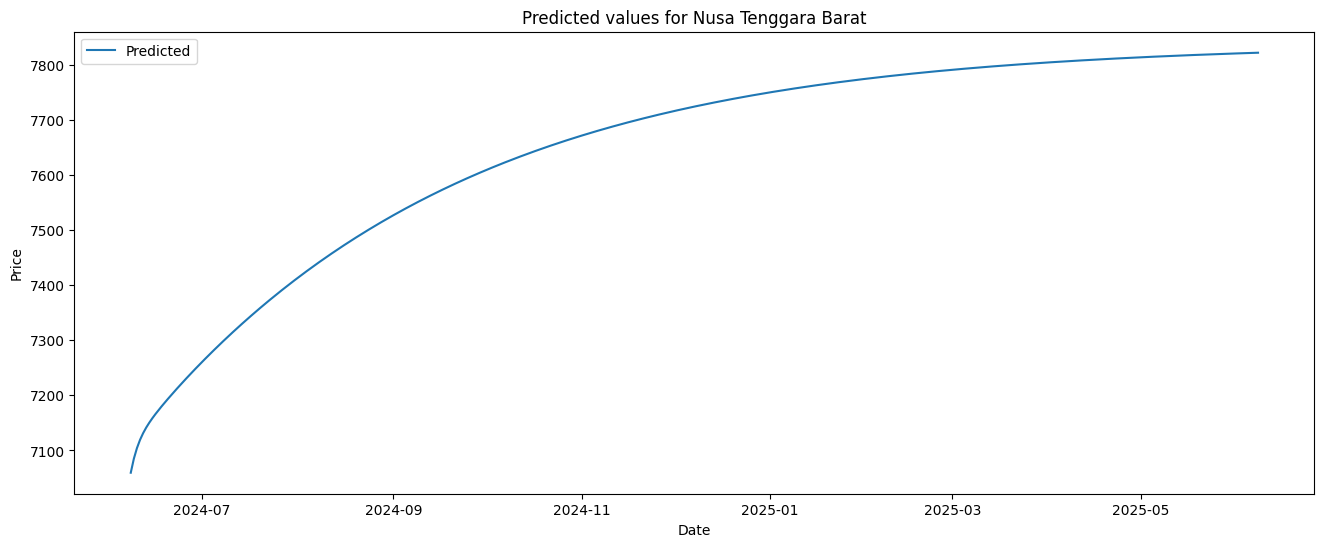

1/1 [==============================] - 0s 36ms/step
Predicted values for Nusa Tenggara Timur:


Nusa Tenggara Timur
2024-06-08         10655.530273
2024-06-09         10656.391602
2024-06-10         10657.816406
2024-06-11         10659.630859
2024-06-12         10661.702148
...                         ...
2025-06-04         10910.235352
2025-06-05         10910.298828
2025-06-06         10910.362305
2025-06-07         10910.422852
2025-06-08         10910.485352

[366 rows x 1 columns]

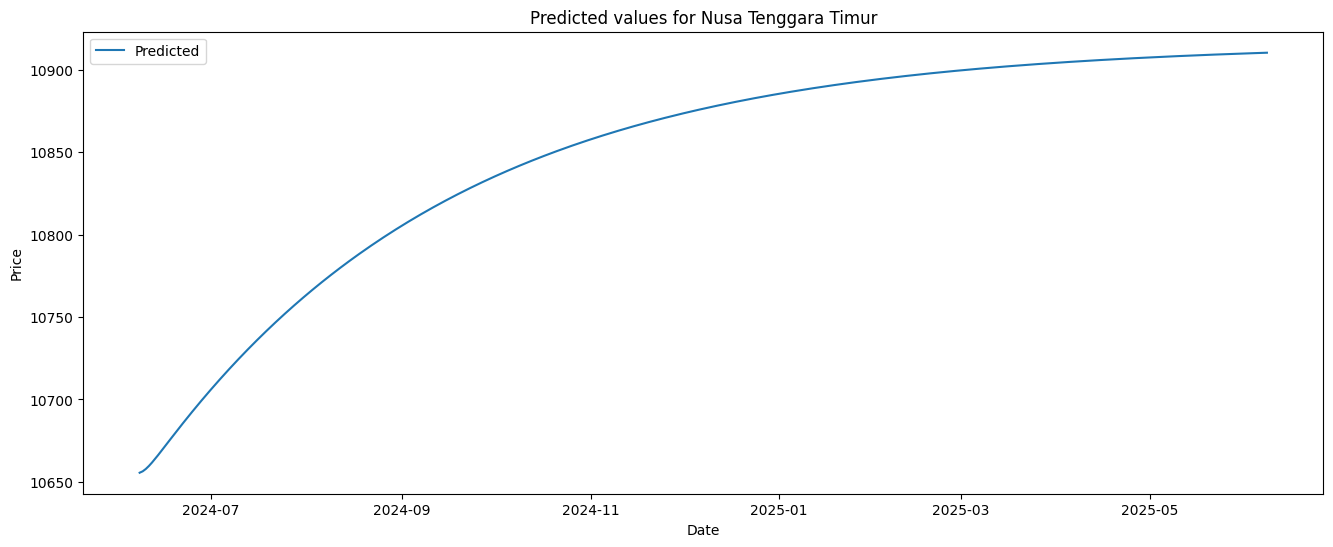

1/1 [==============================] - 0s 29ms/step
Predicted values for Kalimantan Selatan:


Kalimantan Selatan
2024-06-08        19064.777344
2024-06-09        19067.326172
2024-06-10        19071.652344
2024-06-11        19077.203125
2024-06-12        19083.572266
...                        ...
2025-06-04        19895.082031
2025-06-05        19895.304688
2025-06-06        19895.527344
2025-06-07        19895.744141
2025-06-08        19895.958984

[366 rows x 1 columns]

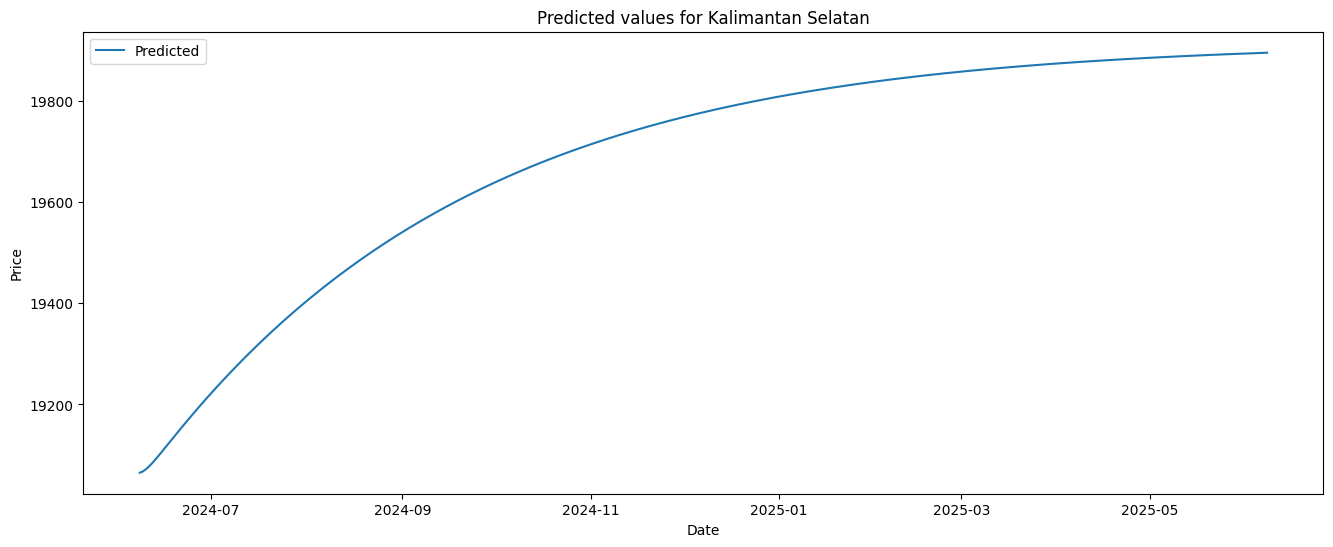

1/1 [==============================] - 0s 32ms/step
Predicted values for Kalimantan Tengah:


Kalimantan Tengah
2024-06-08       13367.883789
2024-06-09       13350.360352
2024-06-10       13338.358398
2024-06-11       13330.174805
2024-06-12       13324.579102
...                       ...
2025-06-04       13257.208008
2025-06-05       13257.194336
2025-06-06       13257.179688
2025-06-07       13257.166016
2025-06-08       13257.153320

[366 rows x 1 columns]

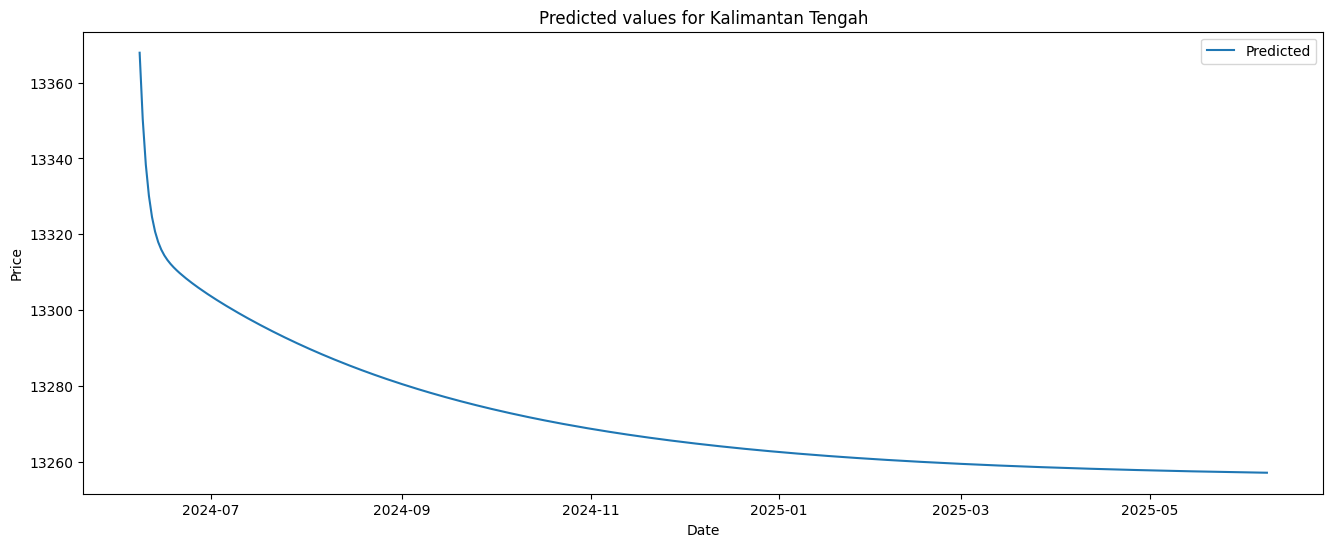

1/1 [==============================] - 0s 28ms/step
Predicted values for Kalimantan Timur:


Kalimantan Timur
2024-06-08      13812.045898
2024-06-09      13791.173828
2024-06-10      13775.646484
2024-06-11      13763.843750
2024-06-12      13754.580078
...                      ...
2025-06-04      13368.082031
2025-06-05      13367.998047
2025-06-06      13367.913086
2025-06-07      13367.830078
2025-06-08      13367.749023

[366 rows x 1 columns]

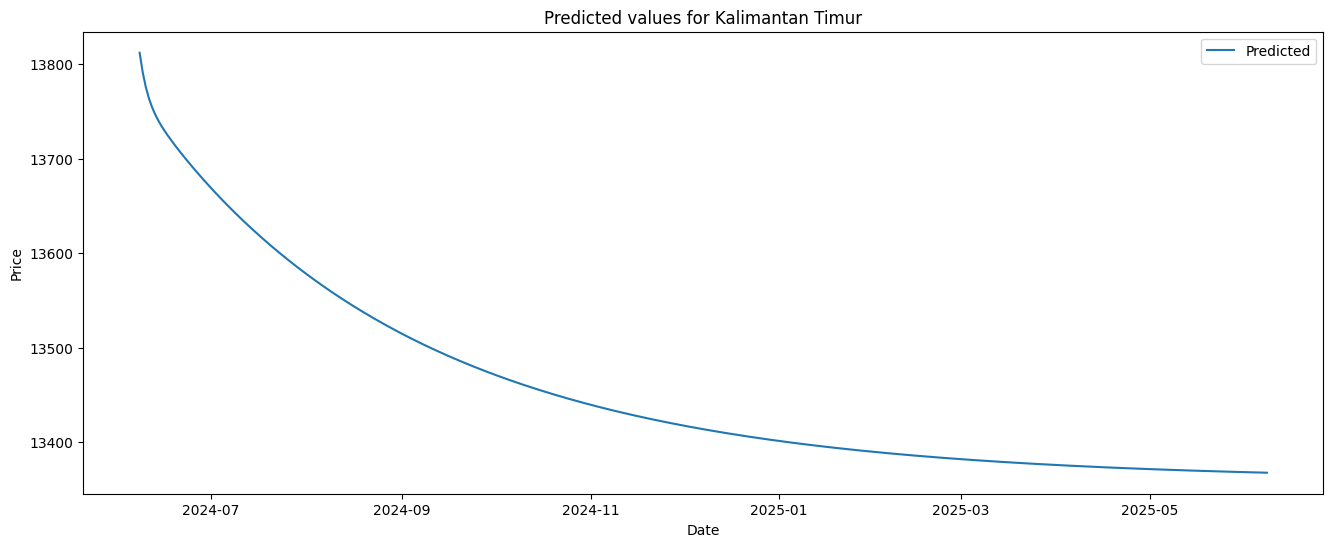

1/1 [==============================] - 0s 55ms/step
Predicted values for Kalimantan Utara:


Kalimantan Utara
2024-06-08      14959.517578
2024-06-09      14957.937500
2024-06-10      14955.375977
2024-06-11      14952.144531
2024-06-12      14948.471680
...                      ...
2025-06-04      14560.050781
2025-06-05      14559.962891
2025-06-06      14559.875977
2025-06-07      14559.789062
2025-06-08      14559.704102

[366 rows x 1 columns]

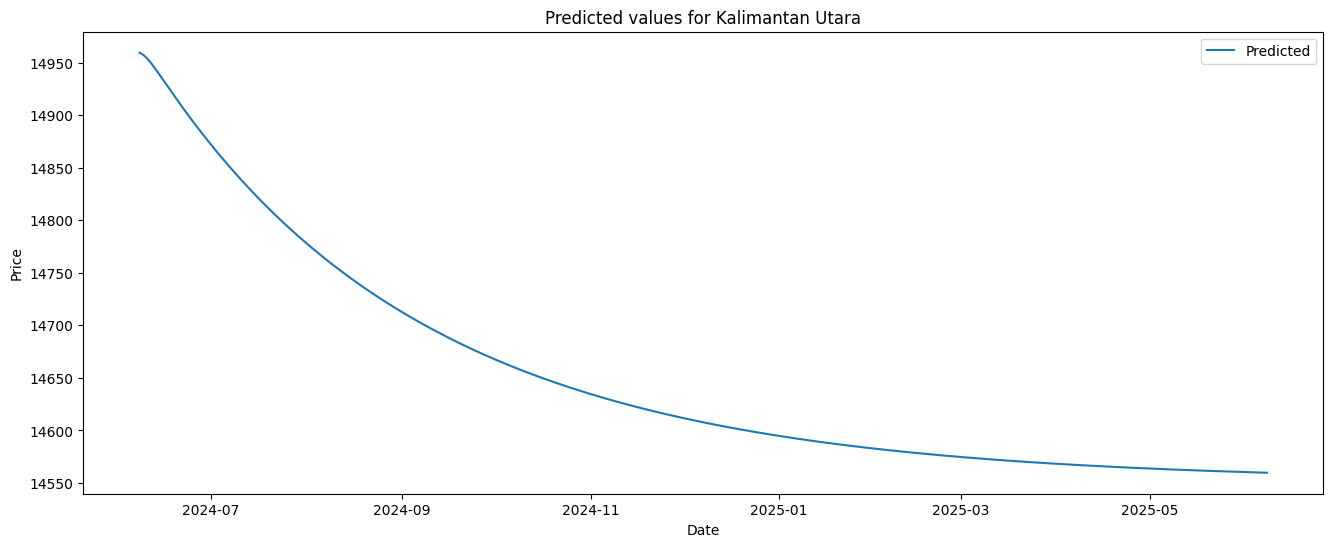

1/1 [==============================] - 0s 32ms/step
Predicted values for Gorontalo:


Gorontalo
2024-06-08  12816.427734
2024-06-09  12795.320312
2024-06-10  12785.831055
2024-06-11  12784.299805
2024-06-12  12788.110352
...                  ...
2025-06-04  14209.291016
2025-06-05  14209.690430
2025-06-06  14210.086914
2025-06-07  14210.476562
2025-06-08  14210.864258

[366 rows x 1 columns]

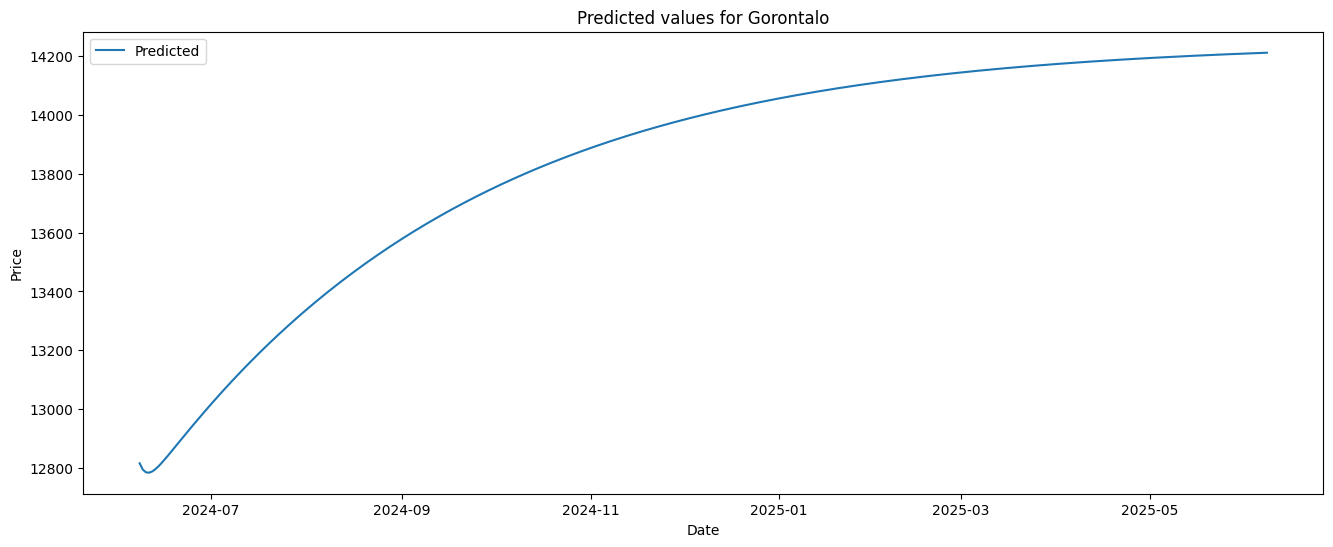

1/1 [==============================] - 0s 46ms/step
Predicted values for Sulawesi Selatan:


Sulawesi Selatan
2024-06-08      13701.061523
2024-06-09      13685.251953
2024-06-10      13672.581055
2024-06-11      13662.101562
2024-06-12      13653.128906
...                      ...
2025-06-04      13120.159180
2025-06-05      13120.040039
2025-06-06      13119.921875
2025-06-07      13119.805664
2025-06-08      13119.689453

[366 rows x 1 columns]

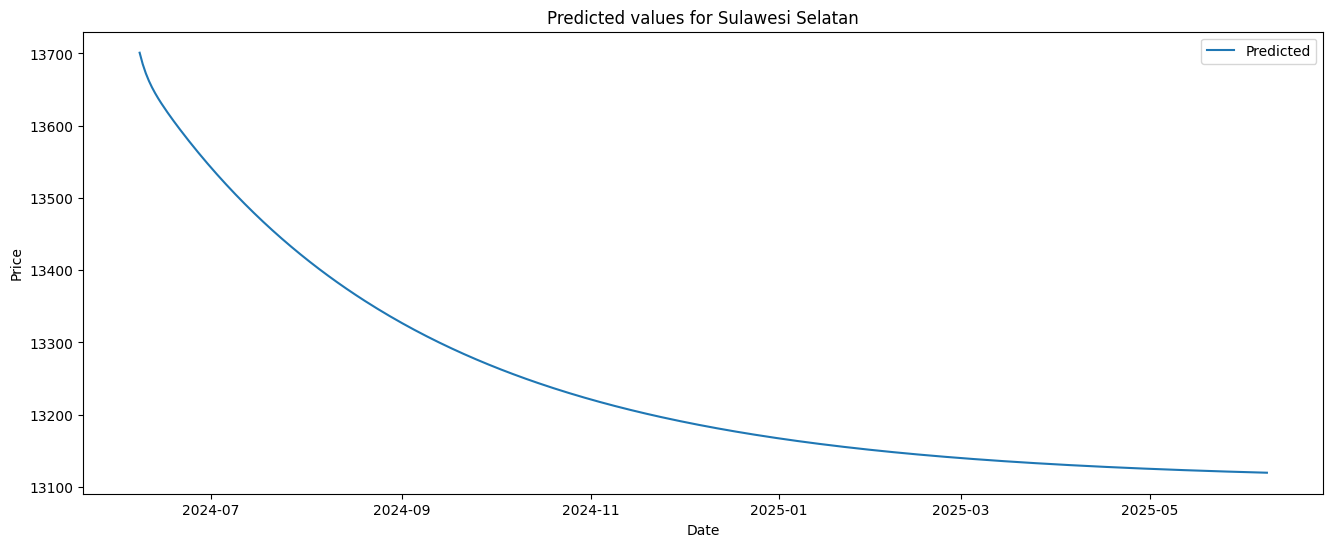

1/1 [==============================] - 0s 35ms/step
Predicted values for Sulawesi Tenggara:


Sulawesi Tenggara
2024-06-08       13224.926758
2024-06-09       13182.003906
2024-06-10       13154.620117
2024-06-11       13138.008789
2024-06-12       13128.707031
...                       ...
2025-06-04       13565.163086
2025-06-05       13565.284180
2025-06-06       13565.403320
2025-06-07       13565.520508
2025-06-08       13565.638672

[366 rows x 1 columns]

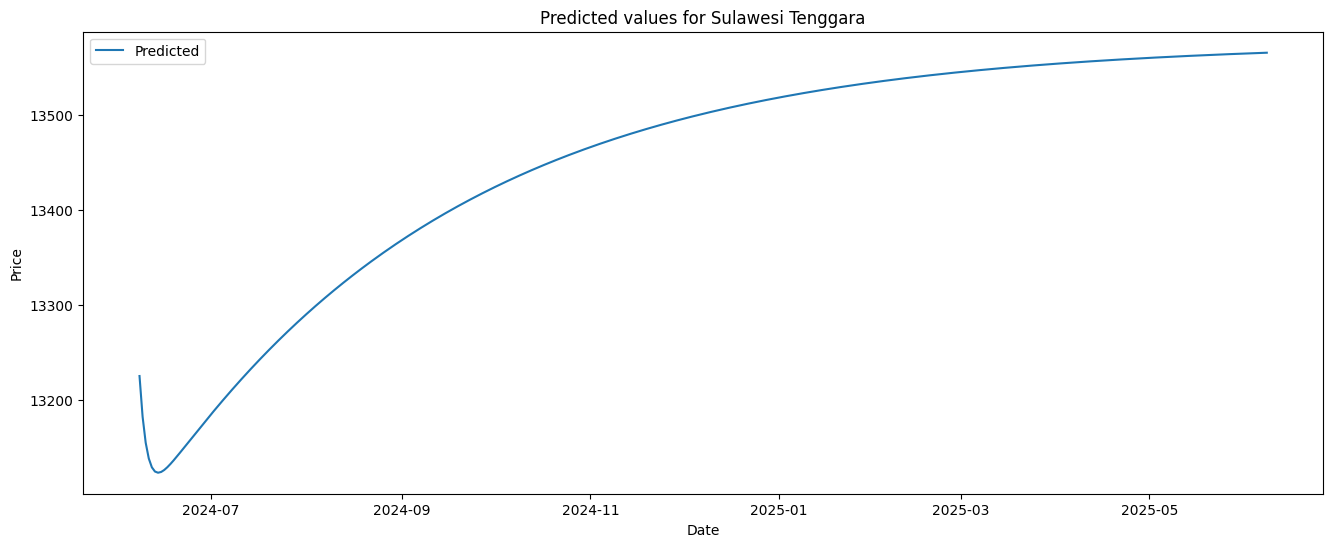

1/1 [==============================] - 0s 28ms/step
Predicted values for Sulawesi Tengah:


Sulawesi Tengah
2024-06-08     10993.660156
2024-06-09     10992.060547
2024-06-10     10993.530273
2024-06-11     10997.119141
2024-06-12     11002.133789
...                     ...
2025-06-04     11787.552734
2025-06-05     11787.766602
2025-06-06     11787.977539
2025-06-07     11788.187500
2025-06-08     11788.394531

[366 rows x 1 columns]

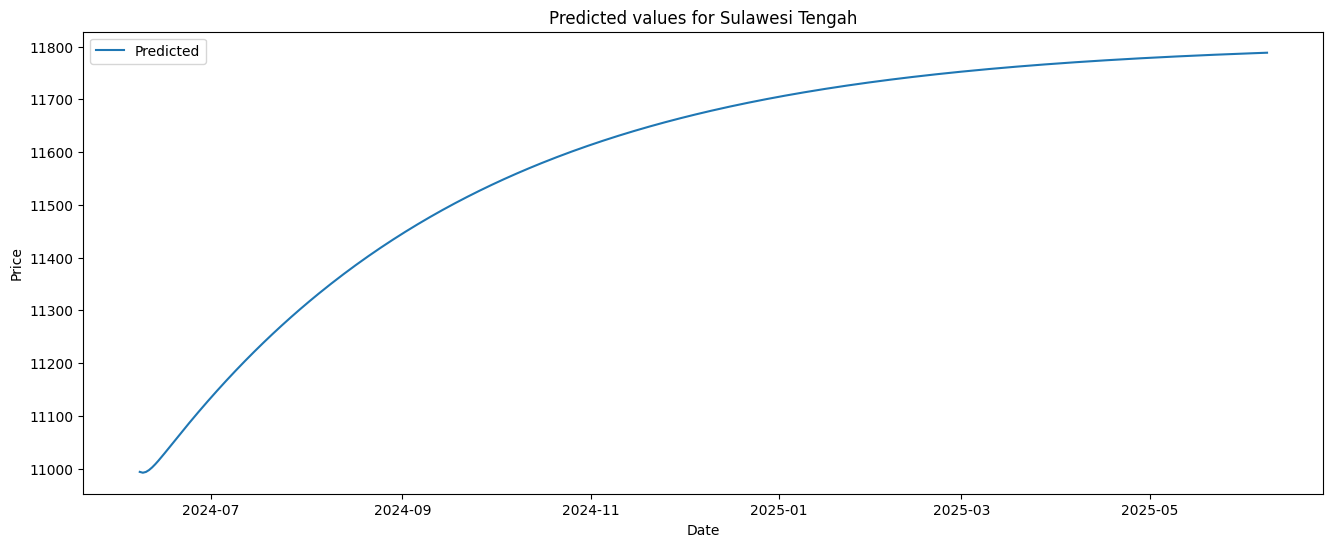

1/1 [==============================] - 0s 68ms/step
Predicted values for Sulawesi Utara:


Sulawesi Utara
2024-06-08    12689.648438
2024-06-09    12699.151367
2024-06-10    12709.000000
2024-06-11    12719.076172
2024-06-12    12729.286133
...                    ...
2025-06-04    13807.688477
2025-06-05    13807.986328
2025-06-06    13808.280273
2025-06-07    13808.571289
2025-06-08    13808.859375

[366 rows x 1 columns]

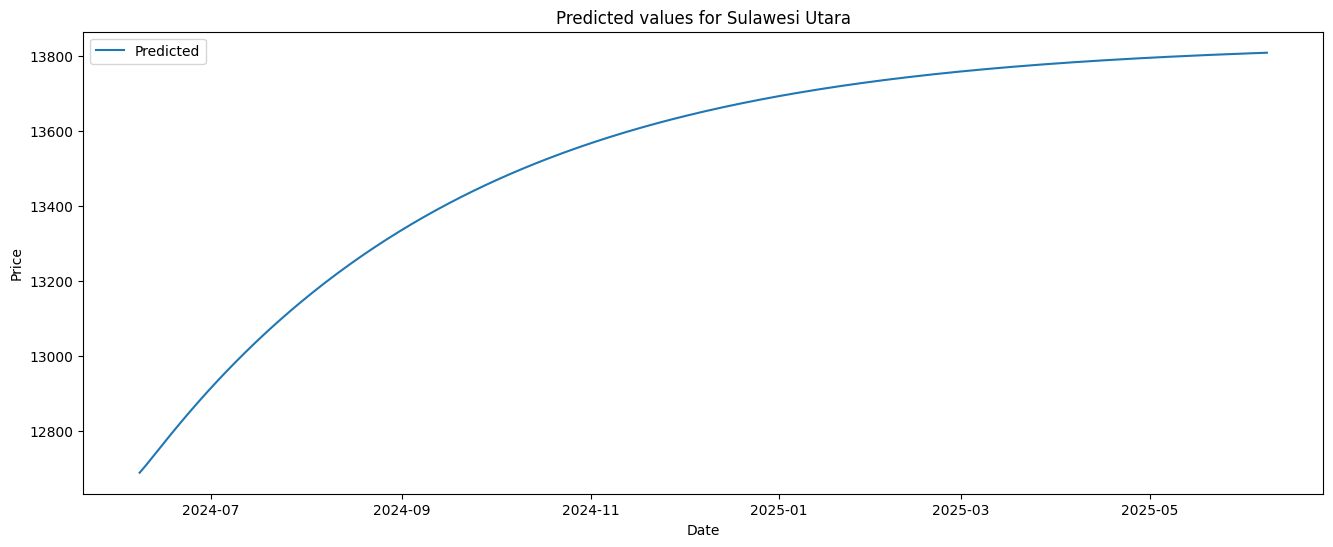

1/1 [==============================] - 0s 29ms/step
Predicted values for Sulawesi Barat:


Sulawesi Barat
2024-06-08    12885.742188
2024-06-09    12834.040039
2024-06-10    12798.883789
2024-06-11    12775.210938
2024-06-12    12759.344727
...                    ...
2025-06-04    12647.181641
2025-06-05    12647.161133
2025-06-06    12647.142578
2025-06-07    12647.122070
2025-06-08    12647.103516

[366 rows x 1 columns]

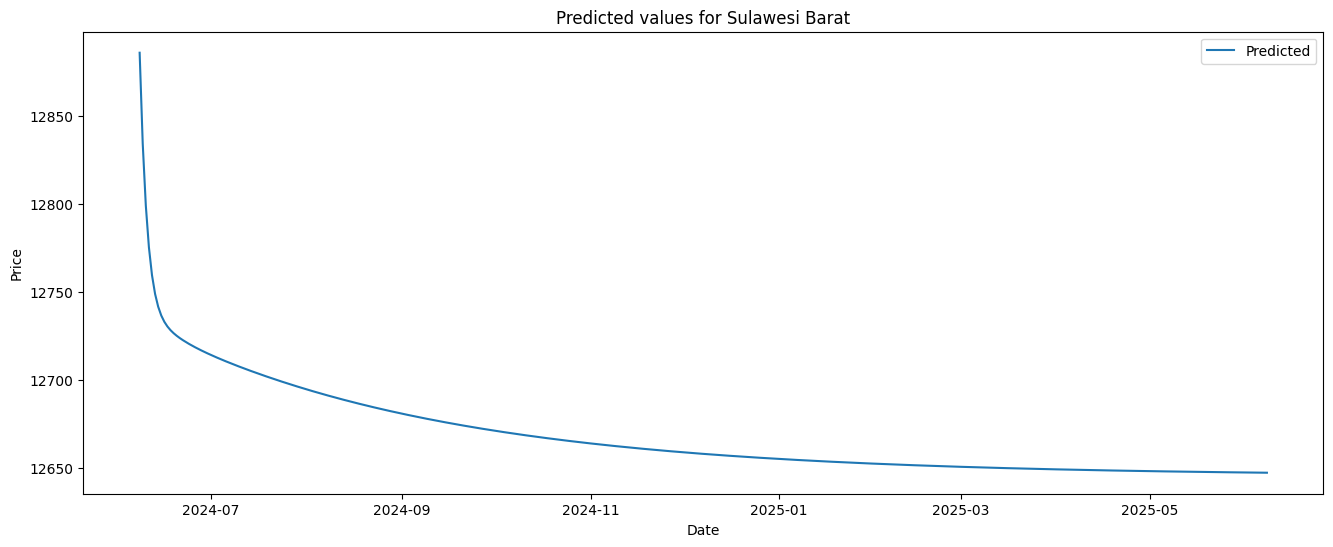

1/1 [==============================] - 0s 27ms/step
Predicted values for Papua:


Papua
2024-06-08  13190.670898
2024-06-09  13202.030273
2024-06-10  13207.629883
2024-06-11  13209.250000
2024-06-12  13208.195312
...                  ...
2025-06-04  12723.125977
2025-06-05  12723.022461
2025-06-06  12722.918945
2025-06-07  12722.817383
2025-06-08  12722.715820

[366 rows x 1 columns]

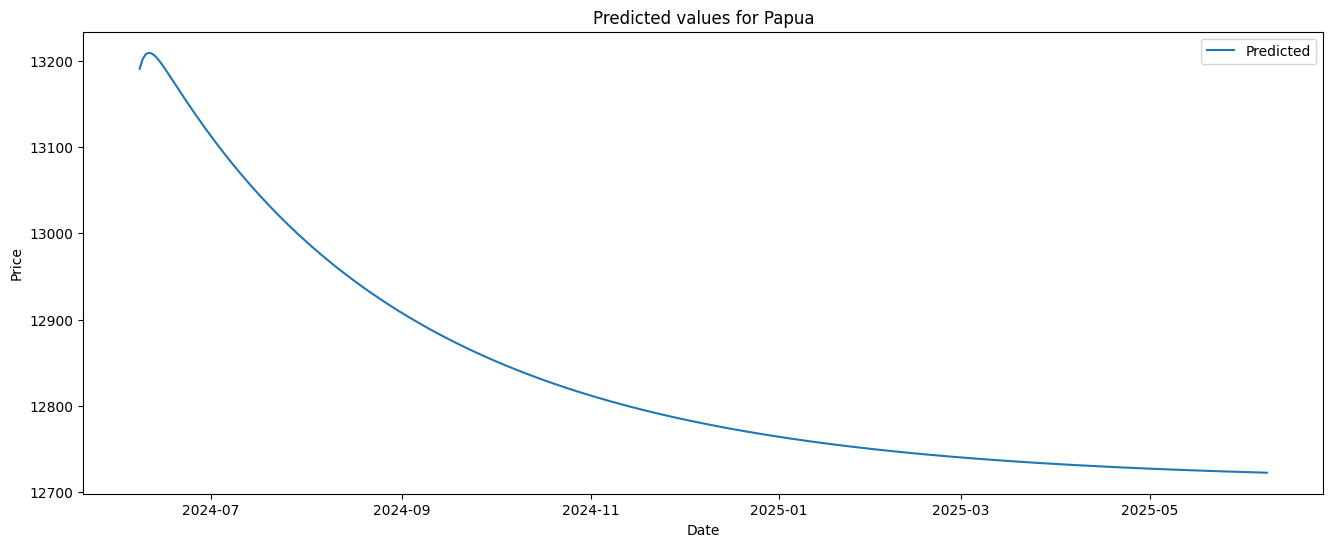

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Buat prediksi dari start_date = '2024-06-08' sampai end_date = '2024-07-07'
start_date = '2024-06-08'
end_date = '2025-06-08'

# Pastikan df memiliki index dalam bentuk datetime
df.index = pd.to_datetime(df.index)

# Durasi hari prediksi
prediction_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Buat DataFrame untuk menampung hasil prediksi
future_dates = pd.date_range(start=start_date, periods=prediction_days, freq='D')
future_predictions = pd.DataFrame(index=future_dates)

for column in column_names:
    # Normalisasi data
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_normalized = scaler.fit_transform(df[[column]].values)

    # Buat sequences untuk prediksi
    X_future = []
    for i in range(len(df_normalized) - 60, len(df_normalized)):
        X_future.append(df_normalized[i-60:i, 0])

    # Konversi list ke numpy array
    X_future = np.array(X_future)

    # Reshape X_future agar sesuai dengan input model
    X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

    # Inisialisasi list untuk menampung hasil prediksi
    predictions = []

    # Buat prediksi hari ke hari
    for _ in range(prediction_days):
        predicted_value = model.predict(X_future[-1].reshape(1, 60, 1))
        predictions.append(predicted_value[0, 0])

        # Update X_future dengan prediksi baru
        new_data = np.append(X_future[-1, 1:, 0], predicted_value[0, 0])
        X_future = np.append(X_future, new_data.reshape(1, 60, 1), axis=0)

    # Transformasi kembali prediksi ke skala asli
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)

    # Tambahkan prediksi ke DataFrame
    future_predictions[column] = predictions.flatten()

    # Tampilkan prediksi
    print(f"Predicted values for {column}:")
    display(future_predictions[[column]])

    # Plot prediksi
    plt.figure(figsize=(16, 6))
    plt.plot(future_predictions.index, future_predictions[column], label='Predicted')
    plt.title(f'Predicted values for {column}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [ ]:
pip install minisom

                     2024-06-08 00:00:00  2024-06-09 00:00:00  \
Aceh                        14233.299805         14289.052734   
Sumatera Utara              12795.643555         12813.555664   
Sumatera Barat              16421.810547         16426.798828   
Riau                         7046.110352          7045.962402   
Jambi                       14925.286133         14928.583984   
Bengkulu                    11720.263672         11708.392578   
Sumatera Selatan             9386.829102          9393.848633   
Lampung                     10697.342773         10704.875977   
Banten                      12461.527344         12406.737305   
Jawa Barat                  12913.771484         12894.410156   
Jawa Tengah                 12297.910156         12294.205078   
DI Yogyakarta               12848.753906         12799.604492   
Jawa Timur                  11510.833984         11509.626953   
Bali                        12904.632812         12897.469727   
Nusa Tenggara Barat      

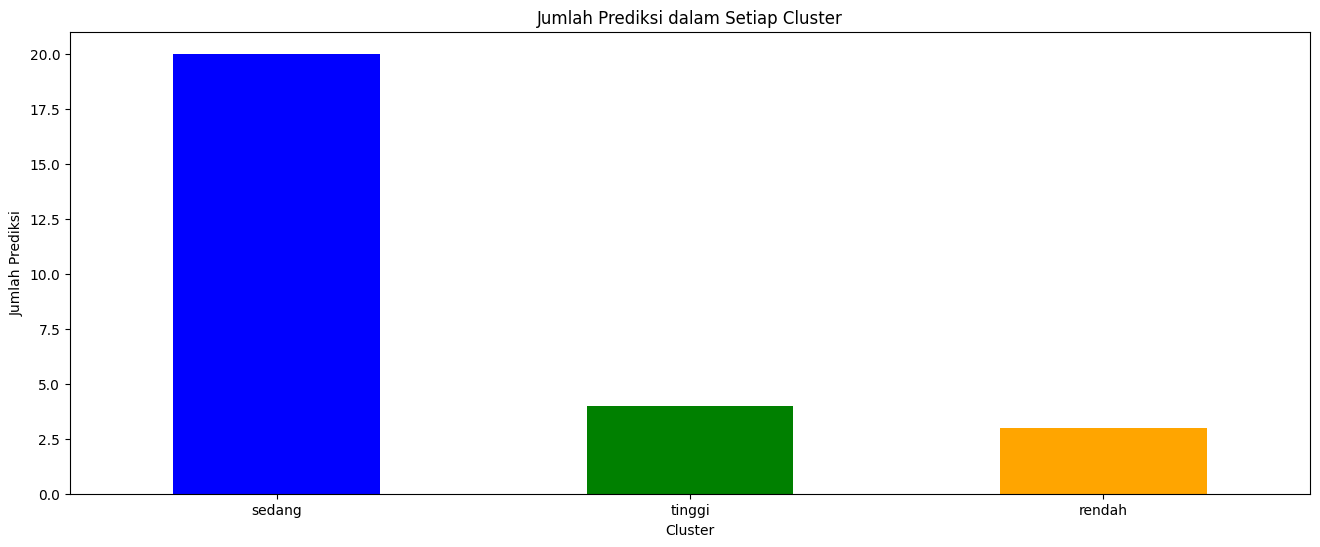

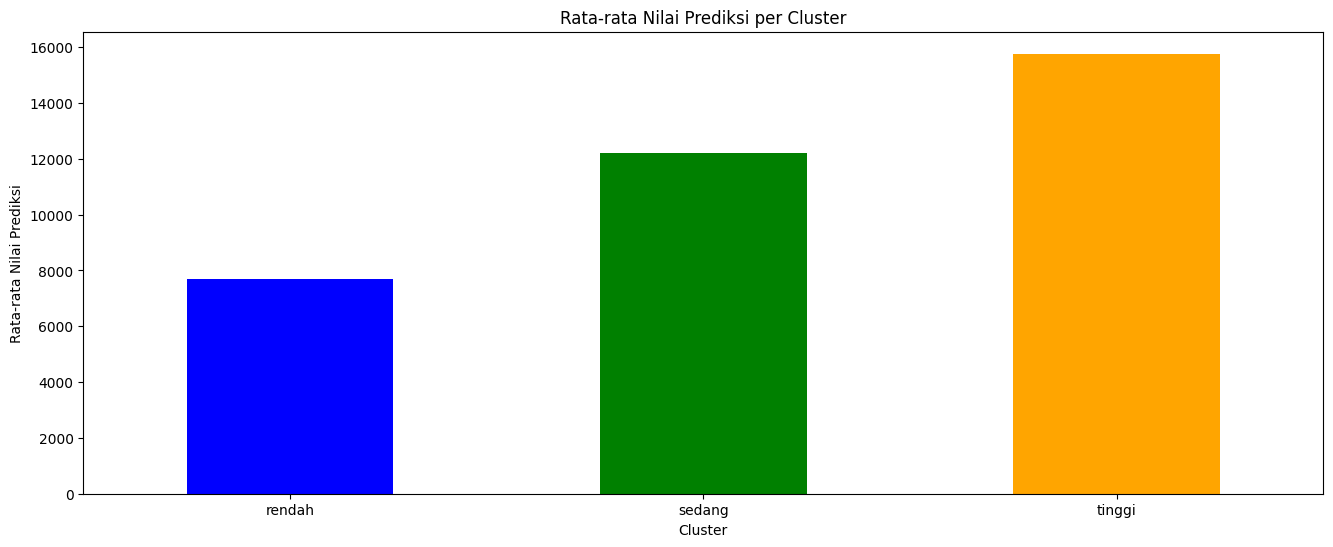

In [ ]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# Asumsi: predictions_30_days adalah DataFrame yang berisi hasil prediksi 30 hari ke depan untuk setiap kolom
predictions_30_days = future_predictions.copy()

# Normalisasi data prediksi untuk clustering
scaler = StandardScaler()
normalized_predictions = scaler.fit_transform(predictions_30_days.T)

# Tentukan ukuran peta SOM (misalnya, 3x1 untuk 3 cluster)
som = MiniSom(x=3, y=1, input_len=normalized_predictions.shape[1], sigma=0.5, learning_rate=0.5)

# Inisialisasi bobot SOM
som.random_weights_init(normalized_predictions)

# Latih SOM
som.train_random(normalized_predictions, 100)

# Tentukan cluster untuk setiap data prediksi
cluster_indices = np.array([som.winner(x) for x in normalized_predictions])
cluster_labels = [i for i, j in cluster_indices]

# Mapping cluster labels to names
cluster_names = {0: 'tinggi', 1: 'rendah', 2: 'sedang'}

# Transpose hasil clustering dan tambahkan label cluster
transposed_predictions = predictions_30_days.T
transposed_predictions['Cluster'] = cluster_labels
transposed_predictions['Cluster_Name'] = transposed_predictions['Cluster'].map(cluster_names)

# Tampilkan hasil clustering ter-transpose
print(transposed_predictions)

# Visualisasi hasil clustering dengan bar chart
plt.figure(figsize=(16, 6))
cluster_counts = transposed_predictions['Cluster_Name'].value_counts()

# Buat bar chart
cluster_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Jumlah Prediksi dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Prediksi')
plt.xticks(rotation=0)
plt.show()

# Visualisasi rata-rata prediksi per cluster dengan bar chart
mean_predictions_per_cluster = transposed_predictions.groupby('Cluster_Name').mean()

plt.figure(figsize=(16, 6))
mean_predictions_per_cluster.mean(axis=1).plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Rata-rata Nilai Prediksi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Nilai Prediksi')
plt.xticks(rotation=0)
plt.show()


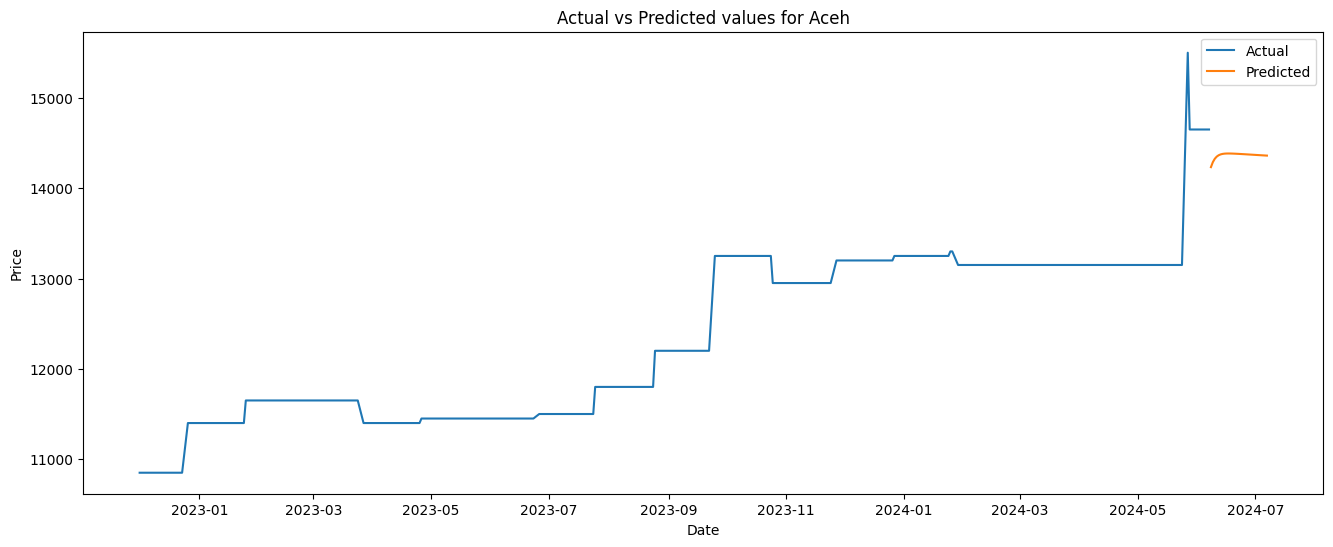

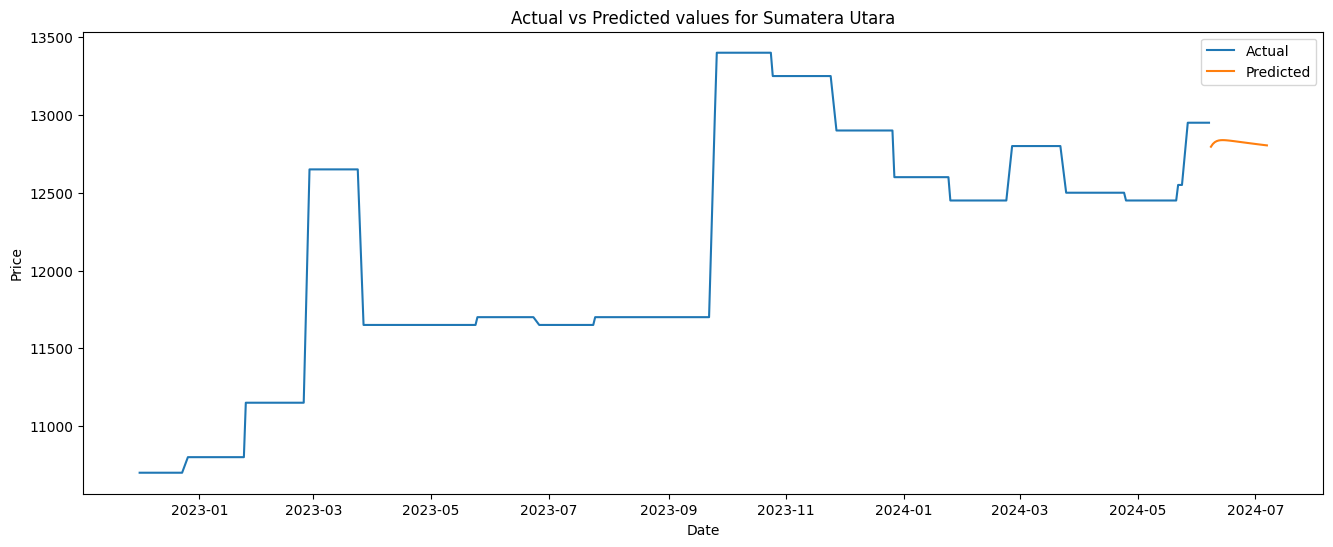

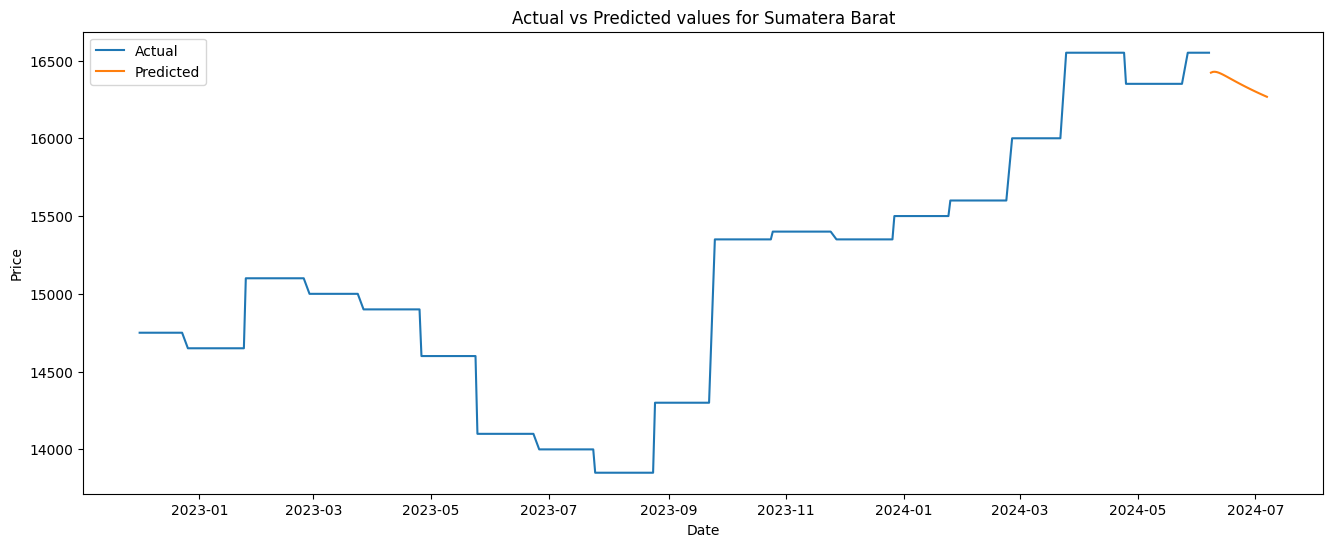

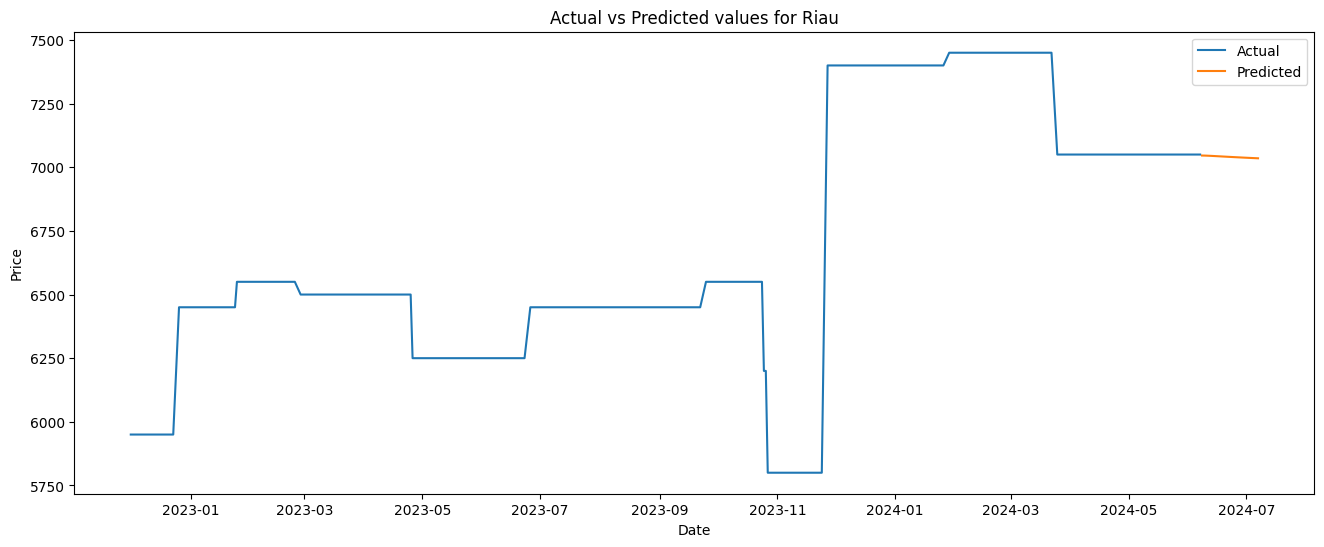

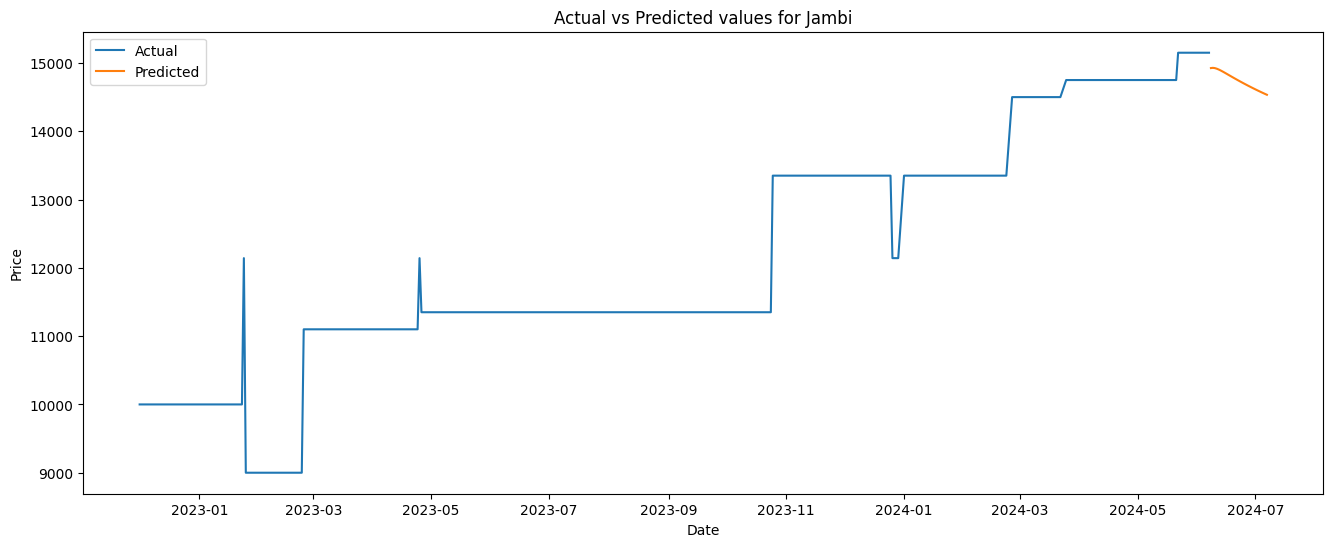

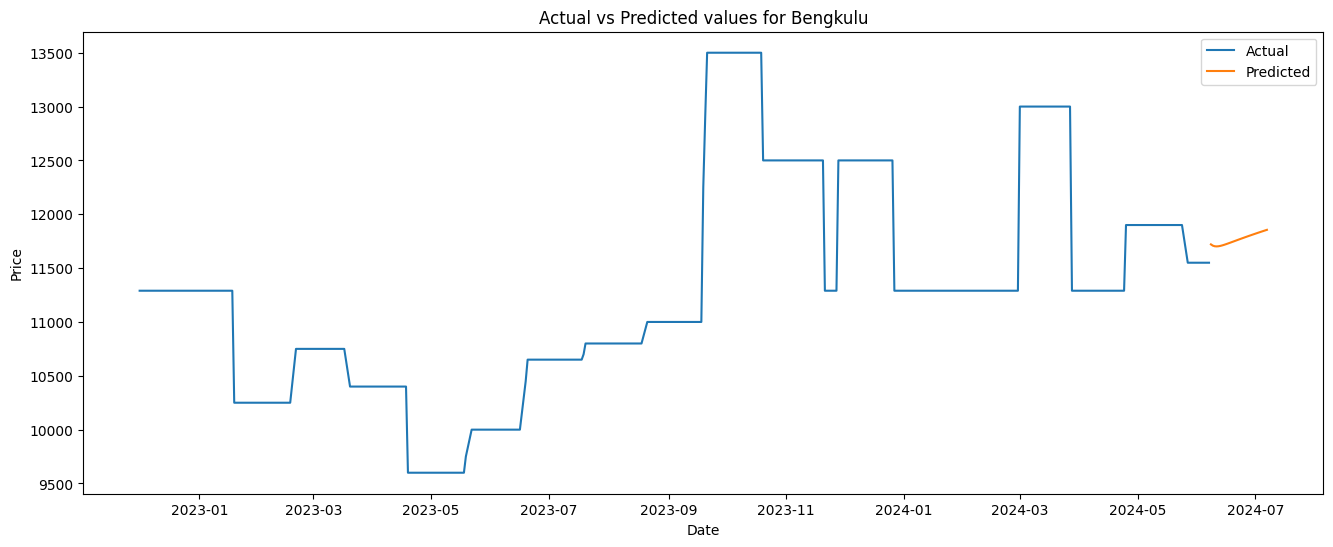

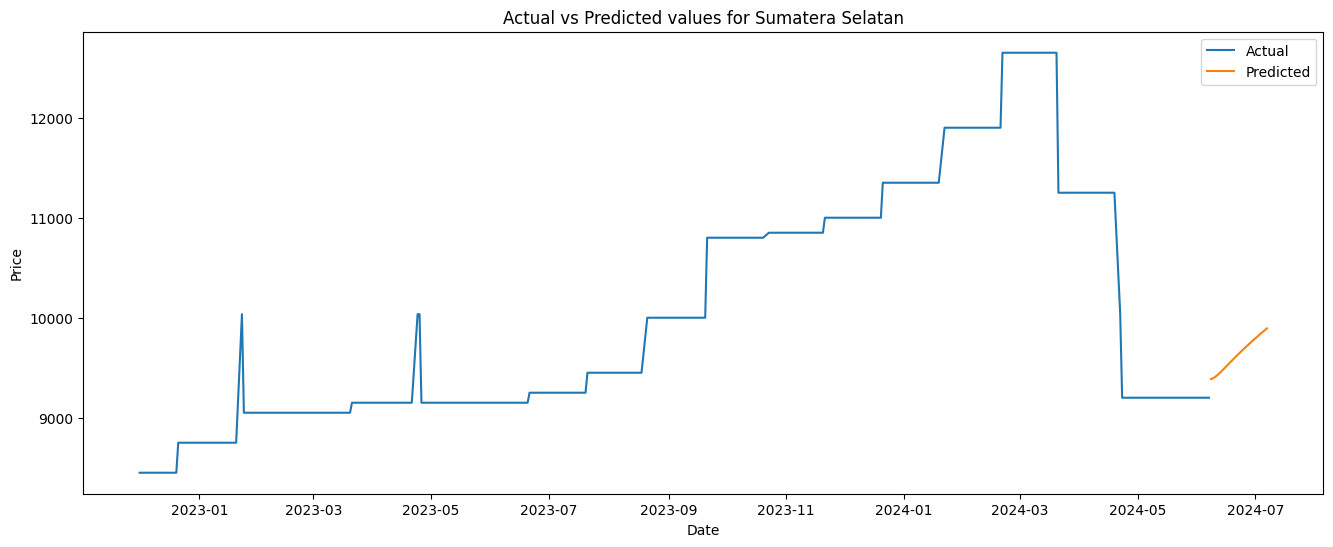

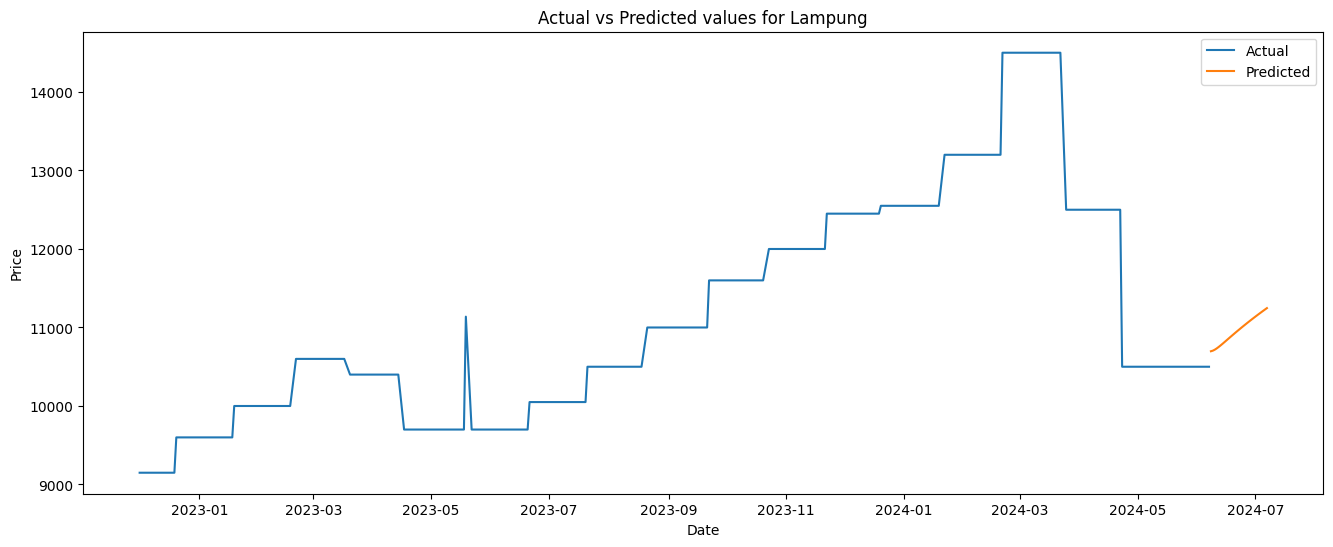

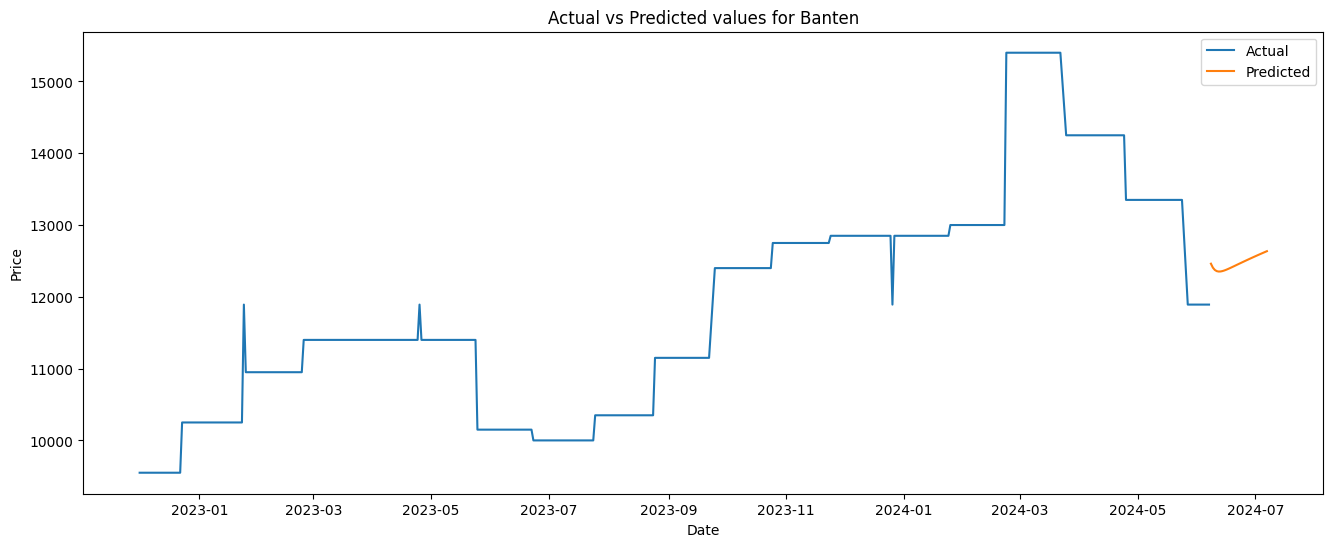

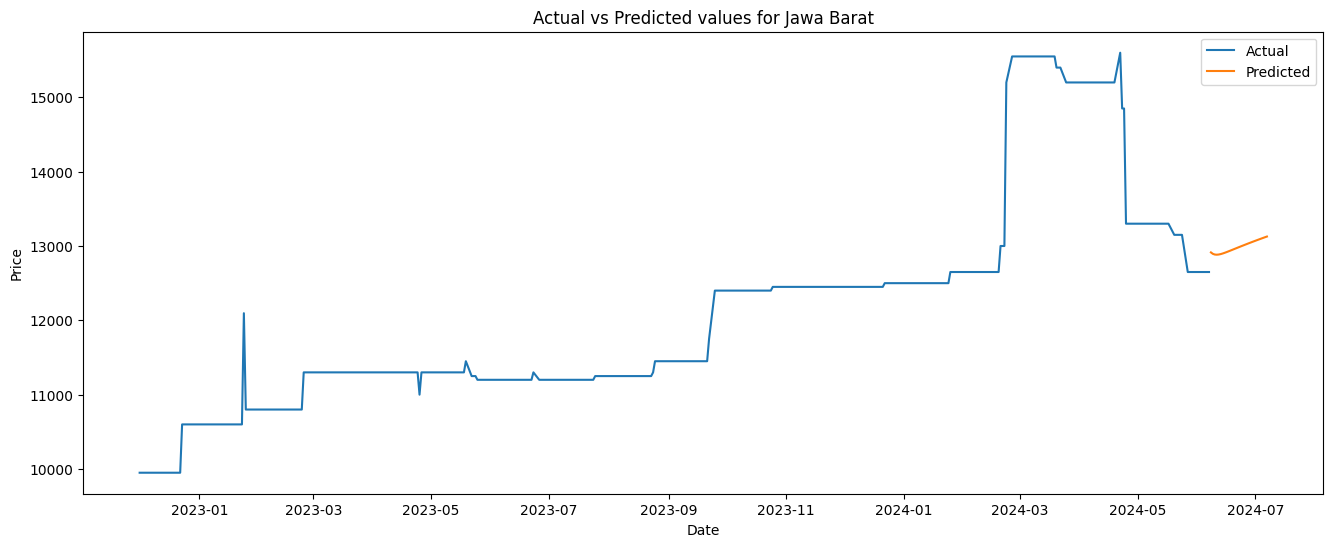

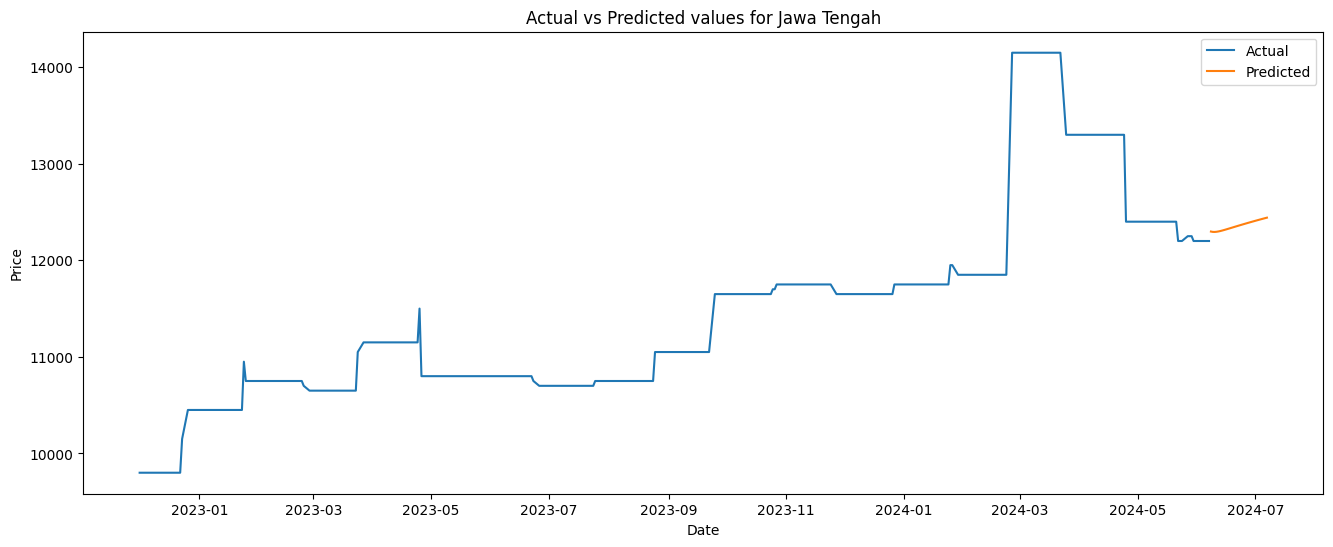

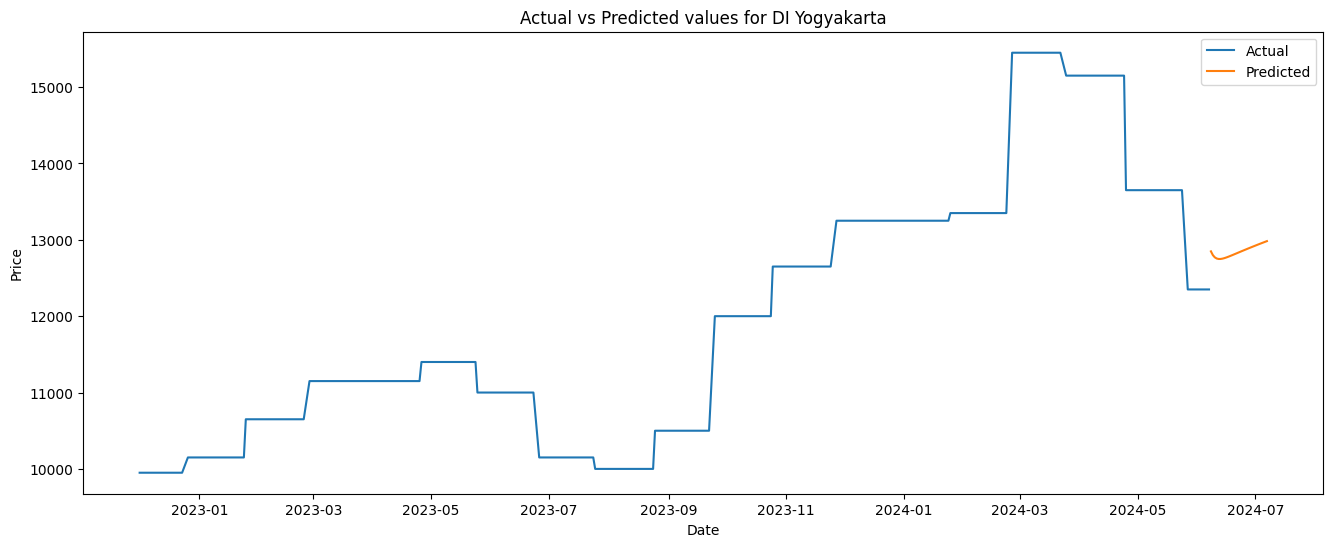

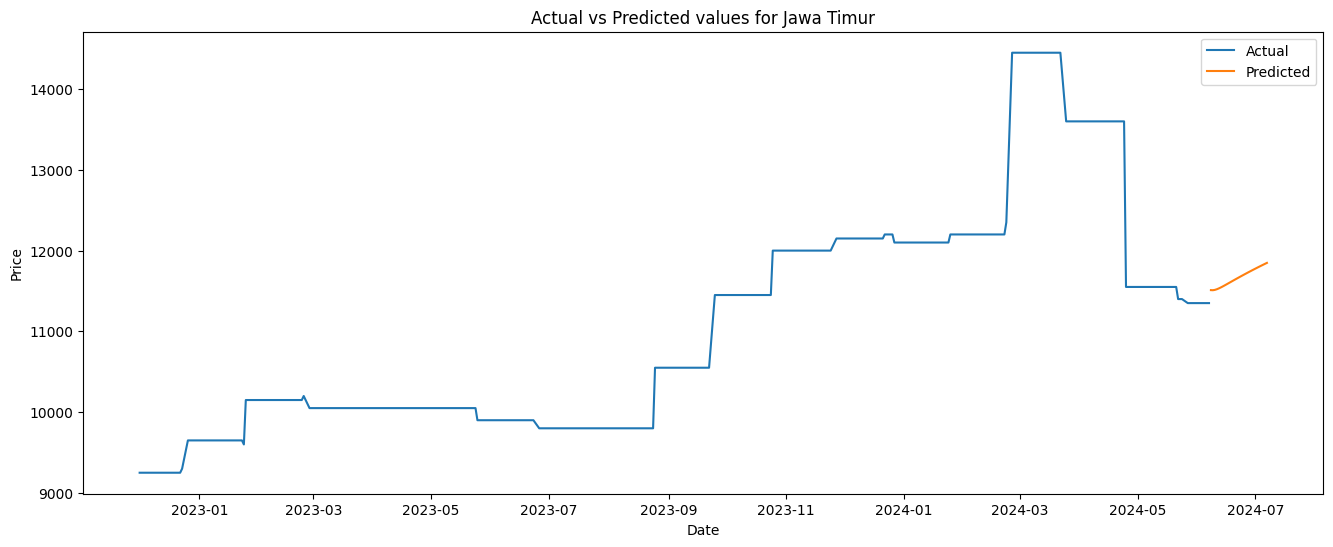

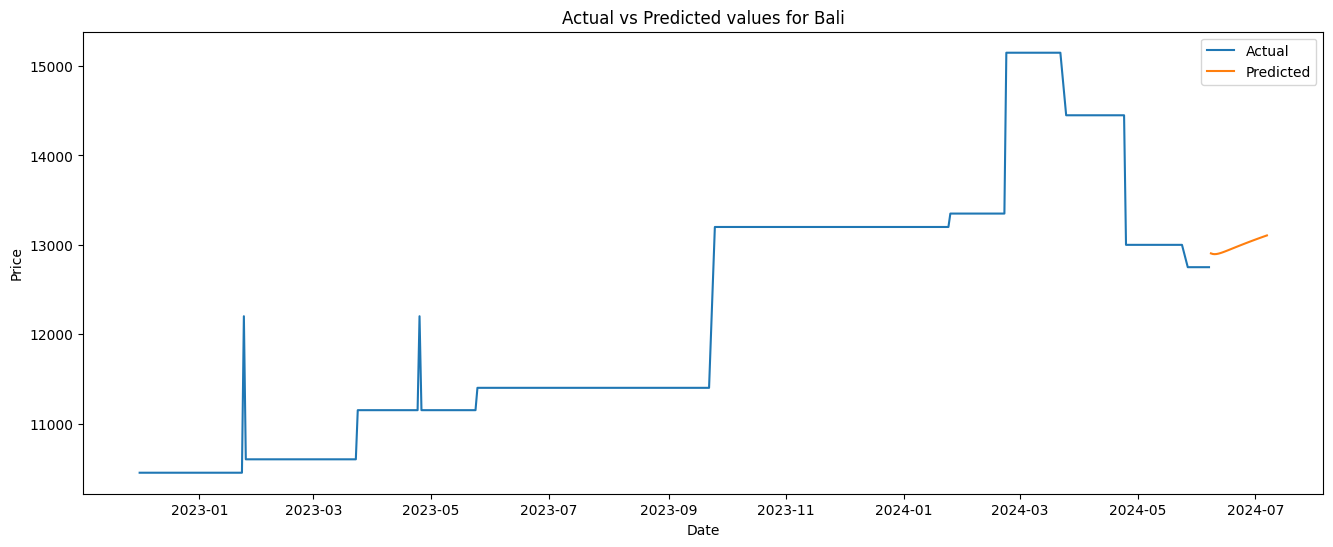

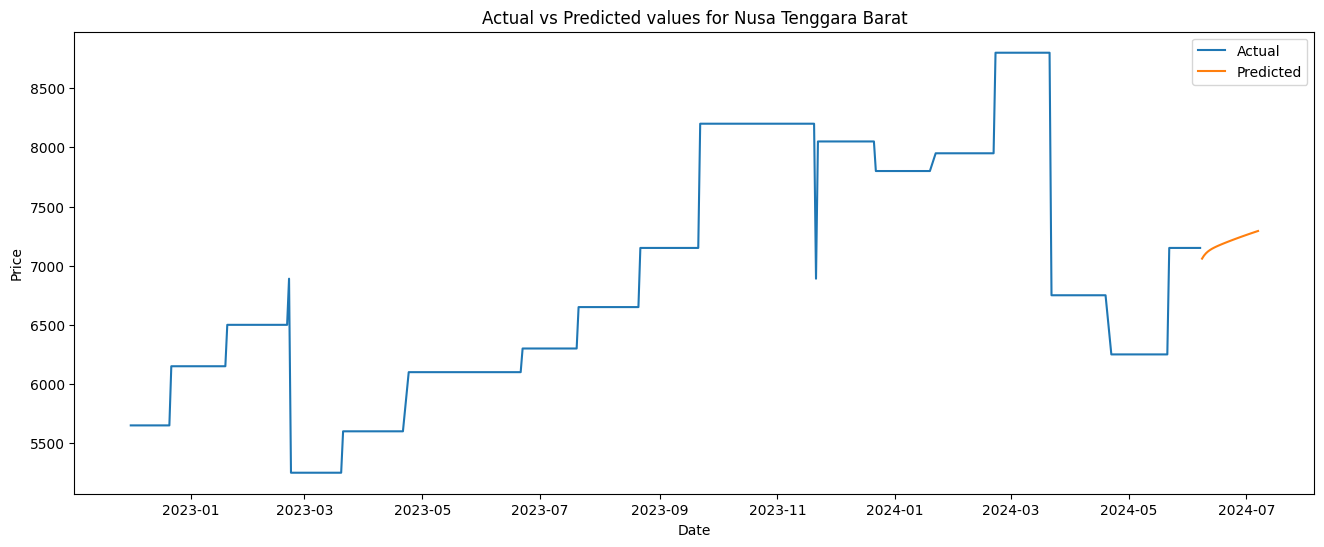

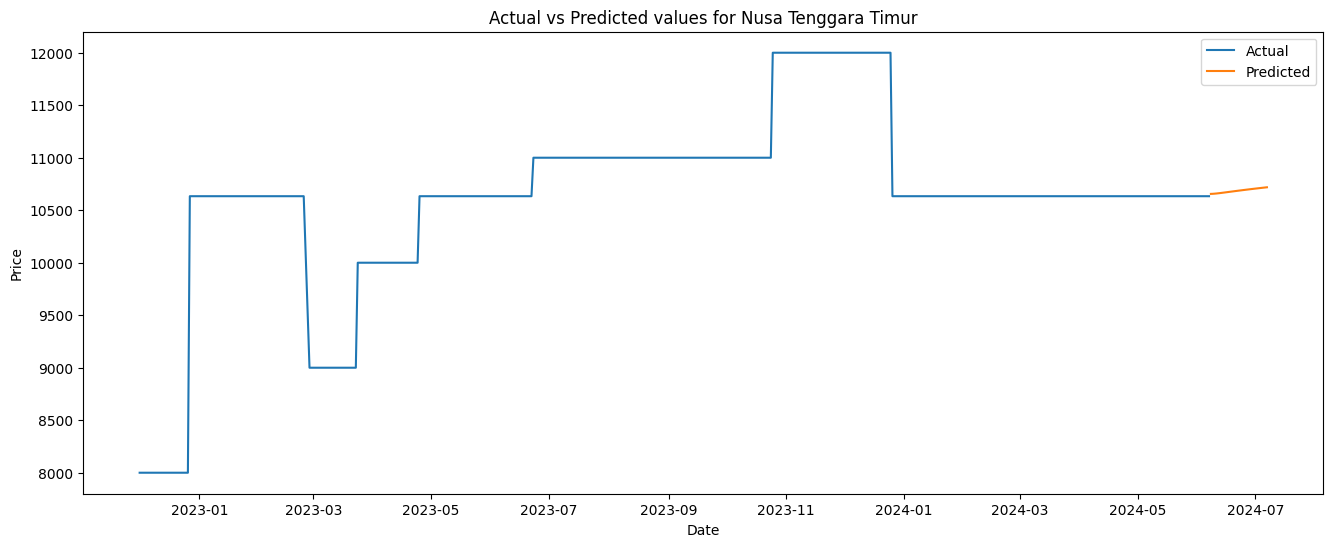

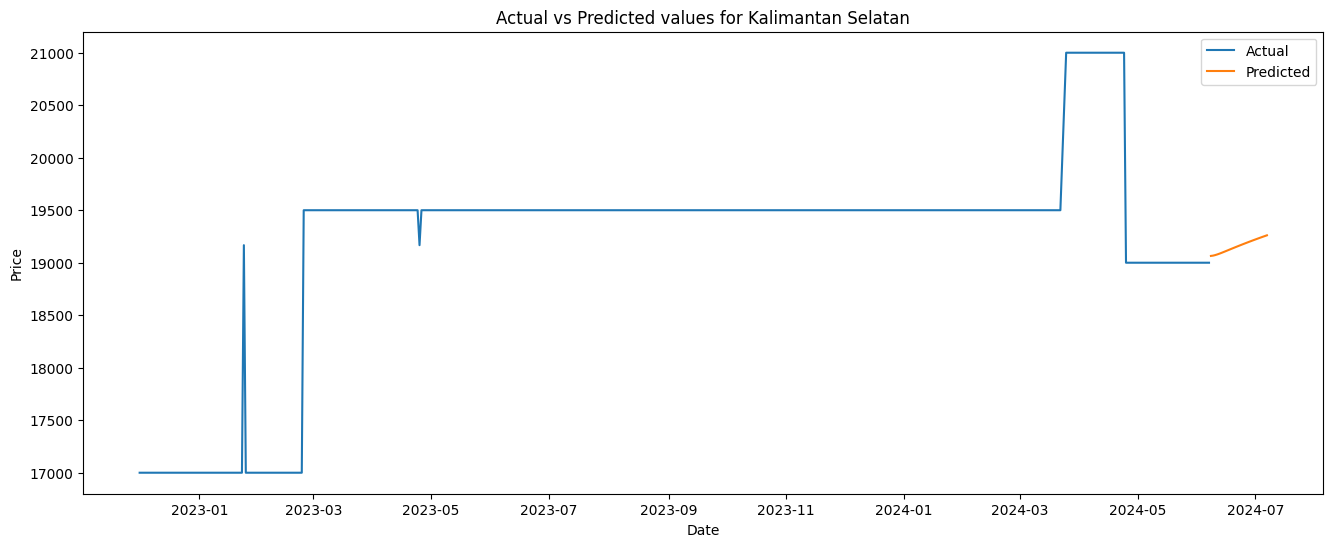

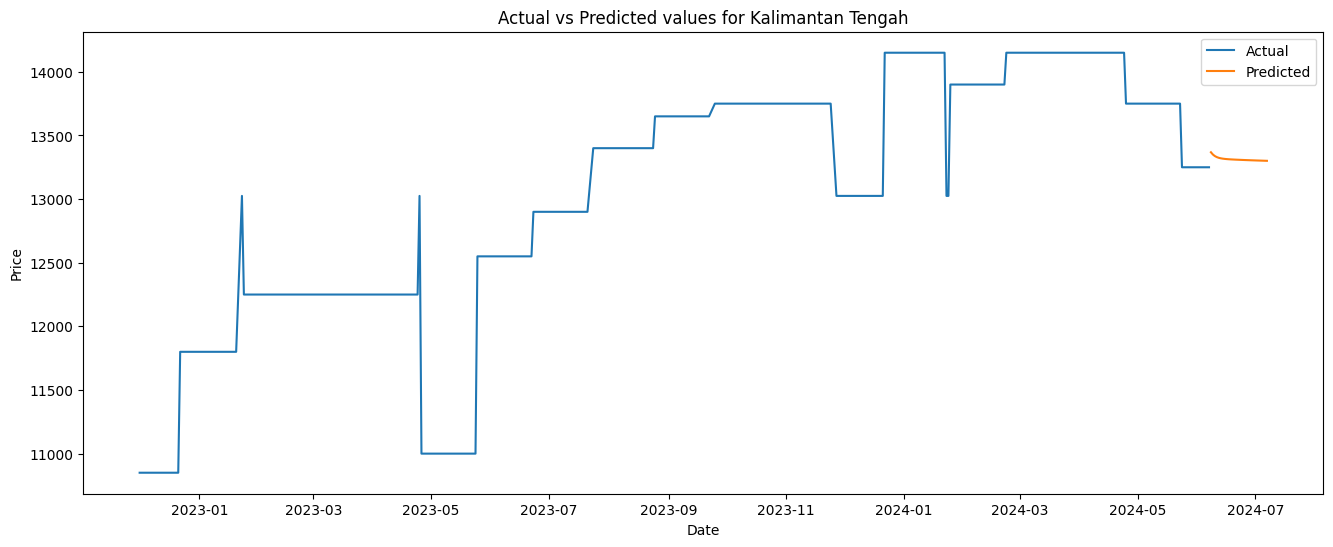

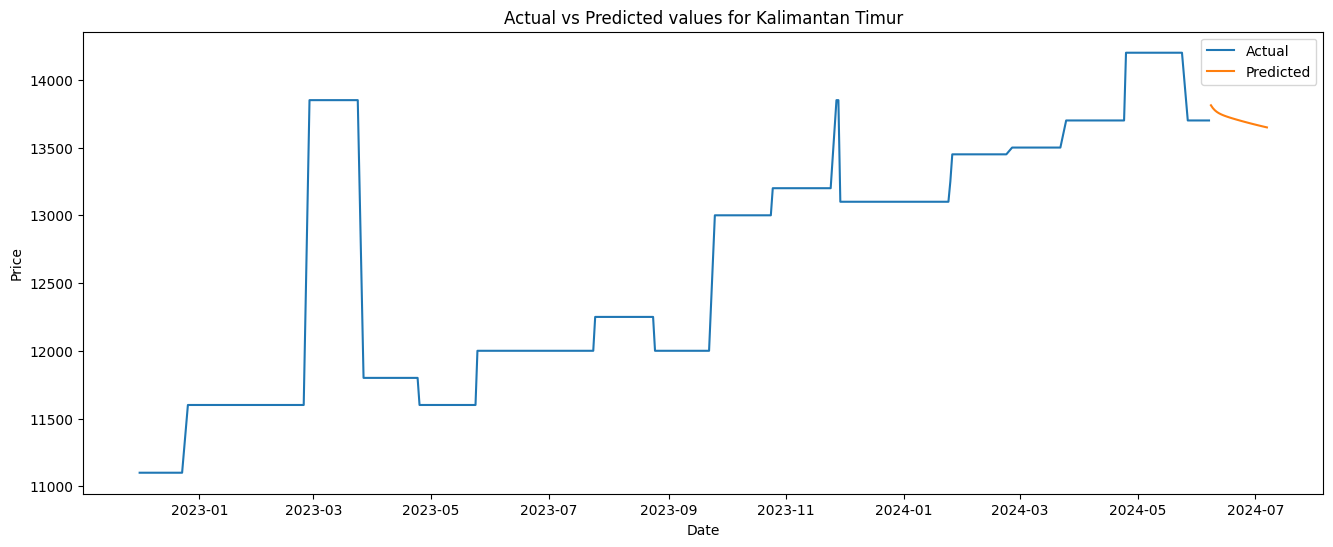

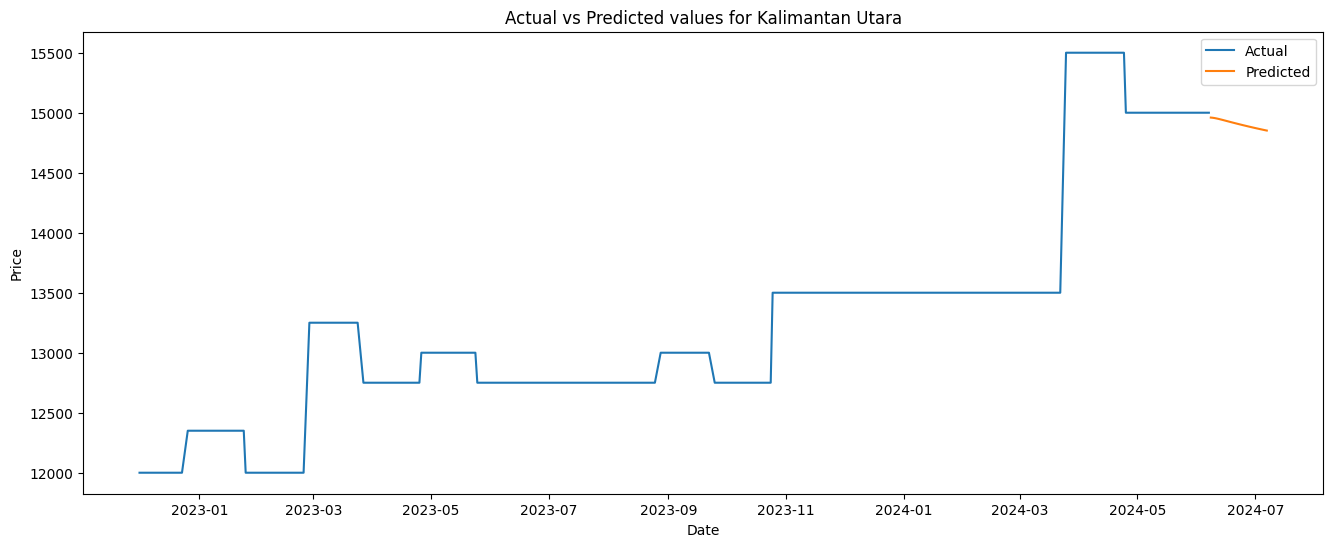

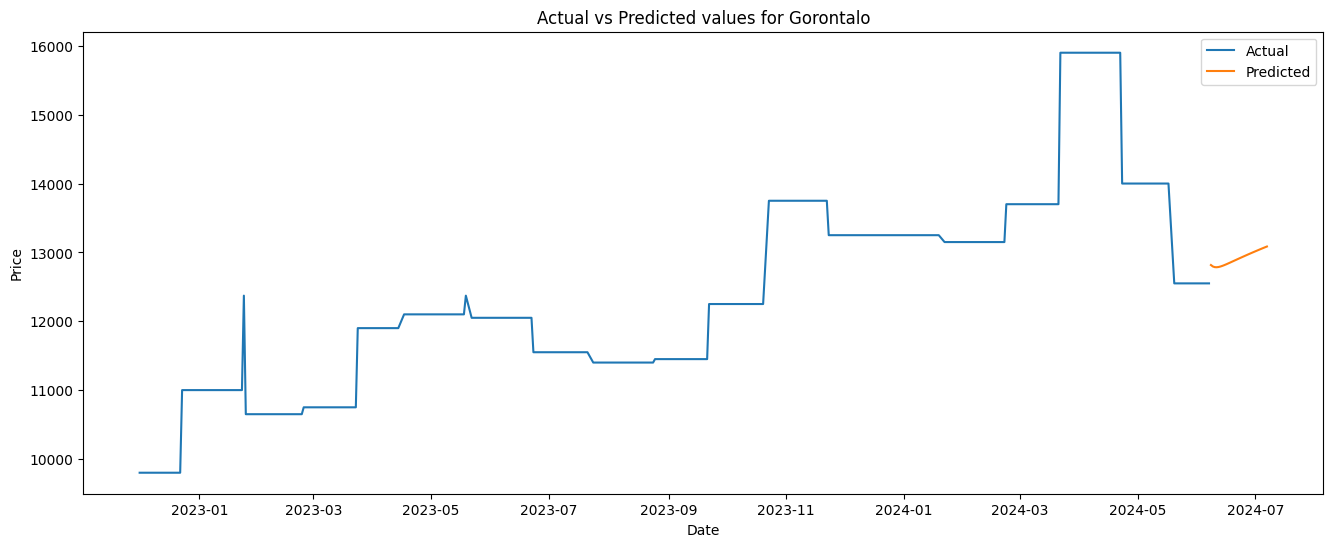

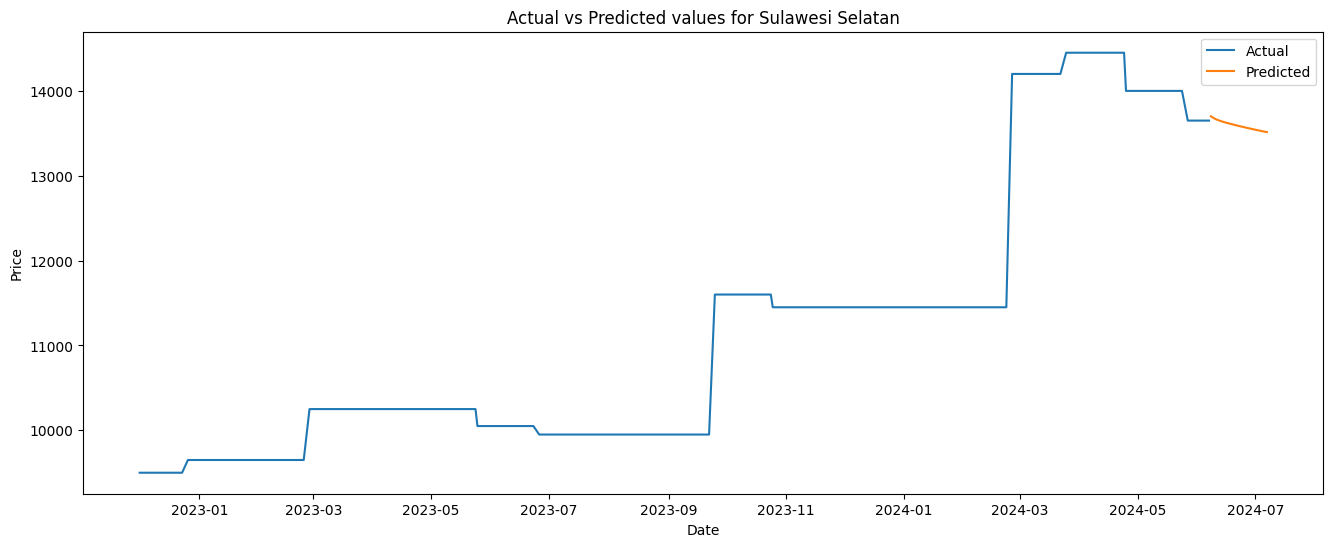

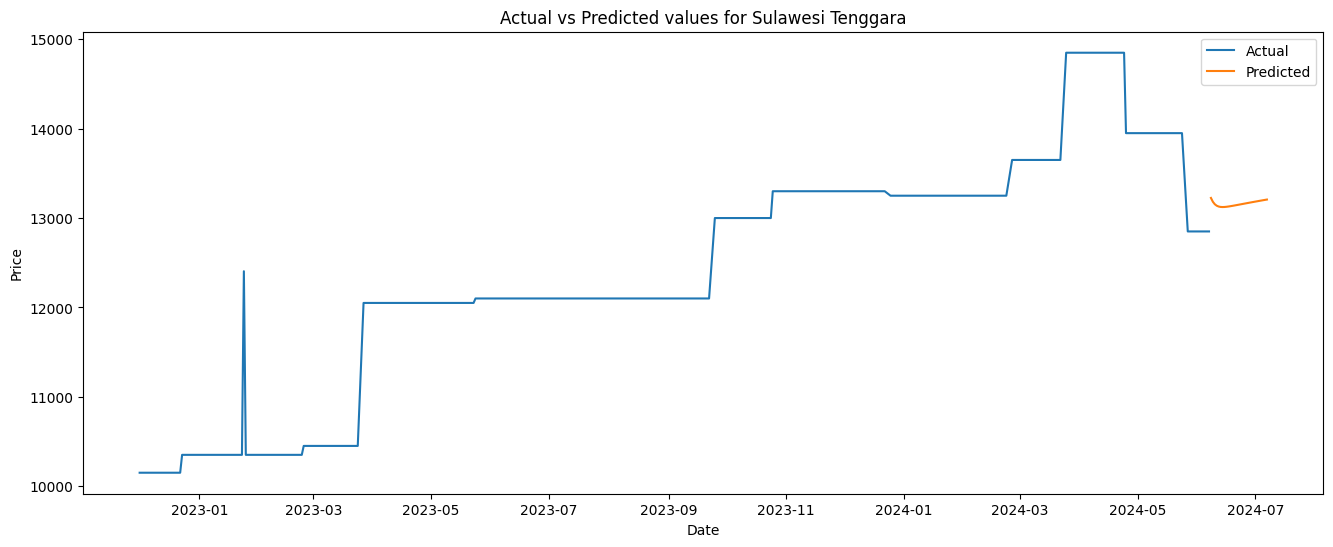

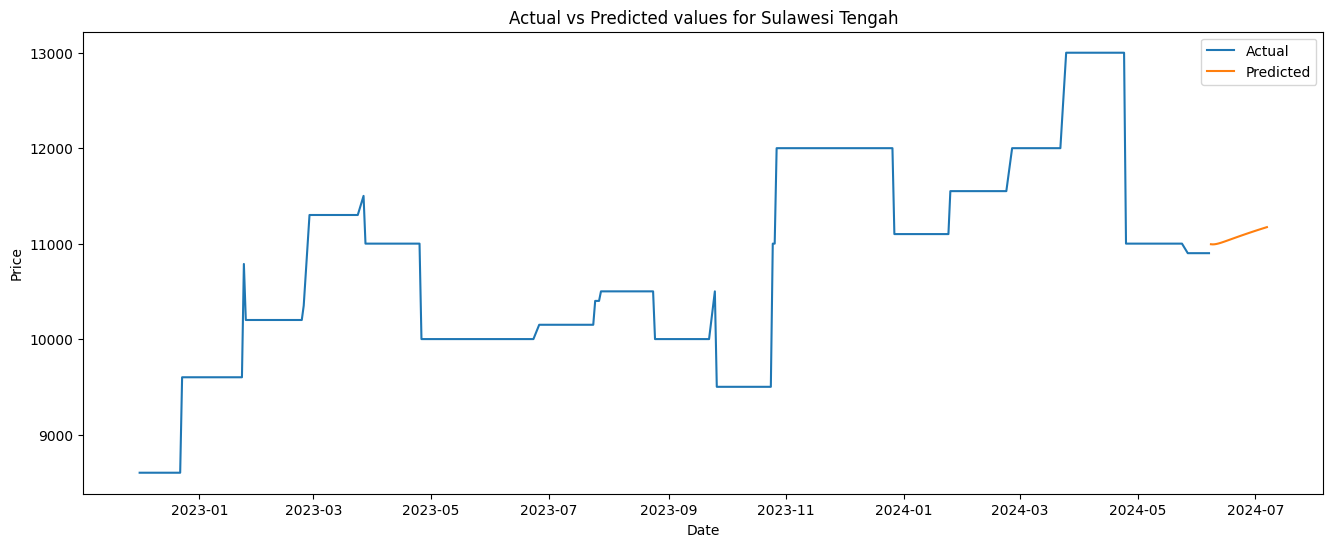

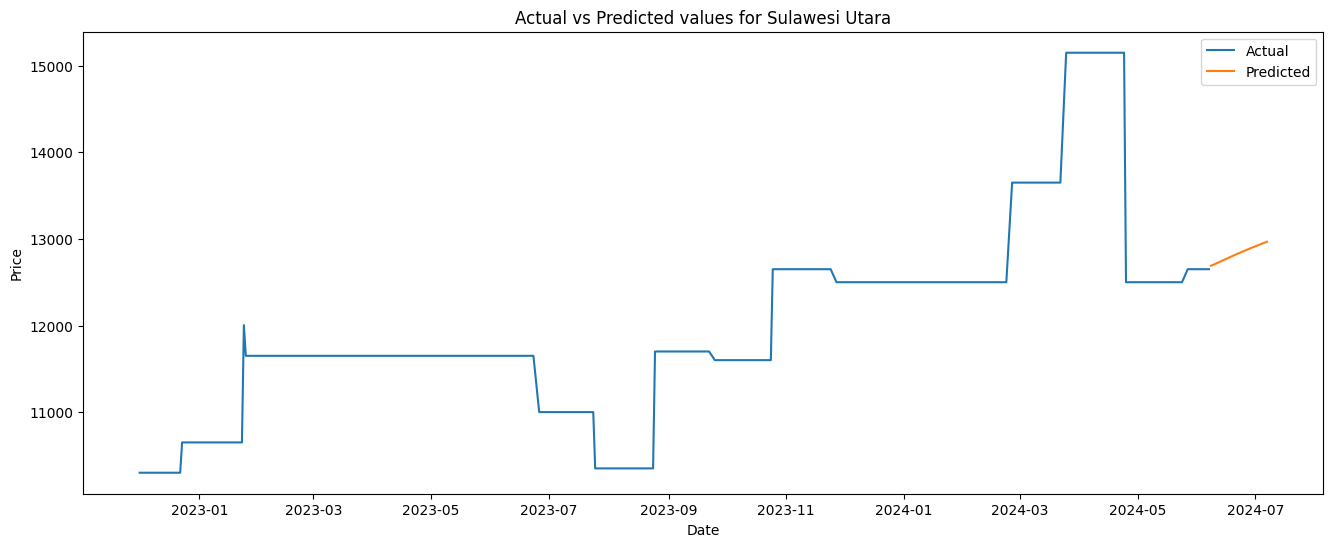

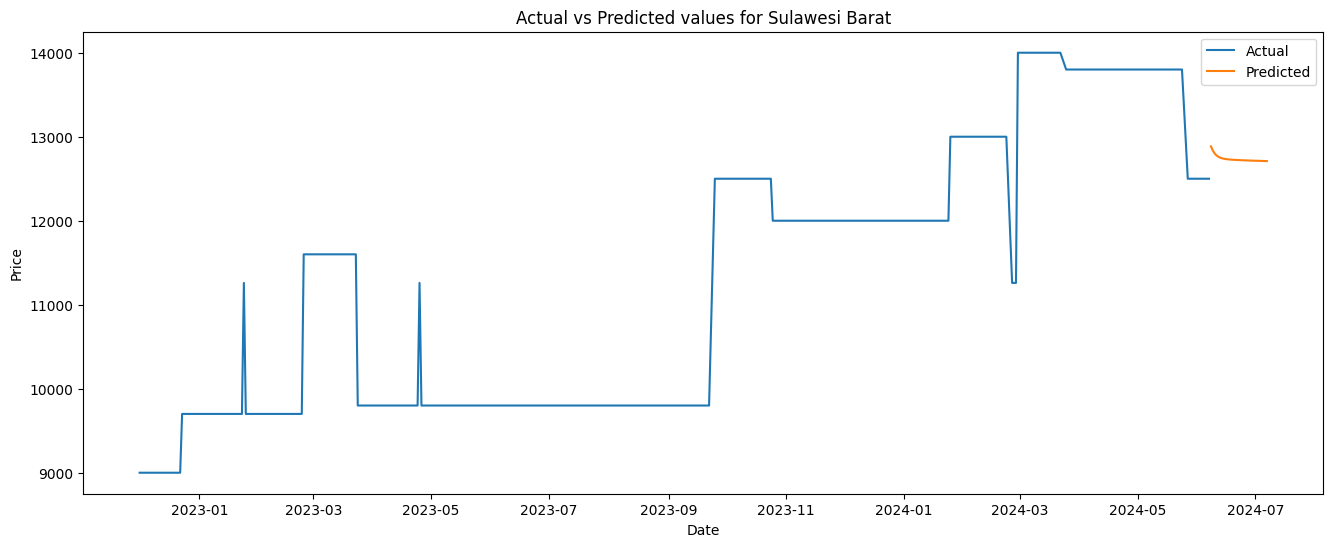

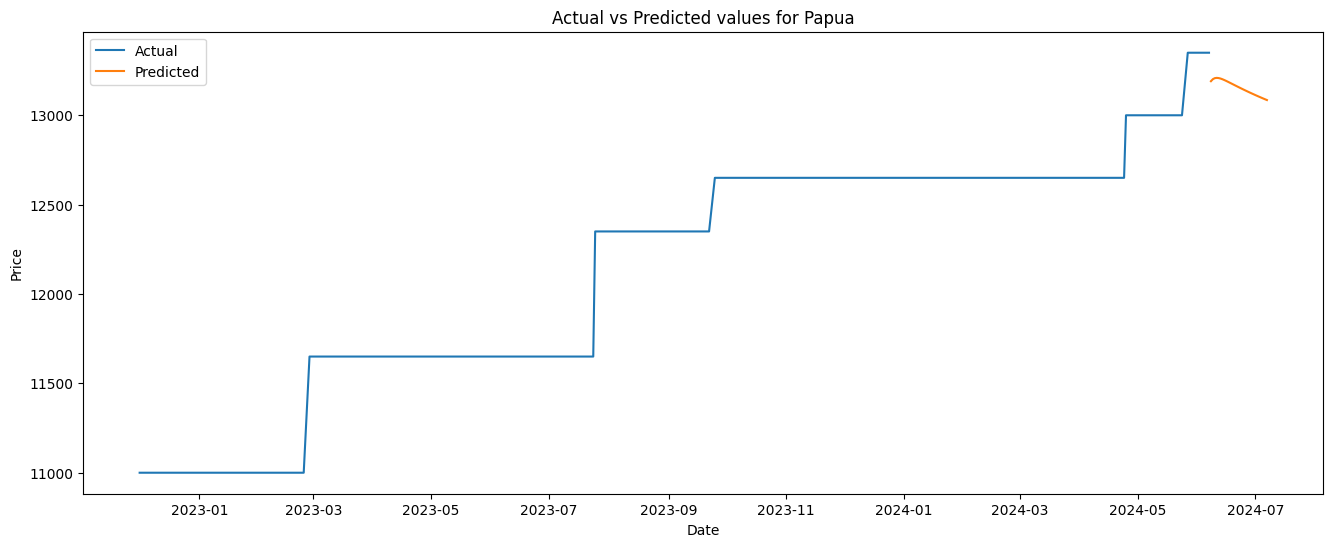

In [ ]:
# Plotting
for column in df.columns:
    plt.figure(figsize=(16, 6))
    plt.plot(df.index, df[column], label='Actual')
    plt.plot(future_predictions.index, future_predictions[column], label='Predicted')
    plt.title(f'Actual vs Predicted values for {column}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
